<a href="https://colab.research.google.com/github/DipChow/neilsen-time-series-sales-forecasting/blob/main/neilsen_time_series_sales_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**First things first** - please go to 'File' and select 'Save a copy in Drive' so that you have your own version of this activity set up and ready to use.
Remember to update the portfolio index link to your own work once completed!

## **Introduction**

Using time series analysis for sales and demand forecasting is crucial for data analysis in business because it can enhance decision-making by providing reliable sales and demand forecasts. This helps organisations reduce costs, maximise profits, and optimise resource allocation.


During this project, I will analyse the business scenario and explore the data set. I will then clean historical sales data, perform time series analysis using ARIMA, deep learning, or hybrid methods, and validate the models to ensure their accuracy in predicting future sales and demand patterns.

<br>

## **Business context**



The Nielsen BookScan service is the world’s largest continuous book sales tracking service in the world, operating in the UK, Ireland, Australia, New Zealand, India, South Africa, Italy, Spain, Mexico, Brazil, Poland, and Colombia. Nielsen BookScan collects transactional data at the point of sale, directly from tills and dispatch systems of all major book retailers. This ensures detailed and highly accurate sales information on which books are selling and at what price, giving clients the most up-to-date and relevant data. The Nielsen BookScan Total Consumer Market (TCM) data covers approximately 90% of all retail print book purchases in the UK. The remaining sites are specialised, such as gift shops, specialist booksellers, and tourist information centres.


Nielsen BookScan can be used to:
Monitor titles and authors against the competition and overall market.
Analyse pricing and discounting by format or category.
Gauge the success of marketing campaigns and promotions.
See which categories are growing and declining.
Learn what works in your market and how that might differ from other countries.

Nielsen BookScan sales data can be analysed by various criteria, including category, publisher, and format,
allowing users to see which genres are selling in which format. Users can track market trends to see which titles are driving the results, and patterns can easily be interpreted. In addition, the actual selling price is included. This inclusion makes it easier to identify trends for the level of discounting (e.g. by title, author, genre, format, region, and publisher) when analysing book sales.

Nielsen is seeking to invest in developing a new service aimed at small to medium-sized independent publishers. This service is aimed at supporting publishers in using historical sales data to make data-driven decisions about their future investment in new publications. Their publisher customers are interested in being able to make more accurate predictions of the overall sales profile post-publication for better stock control and initial investment, but they are also interested in understanding the useful economic life span that a title may have.

Nielsen is targeting small to medium-sized independent publishers as their research has shown that there is a strong demand for this insight, but businesses cannot invest in this infrastructure and would pay a premium to have access to quality-assured data and analysis in this area. Producing a new publication requires a significant upfront investment, and they would like to be able to more accurately identify books with strong long-term potential. More specifically, they are looking for titles with sales patterns that exhibit well-established seasonal patterns and positive trends that show potential great returns and to learn more about these types of publications. Nielsen will then apply this understanding to their commission and print volume strategy to be more successful in acquiring titles that have longevity. Additionally, this will enable them to deliver better returns by ensuring the correct stock levels in relation to demand and avoiding over- or understocking, which can be costly.

For this project, Nielsen has provided two data sets. The objective is to identify sales patterns that demonstrate seasonal trends or any other traits, providing insights to inform reordering, restocking, and reprinting decisions for various books (by their International Standard Book Number, or ISBN).


<br>

## **Method**

The step-by-step method in this notebook can roughly be broken down as follows:
- Import both datasets, resample weekly sales data to ensure missing weeks are filled with zeros, and convert ISBNs to strings and dates to datetime objects.
- Filter out ISBNs with sales data beyond 2024-07-01, display these ISBNs, and plot their sales patterns for further analysis.
- Investigate the general sales patterns across different time periods (1-12 years vs. 12-24 years) and analyse possible reasons for any noticeable changes.
- Focus on two specific books, The Alchemist and The Very Hungry Caterpillar, for deeper analysis. Filter their data from 2012 onwards for further forecasting.
- Perform time series decomposition, ACF/PACF analysis, and stationarity checks for both books. Use Auto ARIMA to identify the best model and forecast the final 32 weeks of data.
- Prepare the data for machine learning models, create an XGBoost pipeline, tune parameters using grid search, and forecast the final 32 weeks for both books.
- Build and tune an LSTM model using KerasTuner, forecast the final 32 weeks of data, and evaluate the performance using MAE and MAPE.
- Apply both sequential and parallel hybrid models combining SARIMA and LSTM, tune the models, and evaluate their performance using various metrics.
- Aggregate weekly data to monthly data, train XGBoost and SARIMA models to forecast eight months, and compare results with weekly predictions.

The parent folder of this notebook also contains a report summarising the results of these findings along with recommendations.

# Version Control & Installations

In [ ]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.3.1

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 102.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.1 which is incompatible.


In [ ]:
# check version is correct (to be compatible with gridsearch)
import sklearn
sklearn.__version__
# needs to show 1.3.1

'1.3.1'

In [ ]:
!pip install pmdarima
!pip install keras-tuner tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 7.5 MB/s eta 0:00:00


# Import Packages and Data

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt
from sklearn.preprocessing import StandardScaler
from pmdarima import auto_arima
from sklearn.preprocessing import MinMaxScaler


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# List files in the datasets folder
datasets_path = '/content/drive/MyDrive/datasets'
files = os.listdir(datasets_path)
print(files)


['Trustpilot_12_months.xlsx', 'Google_12_months.xlsx', 'ISBN List.xlsx', 'UK Weekly Trended Timeline from 200101_202429.xlsx']


In [ ]:
# File paths
datasets_path = '/content/drive/MyDrive/datasets'
file1 = f"{datasets_path}/ISBN List.xlsx"
file2 = f"{datasets_path}/UK Weekly Trended Timeline from 200101_202429.xlsx"

In [ ]:
# Function to read all sheets from an Excel file and concatenate them while keeping the first row as headers
def load_and_concatenate_excel(file_path):
    # Load all sheets into a dictionary of DataFrames
    sheets = pd.read_excel(file_path, sheet_name=None)

    # Initialize an empty list to store the data frames
    data_frames = []

    # Iterate over each sheet
    for sheet_name, sheet in sheets.items():
        # For all sheets except the first, drop the first row (which contains repeated column headers)
        if sheet_name != list(sheets.keys())[0]:
            sheet = sheet.iloc[1:].reset_index(drop=True)  # Drop the first row and reset the index

        # Append the processed sheet to the list of data frames
        data_frames.append(sheet)

    # Concatenate all sheets together
    concatenated_df = pd.concat(data_frames, ignore_index=True)

    # Set the column headers from the first sheet
    concatenated_df.columns = sheets[list(sheets.keys())[0]].columns

    return concatenated_df

# Load and concatenate the data from both files
isbn_list2 = load_and_concatenate_excel(file1)
weekly_sales2 = load_and_concatenate_excel(file2)

In [ ]:
isbn_list = isbn_list2
weekly_sales = weekly_sales2

In [ ]:
weekly_sales

ISBN                        Title         Author  Interval  \
0       9780002261821              One For My Baby  Parsons, Tony    200513   
1       9780002261821              One For My Baby  Parsons, Tony    200503   
2       9780002261821              One For My Baby  Parsons, Tony    200422   
3       9780002261821              One For My Baby  Parsons, Tony    200415   
4       9780002261821              One For My Baby  Parsons, Tony    200404   
...               ...                          ...            ...       ...   
227216  9781903840122  Wicked Book of Txt Tlk, The            NaN    200112   
227217  9781903840122  Wicked Book of Txt Tlk, The            NaN    200111   
227218  9781903840122  Wicked Book of Txt Tlk, The            NaN    200110   
227219  9781903840122  Wicked Book of Txt Tlk, The            NaN    200109   
227220  9781903840122  Wicked Book of Txt Tlk, The            NaN    200108   

         End Date  Volume    Value      ASP    RRP    Binding  \
0      2005-04-02       1    15.99  15.9900  15.99   Hardback   
1      2005-01-22       1    15.99  15.9900  15.99   Hardback   
2      2004-05-29       1    11.19  11.1900  15.99   Hardback   
3      2004-04-10       2    27.18  13.5900  15.99   Hardback   
4      2004-01-24       2    22.48  11.2400  15.99   Hardback   
...           ...     ...      ...      ...    ...        ...   
227216 2001-03-24     693  1377.31   1.9875   1.99  Paperback   
227217 2001-03-17     638  1269.23   1.9894   1.99  Paperback   
227218 2001-03-10     850  1691.50   1.9900   1.99  Paperback   
227219 2001-03-03     517  1027.25   1.9869   1.99  Paperback   
227220 2001-02-24      69   137.31   1.9900   1.99  Paperback   

                         Imprint     Publisher Group  \
0       HarperCollins Publishers   HarperCollins Grp   
1       HarperCollins Publishers   HarperCollins Grp   
2       HarperCollins Publishers   HarperCollins Grp   
3       HarperCollins Publishers   HarperCollins Grp   
4       HarperCollins Publishers   HarperCollins Grp   
...                          ...                 ...   
227216              Buster Books  Michael O'Mara Grp   
227217              Buster Books  Michael O'Mara Grp   
227218              Buster Books  Michael O'Mara Grp   
227219              Buster Books  Michael O'Mara Grp   
227220              Buster Books  Michael O'Mara Grp   

                                     Product Class  
0                  F1.1 General & Literary Fiction  
1                  F1.1 General & Literary Fiction  
2                  F1.1 General & Literary Fiction  
3                  F1.1 General & Literary Fiction  
4                  F1.1 General & Literary Fiction  
...                                            ...  
227216  Y4.1 Children's General Interest & Leisure  
227217  Y4.1 Children's General Interest & Leisure  
227218  Y4.1 Children's General Interest & Leisure  
227219  Y4.1 Children's General Interest & Leisure  
227220  Y4.1 Children's General Interest & Leisure  

[227221 rows x 13 columns]

In [ ]:
isbn_list

ISBN                                              Title  \
0    9780330375252                Bridget Jones's Diary (Film Tie-in)   
1    9780140276336                                        White Teeth   
2    9780006512134                                        Man and Boy   
3    9780099280255                                       Brethren,The   
4    9780552998727  Marrying The Mistress:an irresistible and grip...   
..             ...                                                ...   
492  9781854306838                Laura's Christmas Star:Laura's Star   
493  9780723245995                                       Where's Spot   
494  9781902836553                             Action Man Annual:2002   
495  9781841462400  KS3 Science Revision Guide – Foundation (inclu...   
496  9780754702153                 Pokemon Collector's File:Funfax S.   

               Author                                    Imprint  \
0     Fielding, Helen                                    Picador   
1        Smith, Zadie                          Penguin Books Ltd   
2       Parsons, Tony                   HarperCollins Publishers   
3       Grisham, John                                Arrow Books   
4    Trollope, Joanna                                 Black Swan   
..                ...                                        ...   
492   Baumgart, Klaus                         Little Tiger Press   
493        Hill, Eric                     F Warne Publishers Ltd   
494               NaN                             Pedigree Books   
495         CGP Books  Coordination Group Publications Ltd (CGP)   
496               NaN          Dorling Kindersley Publishers Ltd   

                     Publisher Group    RRP    Binding Publication Date  \
0                  Pan Macmillan Grp   8.99  Paperback       2001-03-23   
1                        Penguin Grp   9.99  Paperback       2001-01-25   
2                  HarperCollins Grp   8.99  Paperback       2000-03-06   
3                   Random House Grp   6.99  Paperback       2000-12-27   
4                     Transworld Grp  10.99  Paperback       2001-02-01   
..                               ...    ...        ...              ...   
492         Little Tiger Press Group   5.99  Paperback       2001-09-28   
493                      Penguin Grp   4.99   Hardback       2000-03-13   
494                     Pedigree Grp   6.99   Hardback       2001-09-08   
495  Coordination Group Publications   6.50   Hardback       2023-05-23   
496           Dorling Kindersley Grp   5.99   Hardback       2000-04-09   

                                         Product Class Country of Publication  
0                      F1.1 General & Literary Fiction         United Kingdom  
1                      F1.1 General & Literary Fiction         United Kingdom  
2                      F1.1 General & Literary Fiction         United Kingdom  
3                     F2.1 Crime, Thriller & Adventure         United Kingdom  
4                      F1.1 General & Literary Fiction         United Kingdom  
..                                                 ...                    ...  
492                                 Y1.3 Picture Books         United Kingdom  
493                   Y1.1 Pre-school & Early Learning         United Kingdom  
494         Y4.1 Children's General Interest & Leisure         United Kingdom  
495  Y5.3 School Textbooks & Study Guides: Maths, S...         United Kingdom  
496                      Y1.2 Novelty & Activity Books         United Kingdom  

[497 rows x 10 columns]

# Initial Data Investigation

In [ ]:
# Remove rows with NaN values in both tables
isbn_list = isbn_list.dropna()
weekly_sales = weekly_sales.dropna()

In [ ]:
isbn_list

ISBN                                              Title  \
0    9780330375252                Bridget Jones's Diary (Film Tie-in)   
1    9780140276336                                        White Teeth   
2    9780006512134                                        Man and Boy   
3    9780099280255                                       Brethren,The   
4    9780552998727  Marrying The Mistress:an irresistible and grip...   
..             ...                                                ...   
490  9780440863670                                      Buried Alive!   
491  9780440863021                                     Mum-minder,The   
492  9781854306838                Laura's Christmas Star:Laura's Star   
493  9780723245995                                       Where's Spot   
495  9781841462400  KS3 Science Revision Guide – Foundation (inclu...   

                 Author                                    Imprint  \
0       Fielding, Helen                                    Picador   
1          Smith, Zadie                          Penguin Books Ltd   
2         Parsons, Tony                   HarperCollins Publishers   
3         Grisham, John                                Arrow Books   
4      Trollope, Joanna                                 Black Swan   
..                  ...                                        ...   
490  Wilson, Jacqueline                                   Yearling   
491  Wilson, Jacqueline                                   Yearling   
492     Baumgart, Klaus                         Little Tiger Press   
493          Hill, Eric                     F Warne Publishers Ltd   
495           CGP Books  Coordination Group Publications Ltd (CGP)   

                      Publisher Group    RRP    Binding Publication Date  \
0                   Pan Macmillan Grp   8.99  Paperback       2001-03-23   
1                         Penguin Grp   9.99  Paperback       2001-01-25   
2                   HarperCollins Grp   8.99  Paperback       2000-03-06   
3                    Random House Grp   6.99  Paperback       2000-12-27   
4                      Transworld Grp  10.99  Paperback       2001-02-01   
..                                ...    ...        ...              ...   
490  Random House Childrens Books Grp   5.99  Paperback       1999-05-01   
491  Random House Childrens Books Grp   4.99  Paperback       1994-05-01   
492          Little Tiger Press Group   5.99  Paperback       2001-09-28   
493                       Penguin Grp   4.99   Hardback       2000-03-13   
495   Coordination Group Publications   6.50   Hardback       2023-05-23   

                                         Product Class Country of Publication  
0                      F1.1 General & Literary Fiction         United Kingdom  
1                      F1.1 General & Literary Fiction         United Kingdom  
2                      F1.1 General & Literary Fiction         United Kingdom  
3                     F2.1 Crime, Thriller & Adventure         United Kingdom  
4                      F1.1 General & Literary Fiction         United Kingdom  
..                                                 ...                    ...  
490                            Y2.1 Children's Fiction         United Kingdom  
491                            Y2.1 Children's Fiction         United Kingdom  
492                                 Y1.3 Picture Books         United Kingdom  
493                   Y1.1 Pre-school & Early Learning         United Kingdom  
495  Y5.3 School Textbooks & Study Guides: Maths, S...         United Kingdom  

[398 rows x 10 columns]

In [ ]:
weekly_sales

ISBN                              Title            Author  \
0       9780002261821                    One For My Baby     Parsons, Tony   
1       9780002261821                    One For My Baby     Parsons, Tony   
2       9780002261821                    One For My Baby     Parsons, Tony   
3       9780002261821                    One For My Baby     Parsons, Tony   
4       9780002261821                    One For My Baby     Parsons, Tony   
...               ...                                ...               ...   
226494  9781858818474  Handful of Horrid Henry 3-in-1, A  Simon, Francesca   
226495  9781858818474  Handful of Horrid Henry 3-in-1, A  Simon, Francesca   
226496  9781858818474  Handful of Horrid Henry 3-in-1, A  Simon, Francesca   
226497  9781858818474  Handful of Horrid Henry 3-in-1, A  Simon, Francesca   
226498  9781858818474  Handful of Horrid Henry 3-in-1, A  Simon, Francesca   

        Interval   End Date  Volume    Value      ASP    RRP    Binding  \
0         200513 2005-04-02       1    15.99  15.9900  15.99   Hardback   
1         200503 2005-01-22       1    15.99  15.9900  15.99   Hardback   
2         200422 2004-05-29       1    11.19  11.1900  15.99   Hardback   
3         200415 2004-04-10       2    27.18  13.5900  15.99   Hardback   
4         200404 2004-01-24       2    22.48  11.2400  15.99   Hardback   
...          ...        ...     ...      ...      ...    ...        ...   
226494    200105 2001-02-03     340  2013.22   5.9212   9.99  Paperback   
226495    200104 2001-01-27     243  1425.16   5.8649   9.99  Paperback   
226496    200103 2001-01-20     256  1461.54   5.7091   9.99  Paperback   
226497    200102 2001-01-13     199  1094.78   5.5014   9.99  Paperback   
226498    200101 2001-01-06     449  2445.62   5.4468   9.99  Paperback   

                                                  Imprint  \
0                                HarperCollins Publishers   
1                                HarperCollins Publishers   
2                                HarperCollins Publishers   
3                                HarperCollins Publishers   
4                                HarperCollins Publishers   
...                                                   ...   
226494  Dolphin (an Imprint of The Orion Publishing Gr...   
226495  Dolphin (an Imprint of The Orion Publishing Gr...   
226496  Dolphin (an Imprint of The Orion Publishing Gr...   
226497  Dolphin (an Imprint of The Orion Publishing Gr...   
226498  Dolphin (an Imprint of The Orion Publishing Gr...   

                Publisher Group                    Product Class  
0             HarperCollins Grp  F1.1 General & Literary Fiction  
1             HarperCollins Grp  F1.1 General & Literary Fiction  
2             HarperCollins Grp  F1.1 General & Literary Fiction  
3             HarperCollins Grp  F1.1 General & Literary Fiction  
4             HarperCollins Grp  F1.1 General & Literary Fiction  
...                         ...                              ...  
226494  Hachette Children's Grp          Y2.1 Children's Fiction  
226495  Hachette Children's Grp          Y2.1 Children's Fiction  
226496  Hachette Children's Grp          Y2.1 Children's Fiction  
226497  Hachette Children's Grp          Y2.1 Children's Fiction  
226498  Hachette Children's Grp          Y2.1 Children's Fiction  

[206554 rows x 13 columns]

In [ ]:
# Convert ISBN columns to string type
weekly_sales['ISBN'] = weekly_sales['ISBN'].astype(str)
isbn_list['ISBN'] = isbn_list['ISBN'].astype(str)

<ipython-input-17-07e19e74e20a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_sales['ISBN'] = weekly_sales['ISBN'].astype(str)
<ipython-input-17-07e19e74e20a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isbn_list['ISBN'] = isbn_list['ISBN'].astype(str)


In [ ]:
print("weekly_sales")
weekly_sales.info()
print("\n")
print("isbn_list")
isbn_list.info()

weekly_sales
<class 'pandas.core.frame.DataFrame'>
Index: 206554 entries, 0 to 226498
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ISBN             206554 non-null  object        
 1   Title            206554 non-null  object        
 2   Author           206554 non-null  object        
 3   Interval         206554 non-null  int64         
 4   End Date         206554 non-null  datetime64[ns]
 5   Volume           206554 non-null  int64         
 6   Value            206554 non-null  float64       
 7   ASP              206554 non-null  float64       
 8   RRP              206554 non-null  float64       
 9   Binding          206554 non-null  object        
 10  Imprint          206554 non-null  object        
 11  Publisher Group  206554 non-null  object        
 12  Product Class    206554 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage

In [ ]:
isbn_list['Publication Date'] = pd.to_datetime(isbn_list['Publication Date'], errors='coerce')
weekly_sales['End Date'] = pd.to_datetime(weekly_sales['End Date'], errors='coerce')

<ipython-input-19-176efc31c17e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isbn_list['Publication Date'] = pd.to_datetime(isbn_list['Publication Date'], errors='coerce')
<ipython-input-19-176efc31c17e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_sales['End Date'] = pd.to_datetime(weekly_sales['End Date'], errors='coerce')


In [ ]:
weekly_sales3 = weekly_sales
isbn_list3 = isbn_list

In [ ]:
# merge weekly_sales3 and isbn_list3 into df

df = pd.merge(weekly_sales3, isbn_list3[['ISBN', 'Publication Date', 'Country of Publication']], left_on='ISBN', right_on='ISBN', how='left')
df.head()

ISBN            Title         Author  Interval   End Date  Volume  \
0  9780002261821  One For My Baby  Parsons, Tony    200513 2005-04-02       1   
1  9780002261821  One For My Baby  Parsons, Tony    200503 2005-01-22       1   
2  9780002261821  One For My Baby  Parsons, Tony    200422 2004-05-29       1   
3  9780002261821  One For My Baby  Parsons, Tony    200415 2004-04-10       2   
4  9780002261821  One For My Baby  Parsons, Tony    200404 2004-01-24       2   

   Value    ASP    RRP   Binding                   Imprint    Publisher Group  \
0  15.99  15.99  15.99  Hardback  HarperCollins Publishers  HarperCollins Grp   
1  15.99  15.99  15.99  Hardback  HarperCollins Publishers  HarperCollins Grp   
2  11.19  11.19  15.99  Hardback  HarperCollins Publishers  HarperCollins Grp   
3  27.18  13.59  15.99  Hardback  HarperCollins Publishers  HarperCollins Grp   
4  22.48  11.24  15.99  Hardback  HarperCollins Publishers  HarperCollins Grp   

                     Product Class Publication Date Country of Publication  
0  F1.1 General & Literary Fiction       2001-07-02         United Kingdom  
1  F1.1 General & Literary Fiction       2001-07-02         United Kingdom  
2  F1.1 General & Literary Fiction       2001-07-02         United Kingdom  
3  F1.1 General & Literary Fiction       2001-07-02         United Kingdom  
4  F1.1 General & Literary Fiction       2001-07-02         United Kingdom

In [ ]:
# Ensure 'End Date' is in datetime format
df['End Date'] = pd.to_datetime(df['End Date'], errors='coerce')

# Set 'End Date' as index for resampling
df.set_index('End Date', inplace=True)

# Resampling and aggregation
df_resampled = df.groupby('ISBN').resample('W-SAT').agg({
    'Title': 'first',  # Keep the first Title for each ISBN each week
    'Author': 'first',  # Keep the first Author for each ISBN each week
    'Interval': 'first',  # Keep the first Interval for each ISBN each week
    'Volume': 'sum',  # Sum the Volume for each week and ISBN
    'Value': 'sum',  # Sum the Value for each week and ISBN
    'ASP': 'mean',  # Take the average ASP for each week and ISBN
    'RRP': 'first',  # Keep the first RRP for each ISBN each week
    'Binding': 'first',  # Keep the first Binding for each ISBN each week
    'Imprint': 'first',  # Keep the first Imprint for each ISBN each week
    'Publisher Group': 'first',  # Keep the first Publisher Group for each ISBN each week
    'Product Class': 'first',  # Keep the first Product Class for each ISBN each week
    'Publication Date': 'first',  # Keep the first Publication Date for each ISBN each week
    'Country of Publication': 'first'  # Keep the first Country of Publication for each ISBN each week
}).fillna({'Volume': 0, 'Value': 0, 'ASP': 0})  # Fill missing Volume, Value, and ASP with 0, but keep others unchanged

# Forward fill and backward fill to all non-numeric columns
df_resampled[['Title', 'Author', 'Interval', 'RRP', 'Binding', 'Imprint', 'Publisher Group',
              'Product Class', 'Publication Date', 'Country of Publication']] = df_resampled[[
    'Title', 'Author', 'Interval', 'RRP', 'Binding', 'Imprint', 'Publisher Group',
    'Product Class', 'Publication Date', 'Country of Publication']].apply(lambda group: group.ffill().bfill())

# Reset index to move 'End Date' and 'ISBN' back to columns
df_resampled.reset_index(inplace=True)

print(df_resampled.head())


            ISBN   End Date                Title      Author  Interval  \
0  9780001713031 2001-01-06  Cat in the Hat, The  Seuss, Dr.  200101.0   
1  9780001713031 2001-01-13  Cat in the Hat, The  Seuss, Dr.  200102.0   
2  9780001713031 2001-01-20  Cat in the Hat, The  Seuss, Dr.  200103.0   
3  9780001713031 2001-01-27  Cat in the Hat, The  Seuss, Dr.  200104.0   
4  9780001713031 2001-02-03  Cat in the Hat, The  Seuss, Dr.  200105.0   

   Volume    Value     ASP   RRP    Binding  Imprint    Publisher Group  \
0     522  2544.07  4.8737  4.99  Paperback  Collins  HarperCollins Grp   
1     379  1842.21  4.8607  4.99  Paperback  Collins  HarperCollins Grp   
2     393  1921.19  4.8885  4.99  Paperback  Collins  HarperCollins Grp   
3     369  1785.31  4.8382  4.99  Paperback  Collins  HarperCollins Grp   
4     423  2060.07  4.8701  4.99  Paperback  Collins  HarperCollins Grp   

                    Product Class Publication Date Country of Publication  
0  Y4.2 Reference & Home Lea

In [ ]:
# print all rows of df_resampled where Value = 0

# Print all rows where 'Value' is equal to 0
print(df_resampled[df_resampled['Value'] == 0])

                 ISBN   End Date                Title      Author  Interval  \
210     9780001713031 2005-01-15  Cat in the Hat, The  Seuss, Dr.  200501.0   
212     9780001713031 2005-01-29  Cat in the Hat, The  Seuss, Dr.  200503.0   
229     9780001713031 2005-05-28  Cat in the Hat, The  Seuss, Dr.  200520.0   
233     9780001713031 2005-06-25  Cat in the Hat, The  Seuss, Dr.  200524.0   
236     9780001713031 2005-07-16  Cat in the Hat, The  Seuss, Dr.  200527.0   
...               ...        ...                  ...         ...       ...   
336280  9781903511107 2011-03-26     Final Fantasy IX   Piggyback  201027.0   
336281  9781903511107 2011-04-02     Final Fantasy IX   Piggyback  201027.0   
336282  9781903511107 2011-04-09     Final Fantasy IX   Piggyback  201027.0   
336283  9781903511107 2011-04-16     Final Fantasy IX   Piggyback  201027.0   
336284  9781903511107 2011-04-23     Final Fantasy IX   Piggyback  201027.0   

        Volume  Value  ASP    RRP    Binding       

In [ ]:
df_resampled.isna().any()

ISBN                      False
End Date                  False
Title                     False
Author                    False
Interval                  False
Volume                    False
Value                     False
ASP                       False
RRP                       False
Binding                   False
Imprint                   False
Publisher Group           False
Product Class             False
Publication Date          False
Country of Publication    False
dtype: bool

In [ ]:
# filter so only ISBNs are kept where sales data exists beyond 24-07-01

# Filter for sales data beyond 24-07-01
date_threshold = pd.to_datetime('2024-07-01')
filtered_df = df_resampled[df_resampled['End Date'] > date_threshold]

# Get unique ISBNs with sales data beyond the threshold
isbns_with_sales_data = filtered_df['ISBN'].unique()

isbns_with_sales_data

array(['9780006512134', '9780006514091', '9780006514213', '9780006531203',
       '9780006550433', '9780006647553', '9780007101887', '9780091816971',
       '9780091867775', '9780099244721', '9780099285823', '9780099286387',
       '9780099286578', '9780099422587', '9780099428558', '9780099771517',
       '9780140259506', '9780140275421', '9780140276336', '9780140276619',
       '9780140281293', '9780140285215', '9780140294231', '9780140295962',
       '9780224060875', '9780241003008', '9780261103252', '9780330355667',
       '9780340696767', '9780340766057', '9780340786055', '9780349112763',
       '9780349113609', '9780349114033', '9780440864141', '9780440864554',
       '9780552145053', '9780552145060', '9780552145954', '9780552997034',
       '9780552997348', '9780552998000', '9780552998444', '9780552998482',
       '9780552998727', '9780593048153', '9780719559792', '9780722532935',
       '9780744523232', '9780747268161', '9780749395698', '9780749397548',
       '9780752844299', '

In [ ]:
len(isbns_with_sales_data)

61

Here are the ISBNs for which sales data exists beyond 2024-07-01

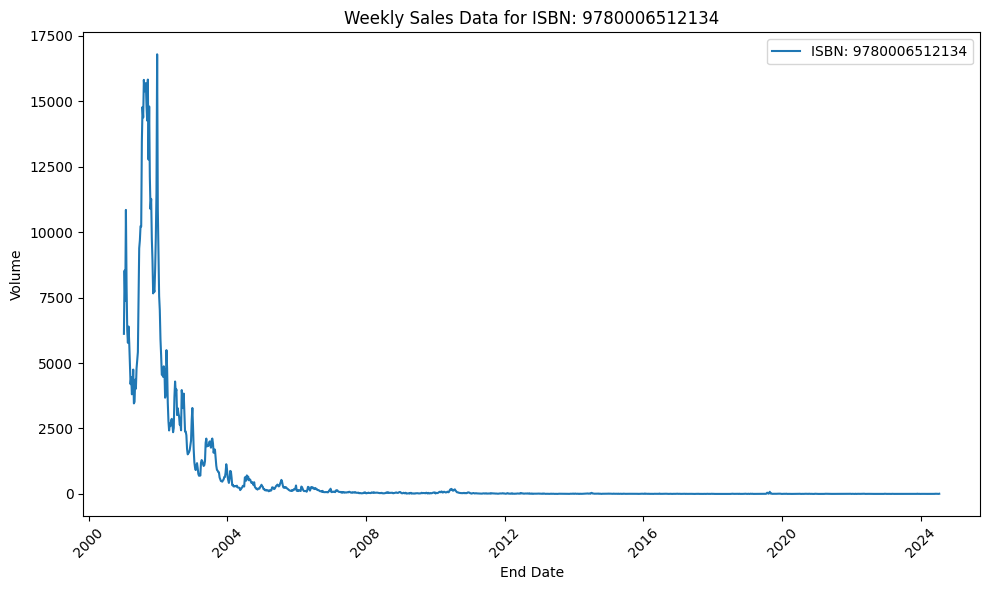

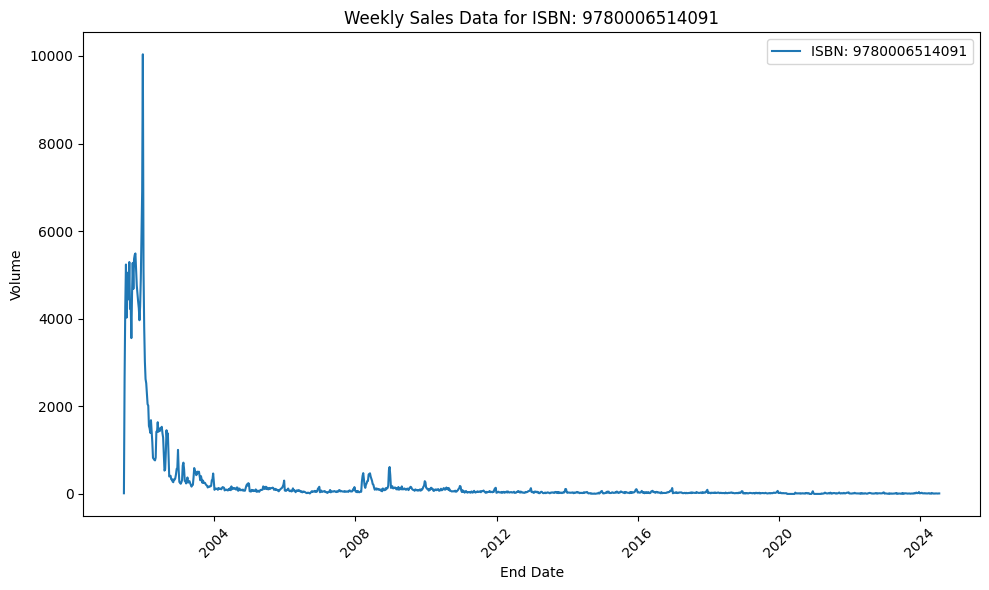

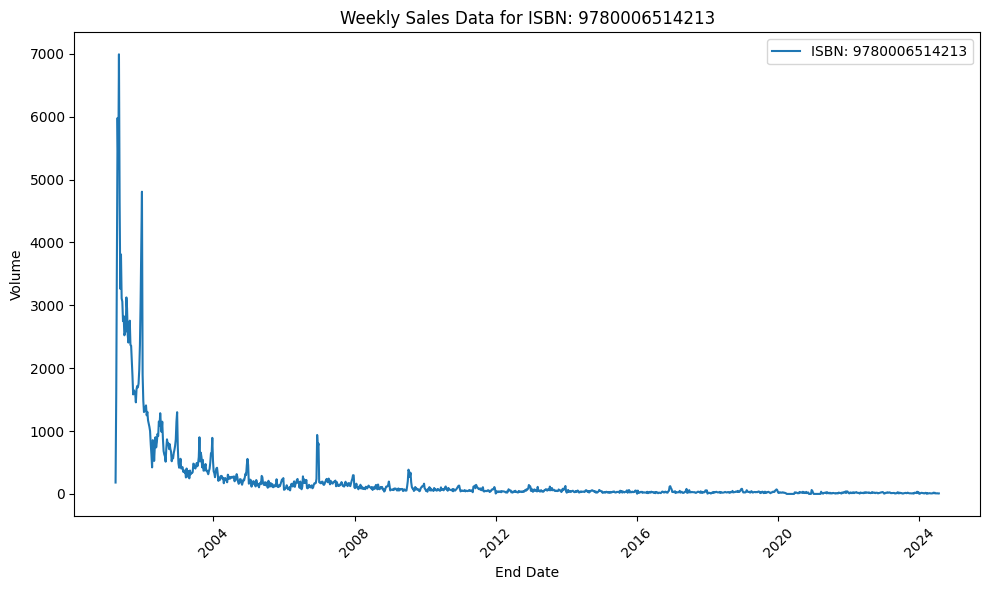

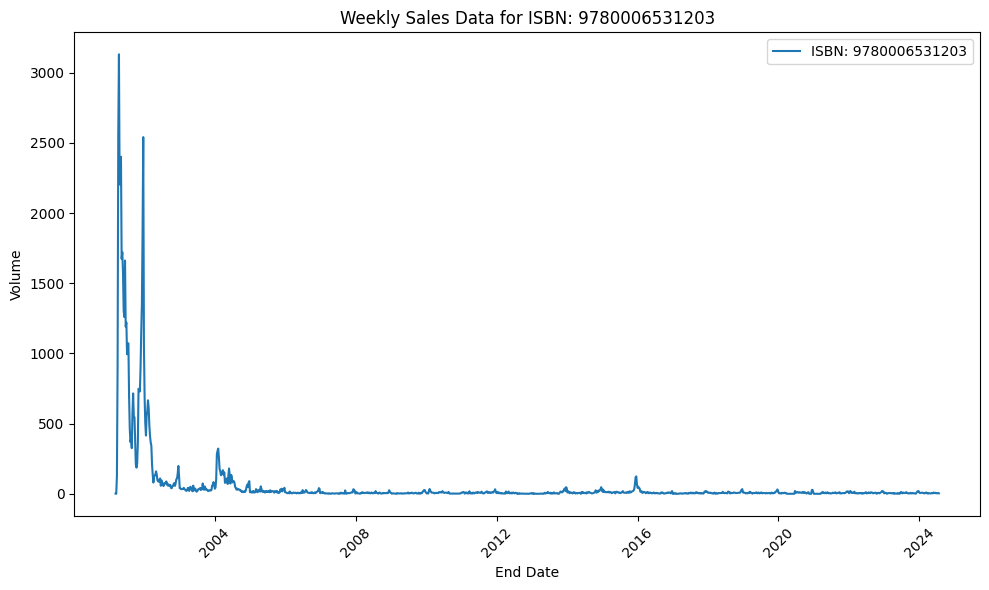

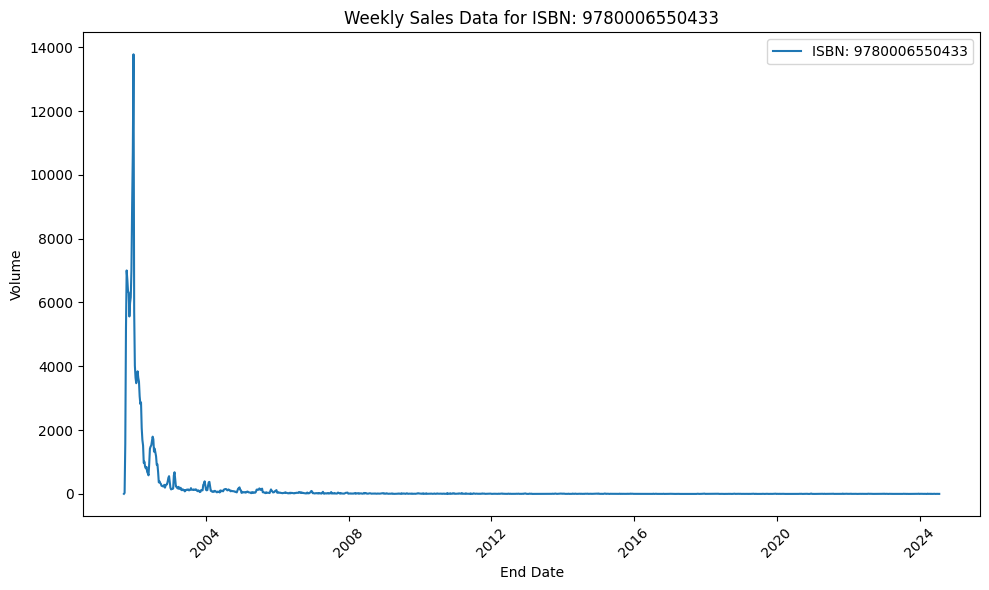

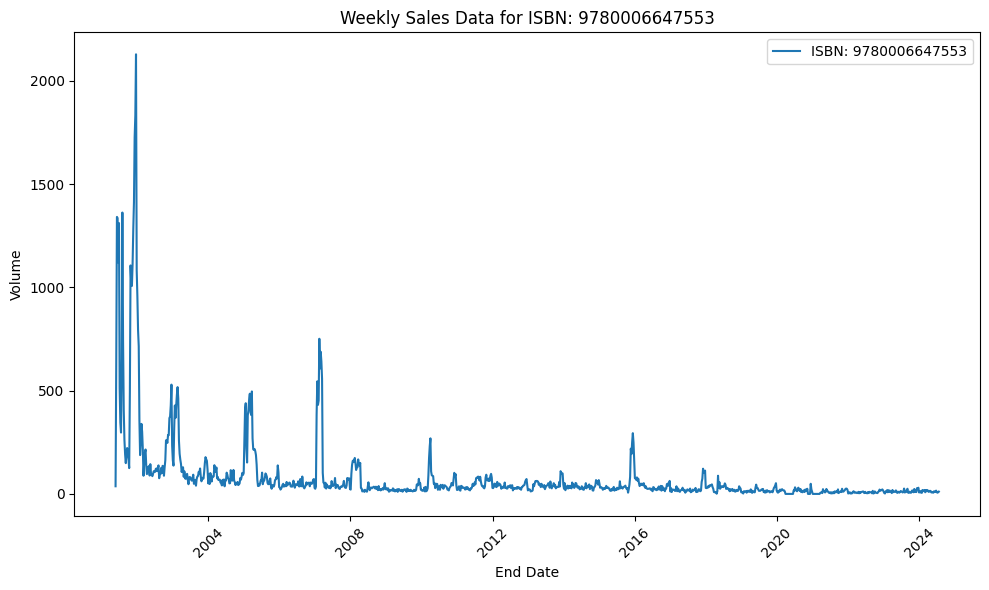

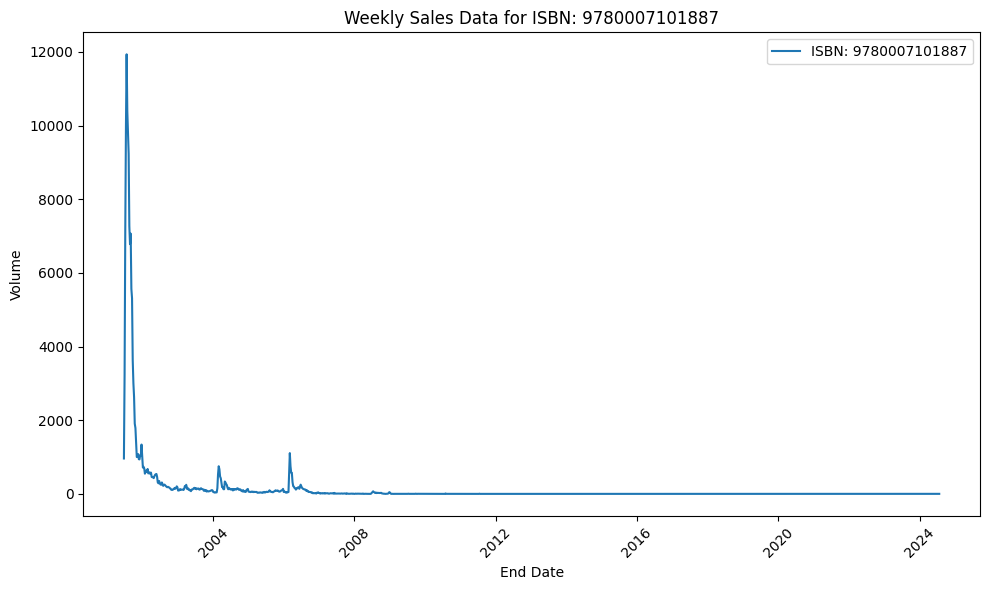

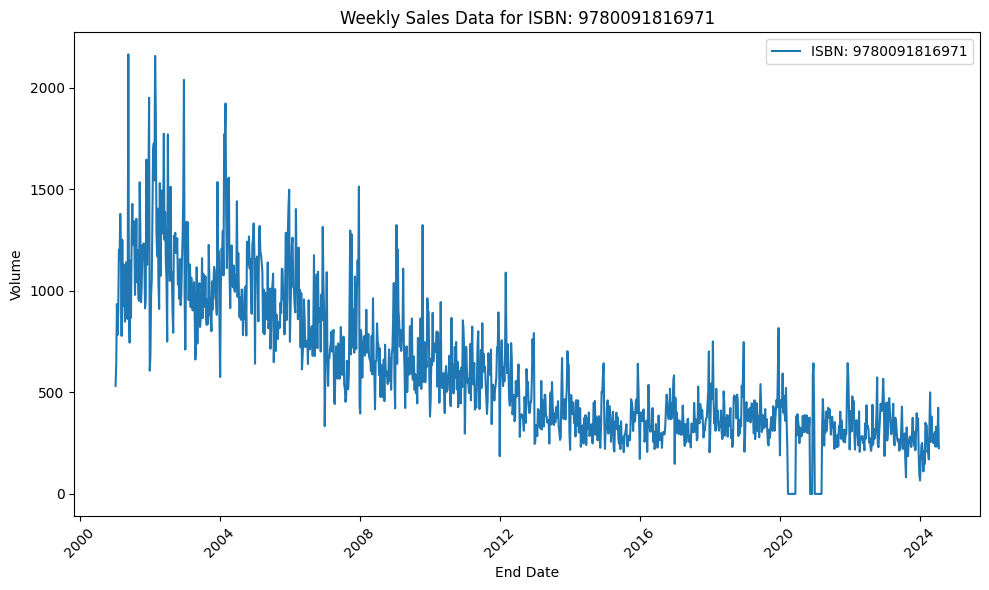

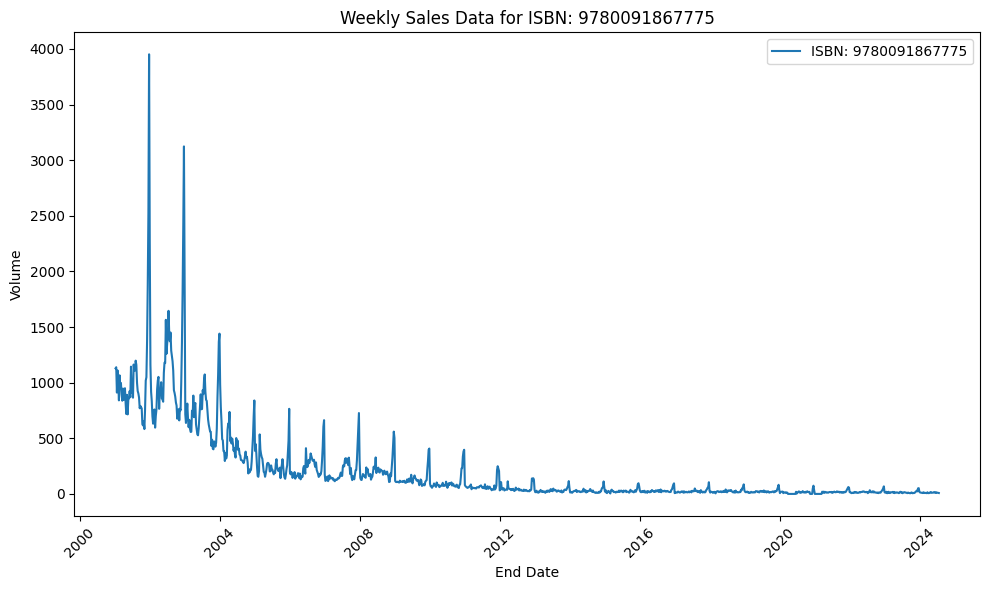

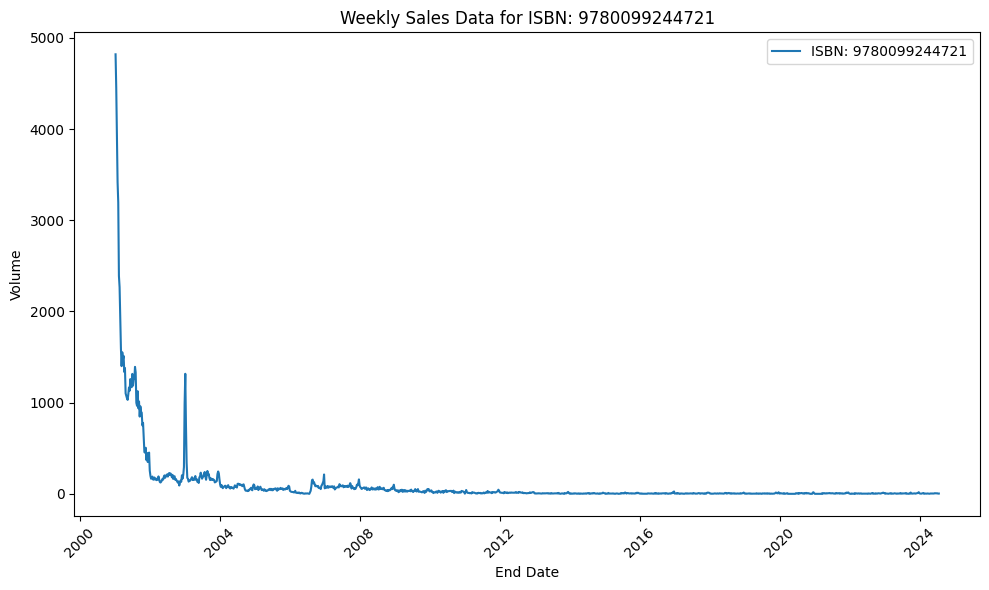

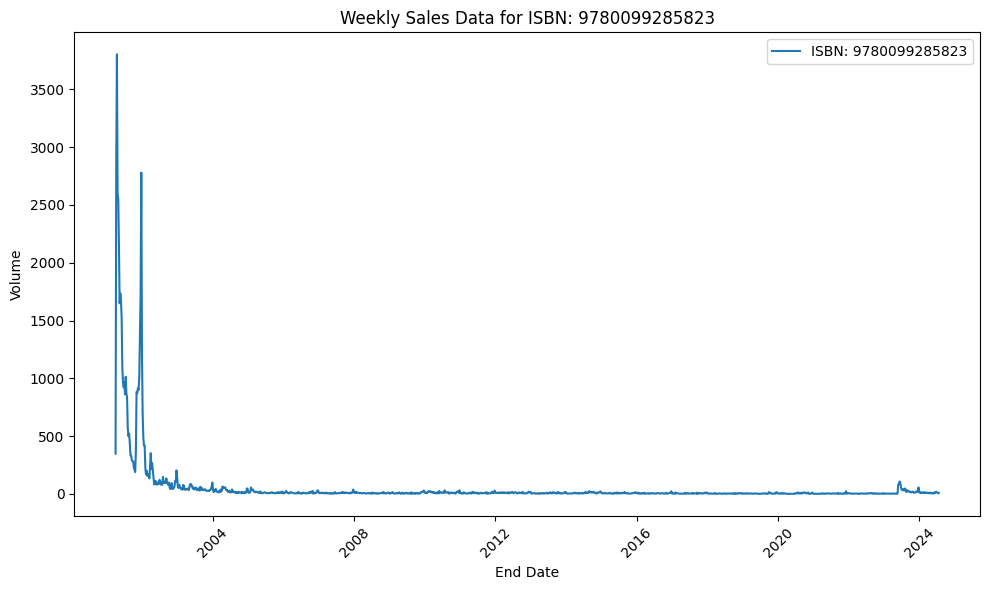

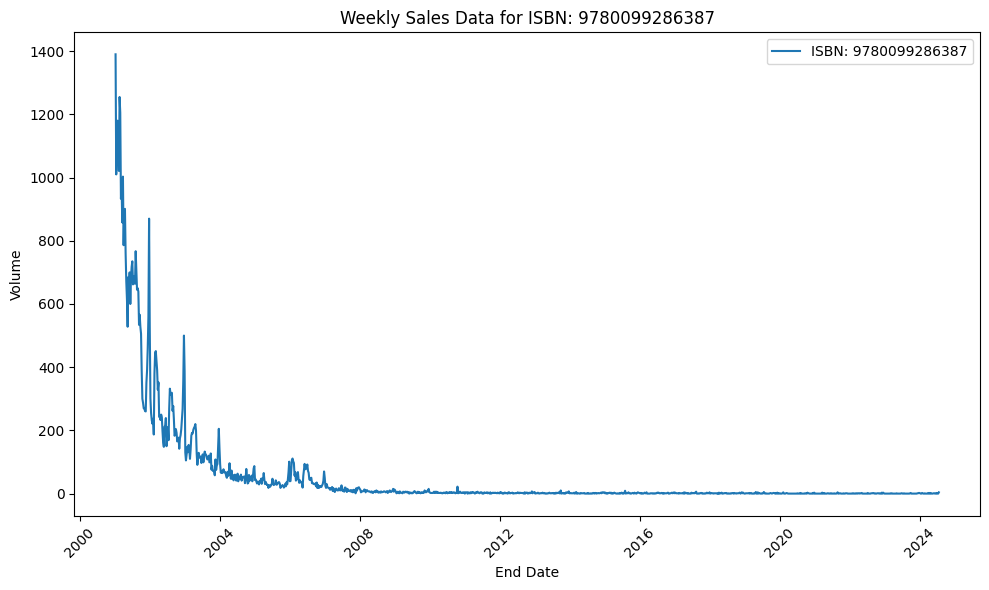

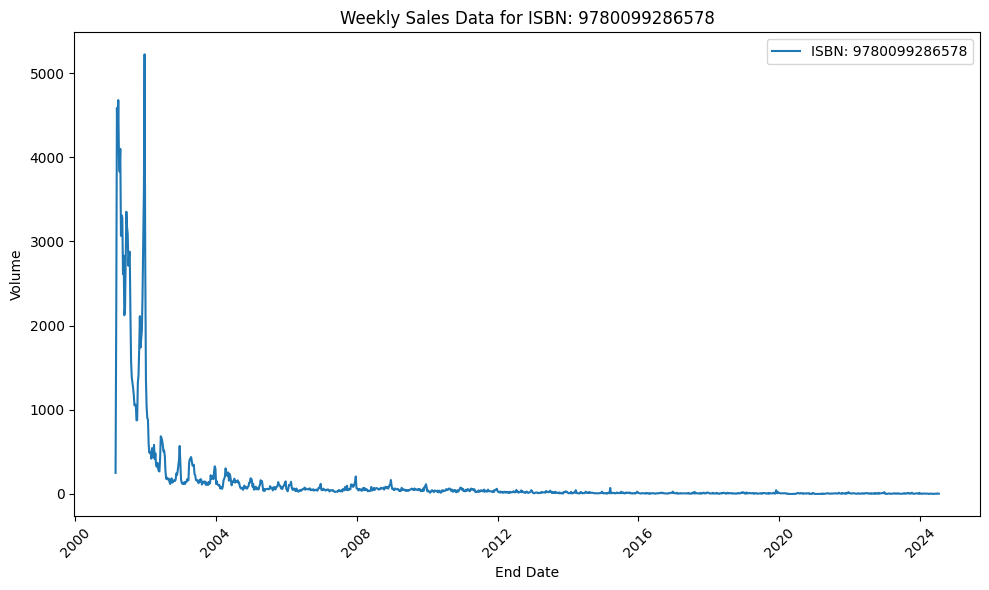

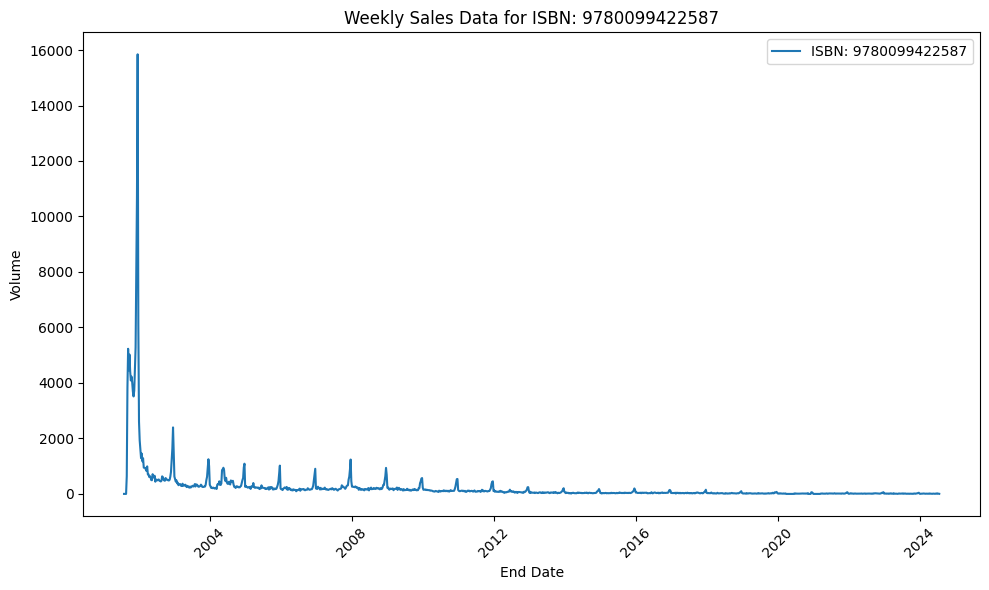

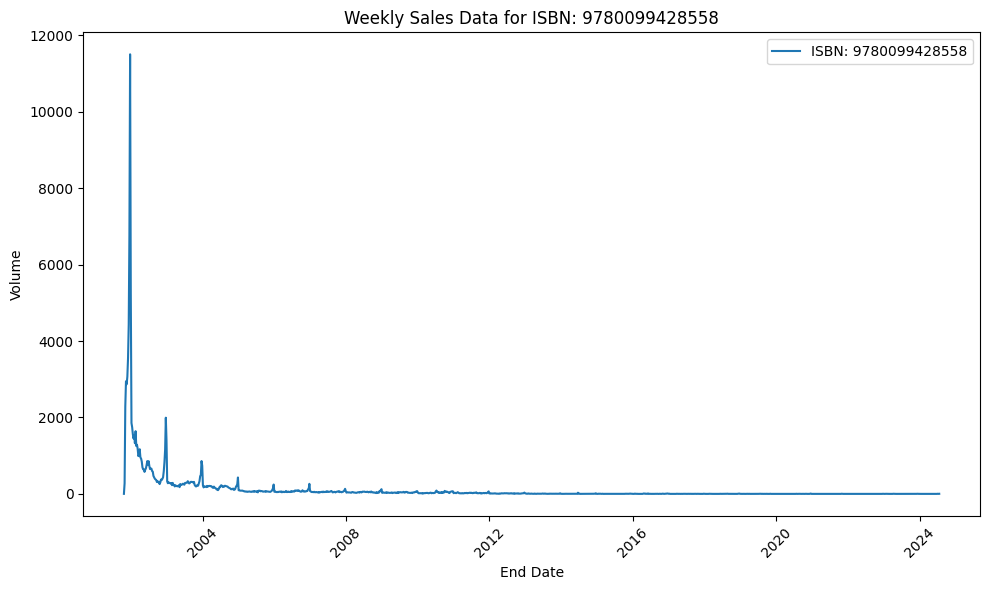

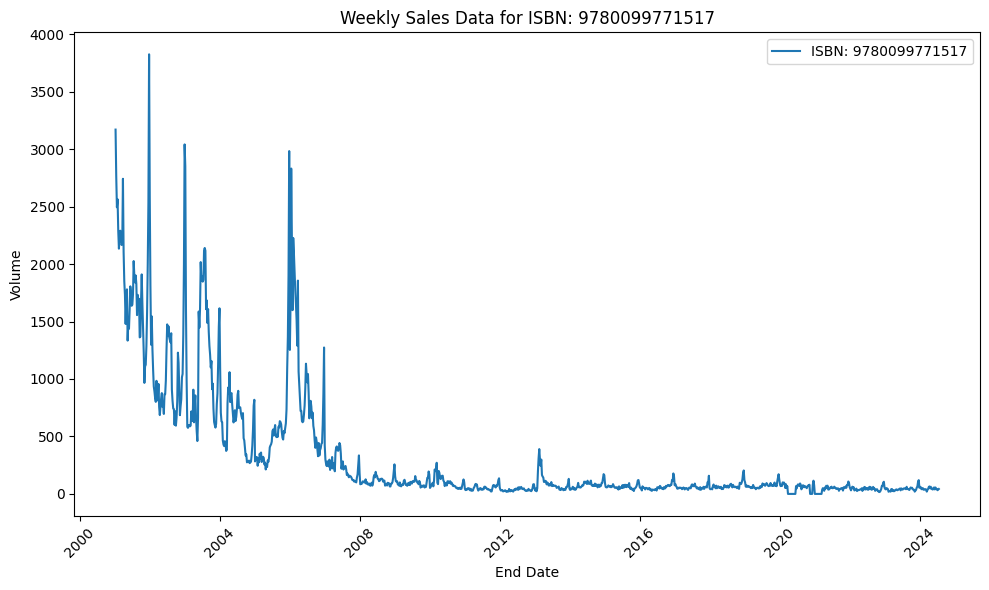

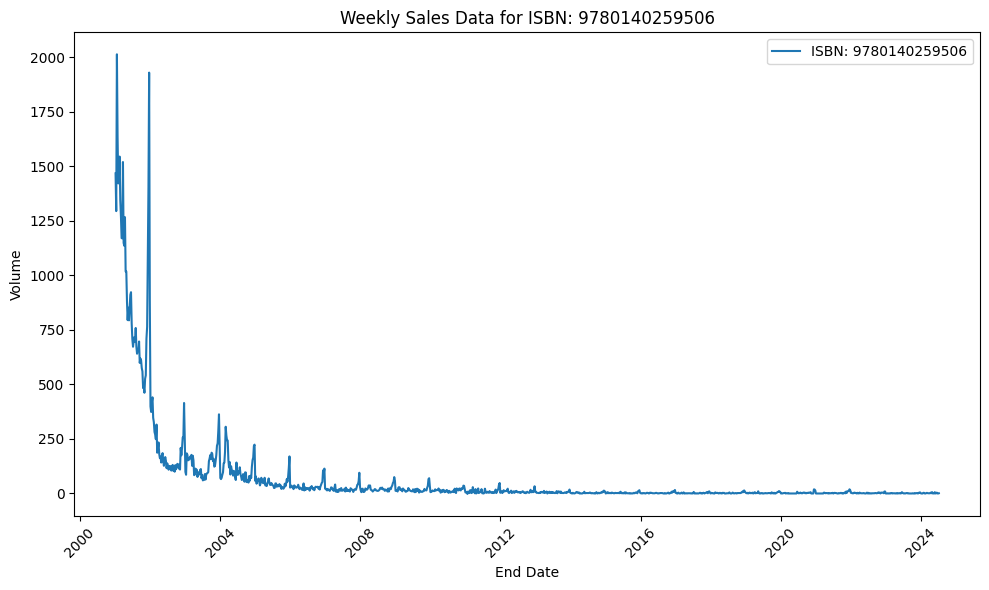

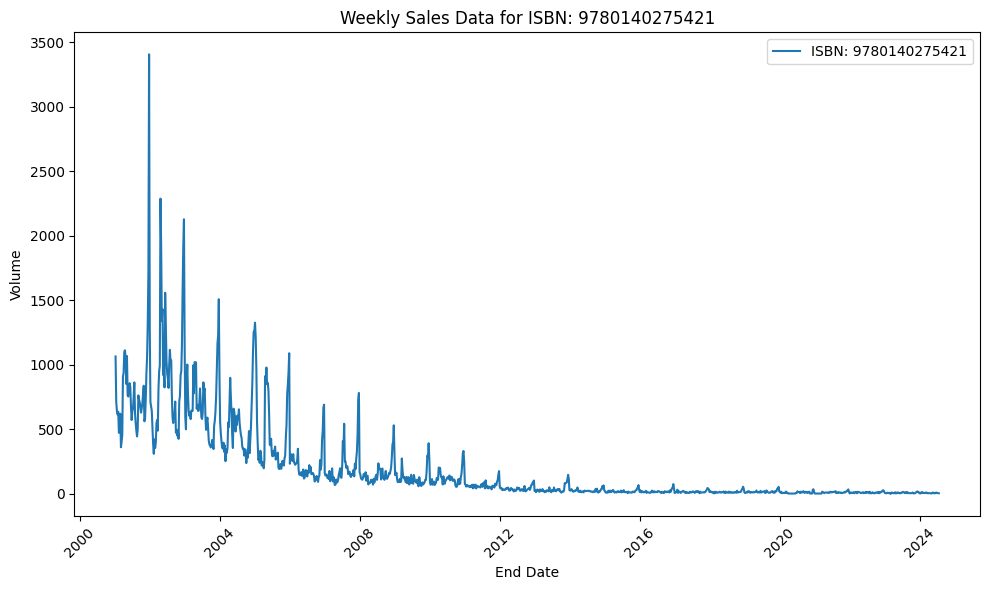

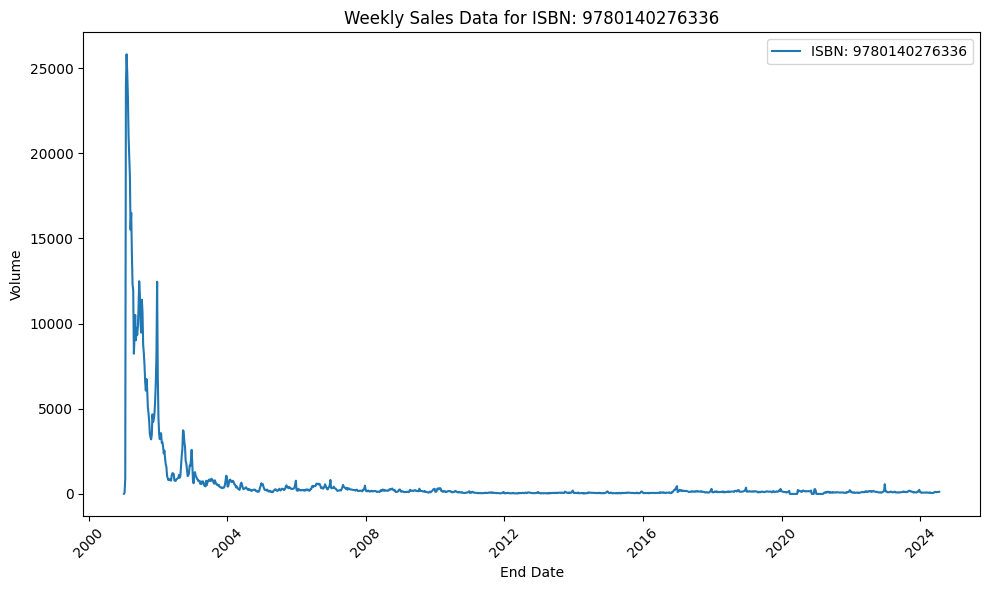

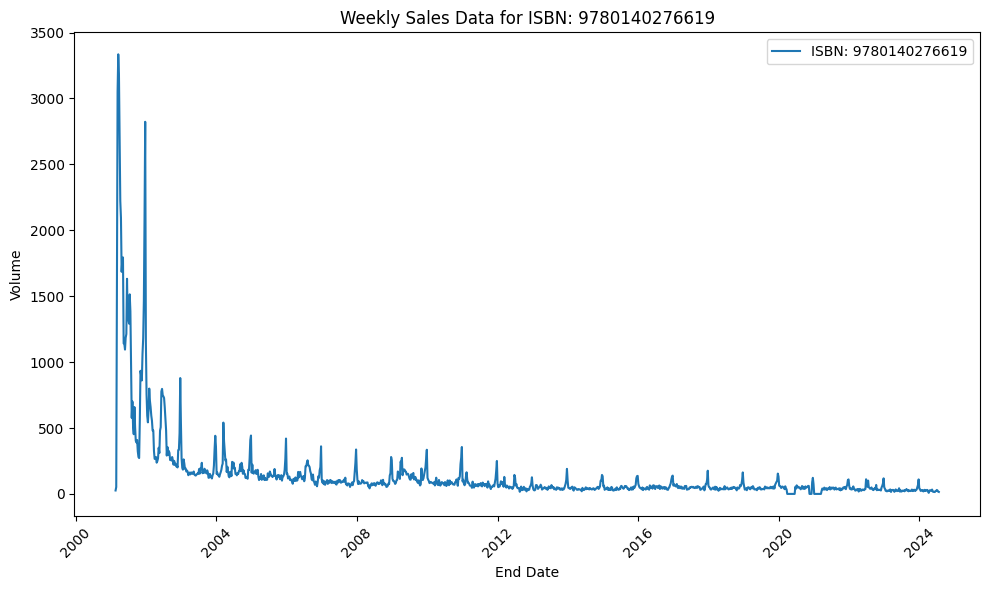

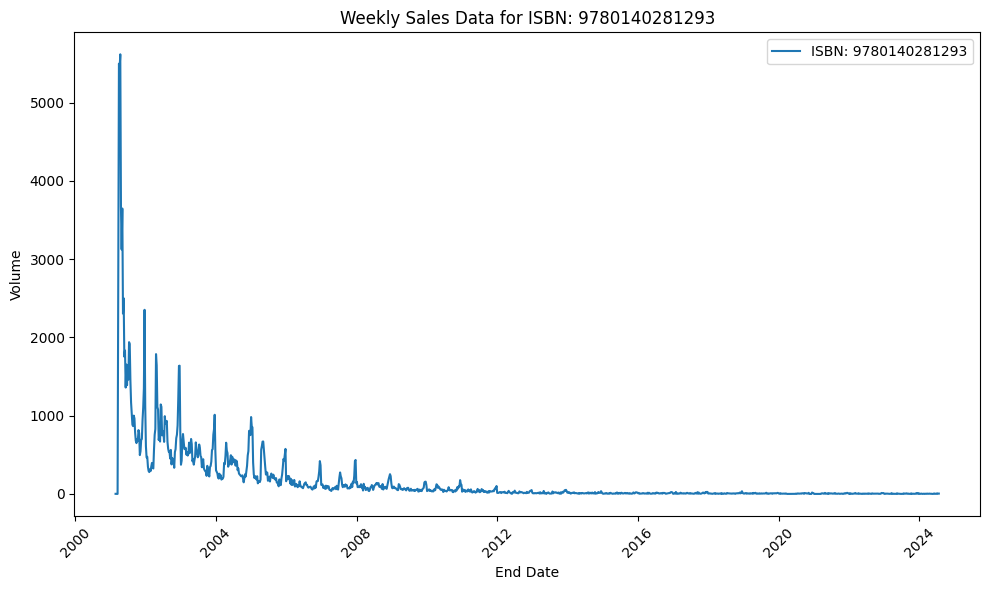

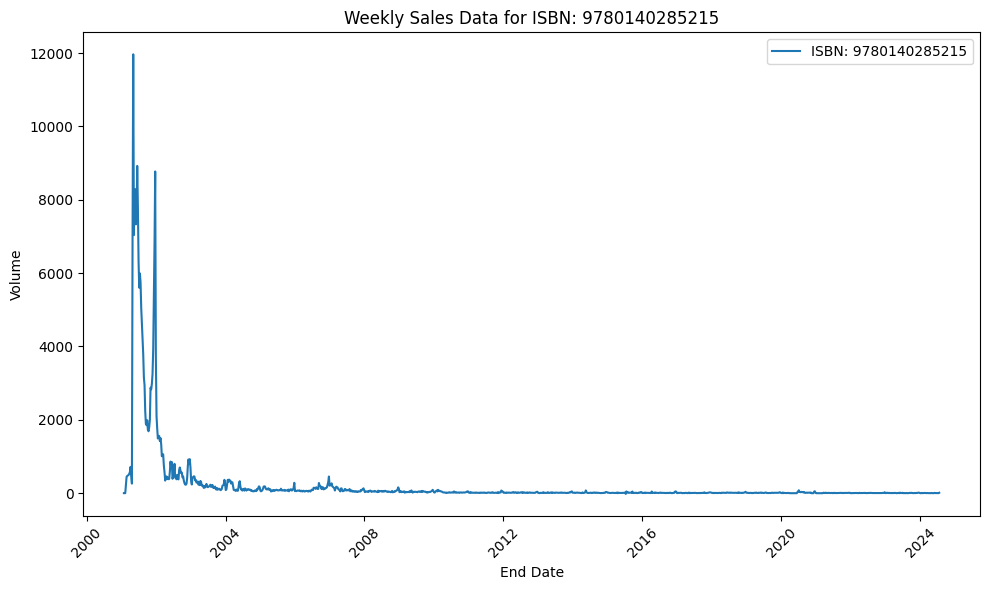

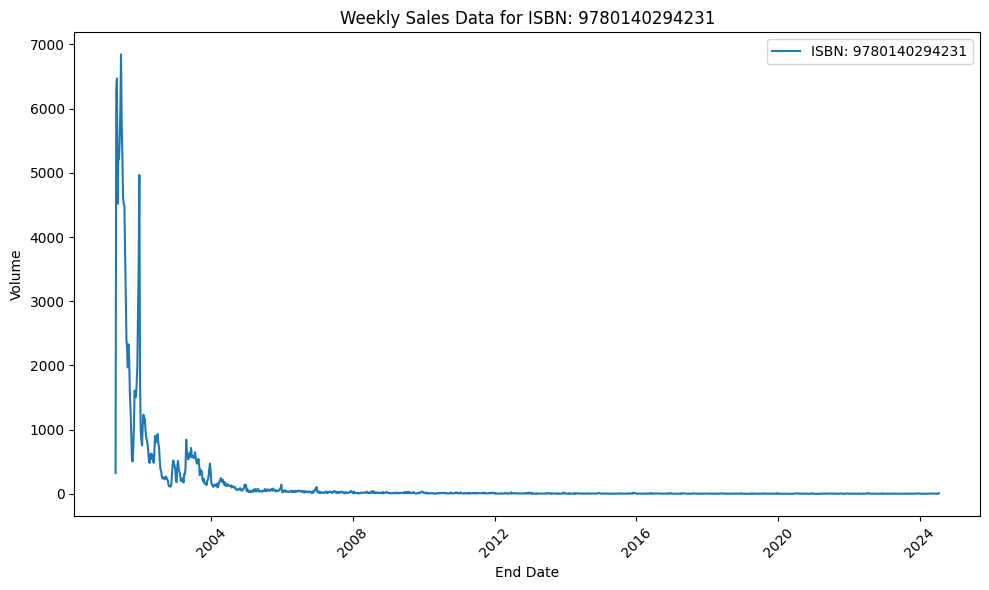

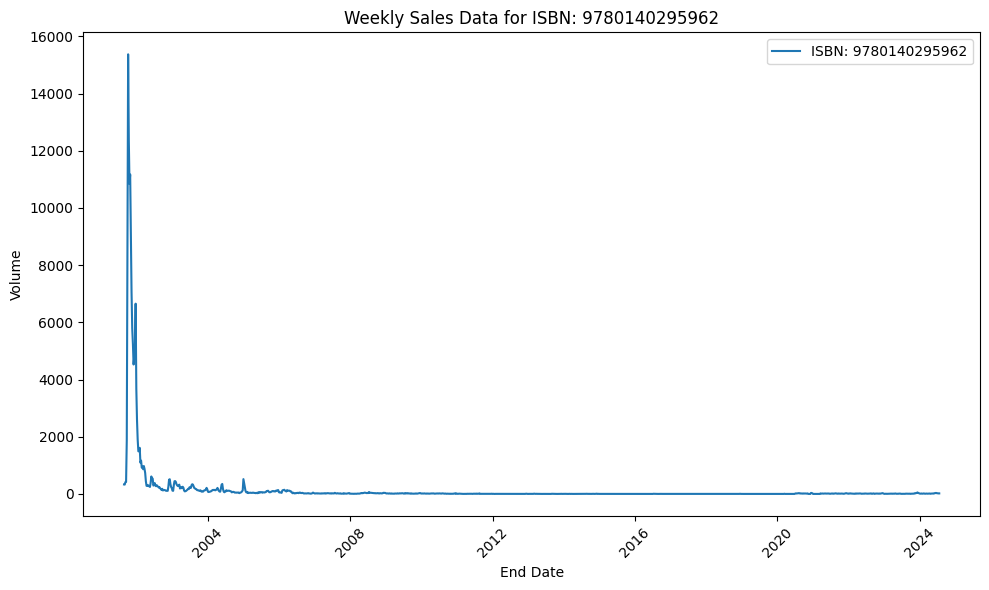

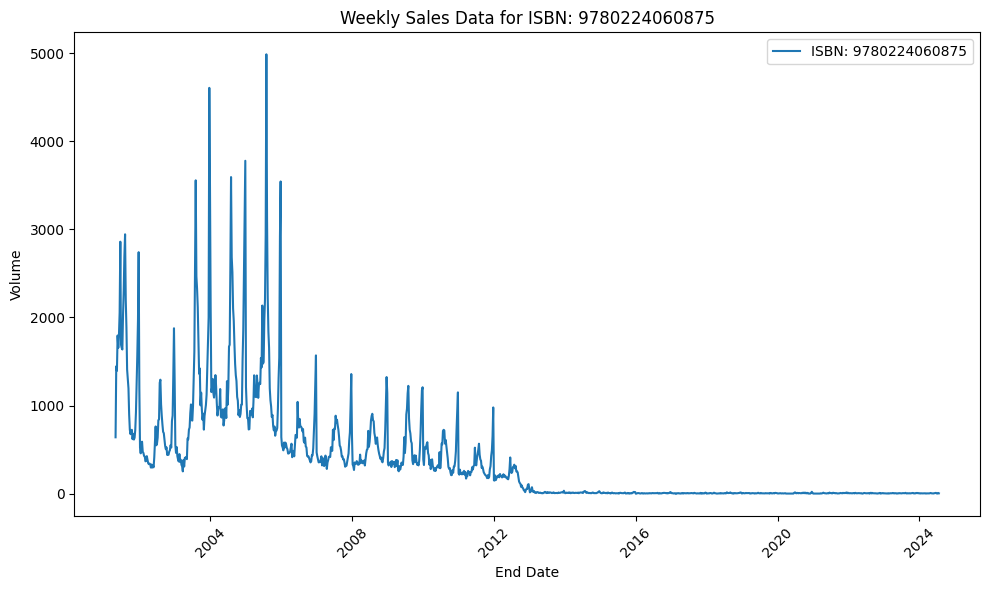

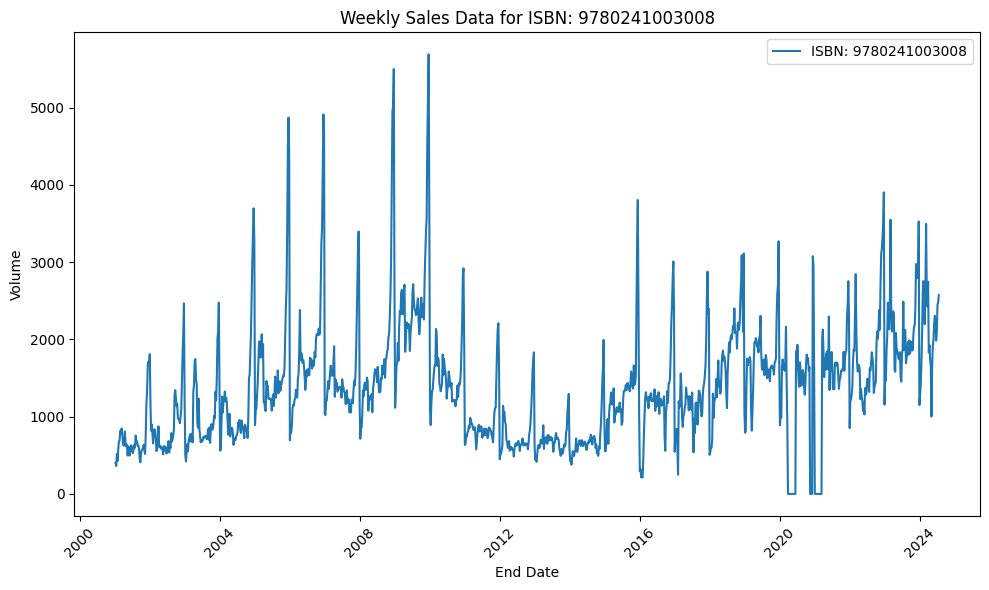

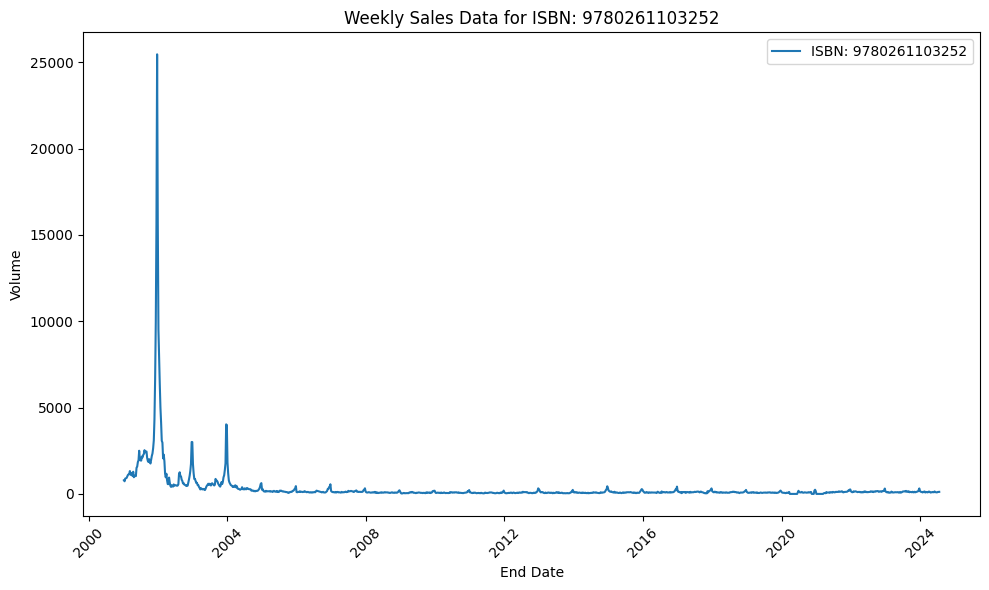

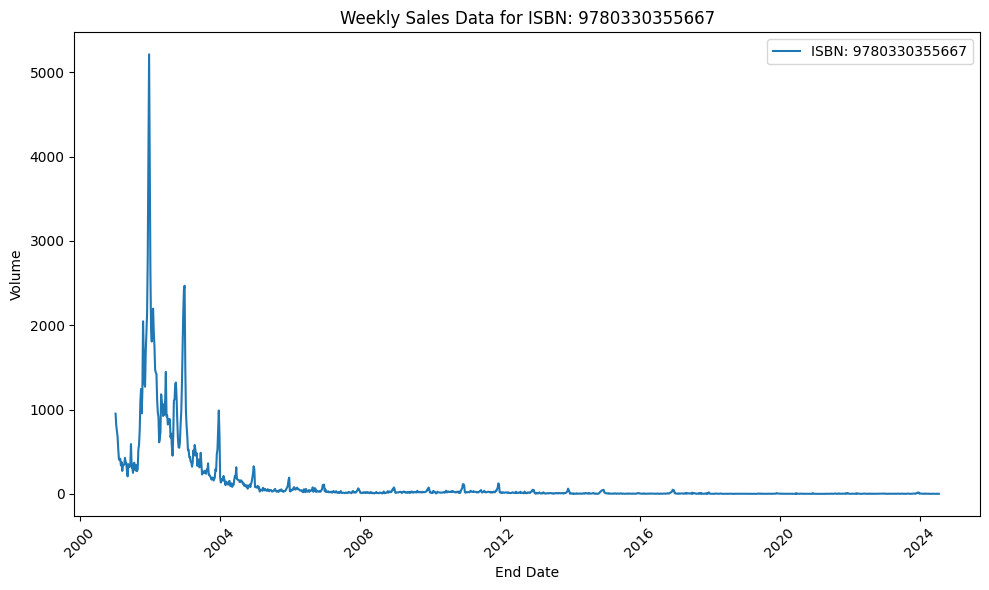

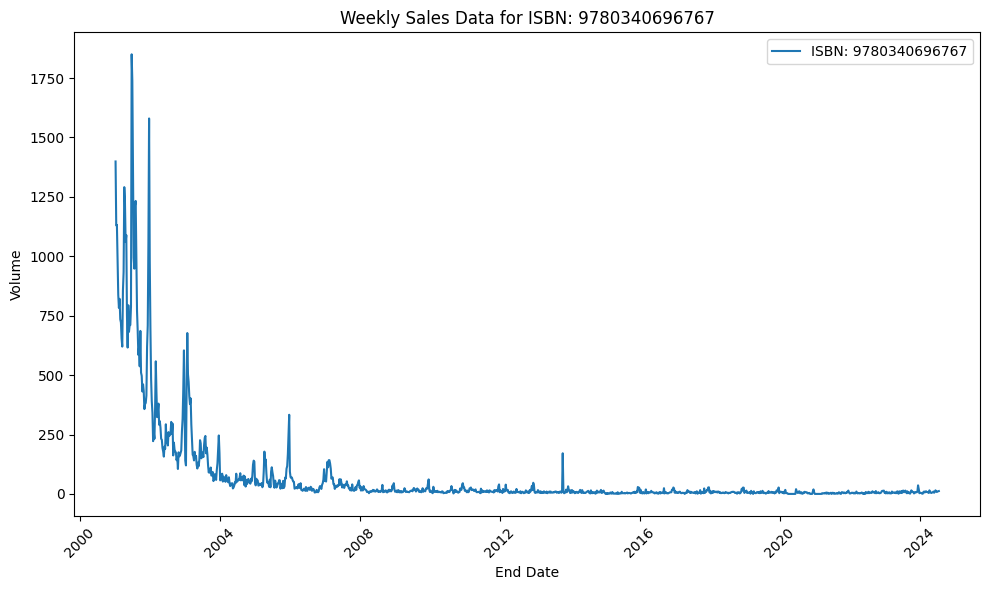

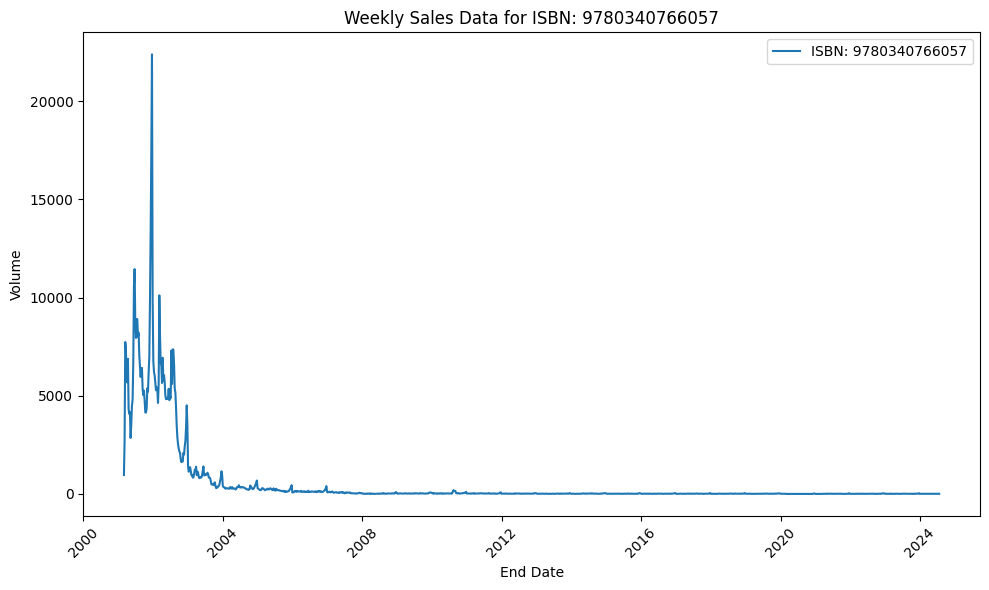

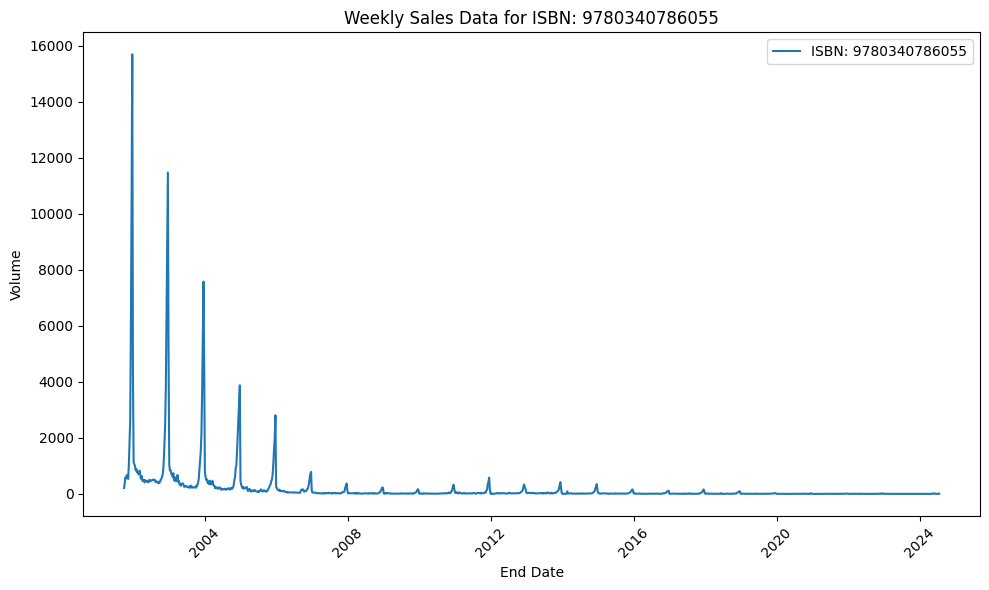

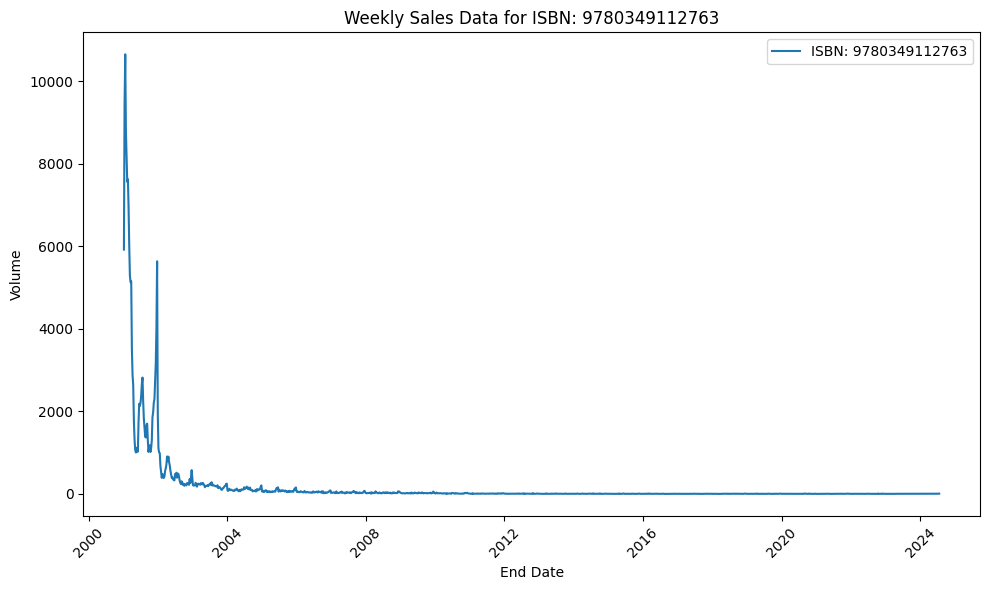

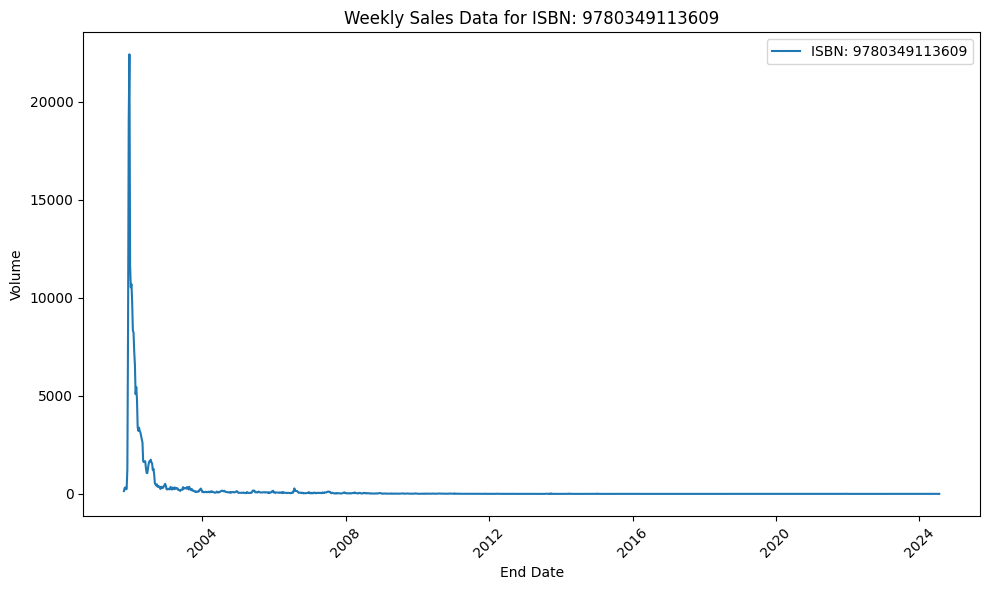

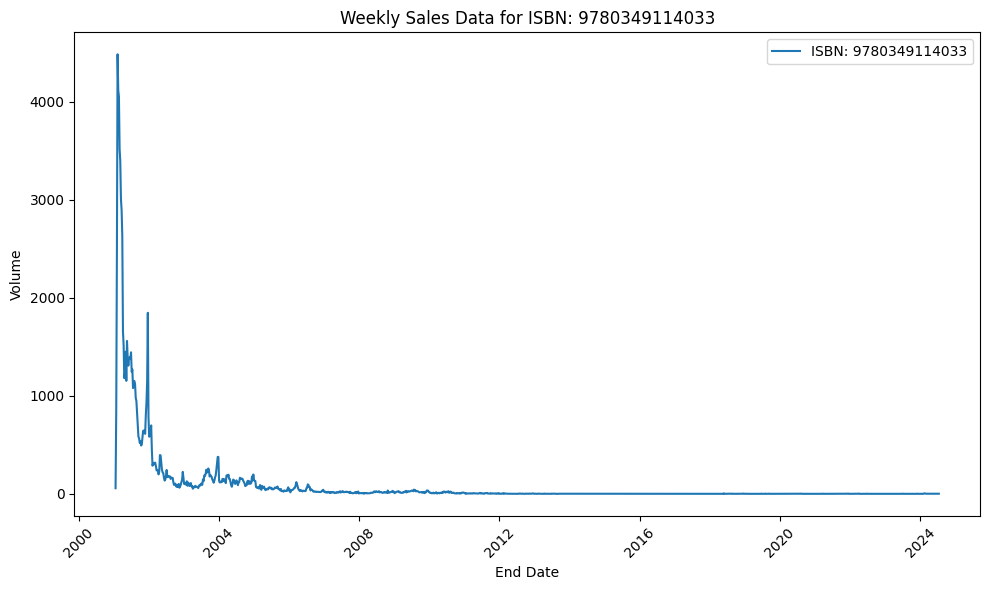

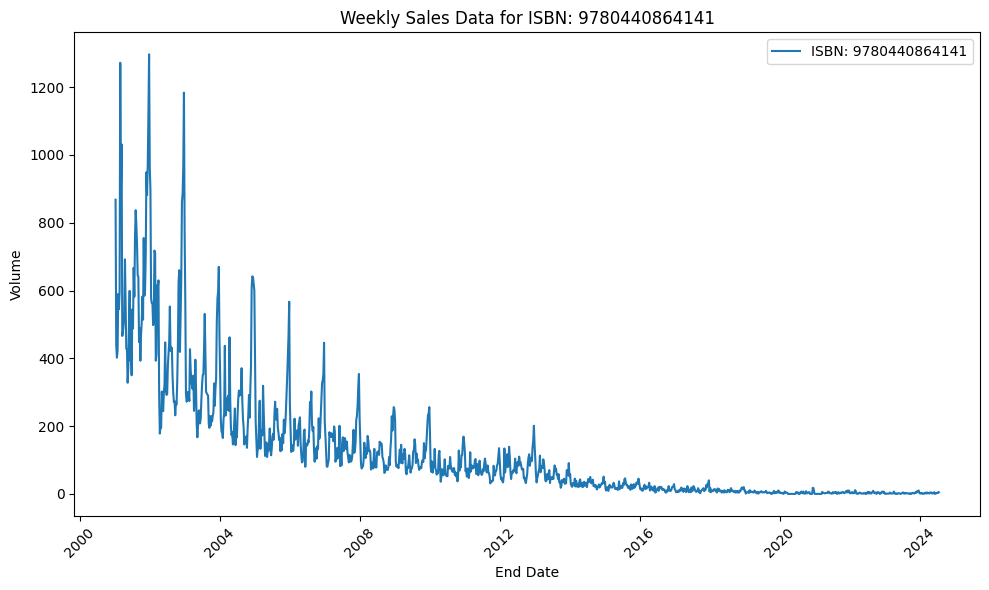

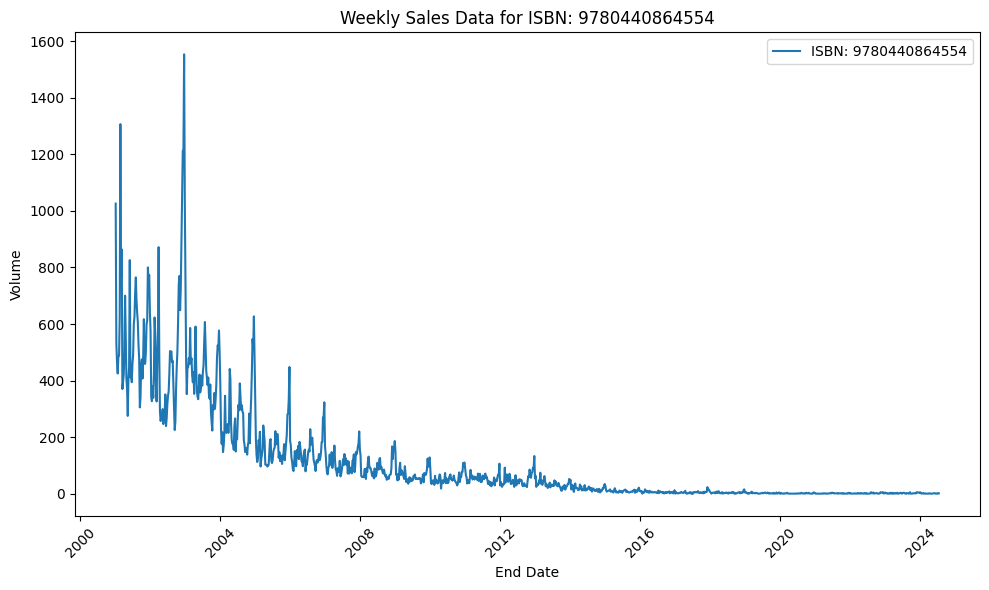

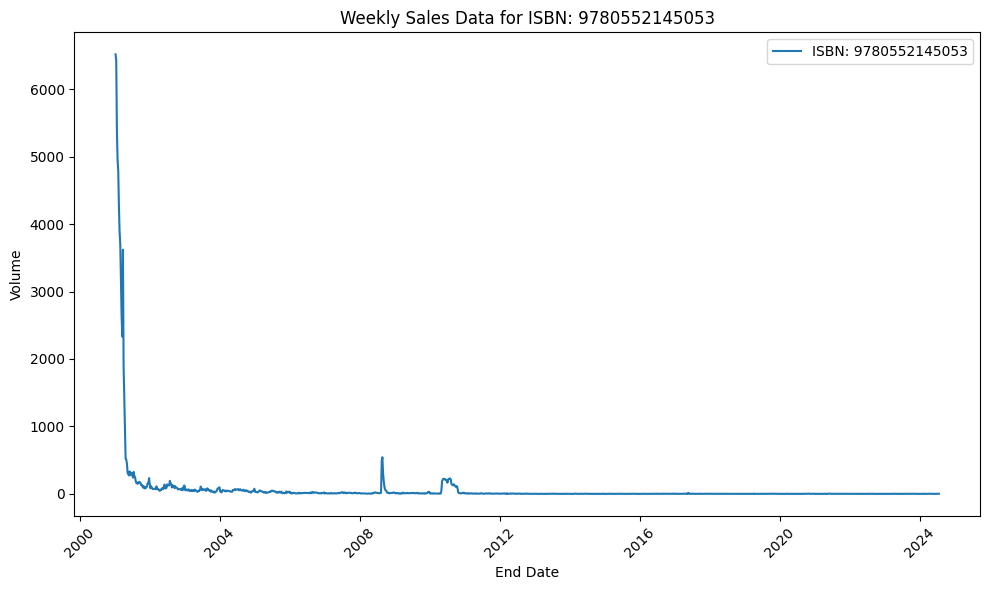

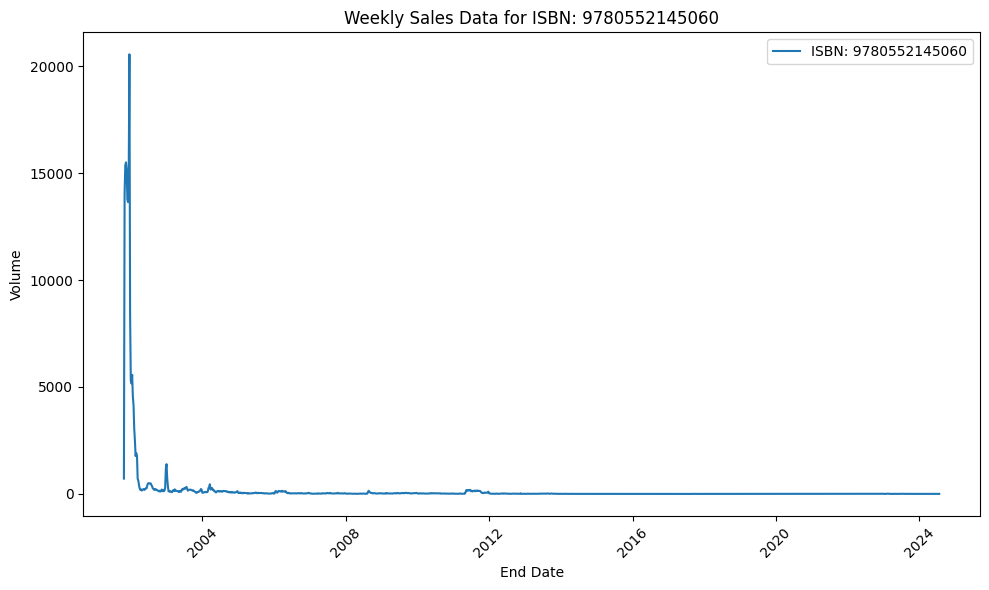

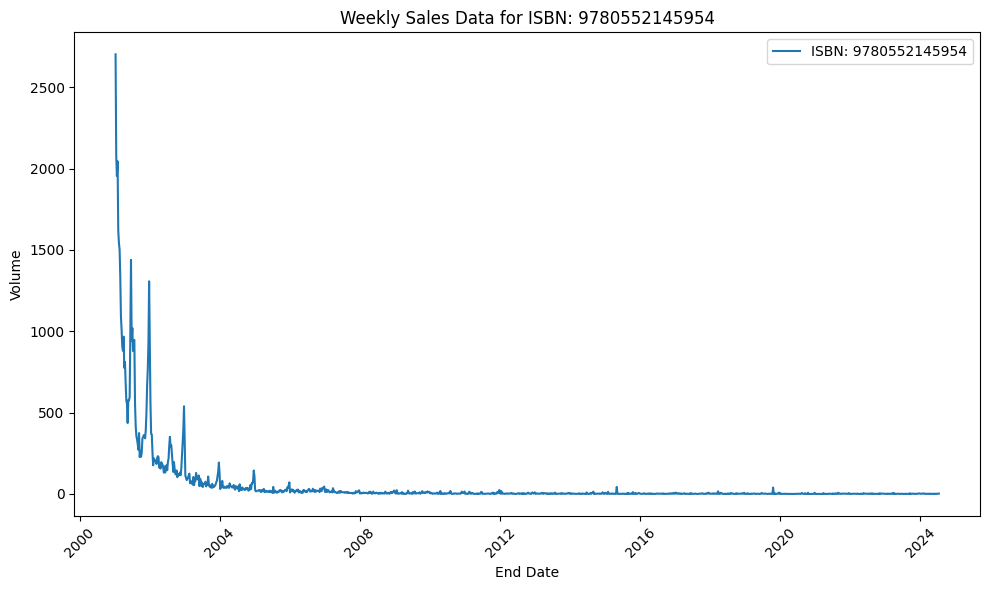

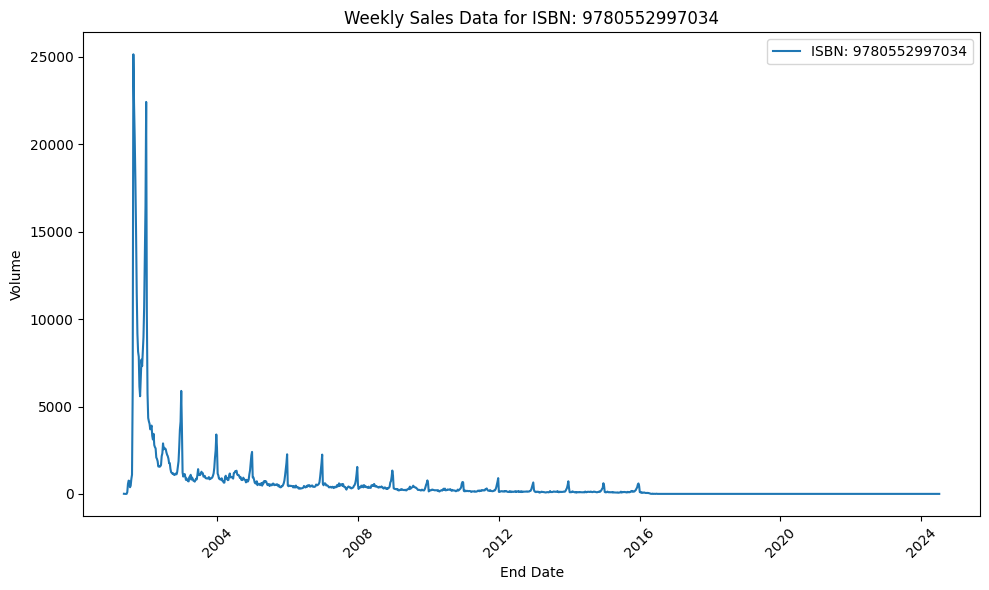

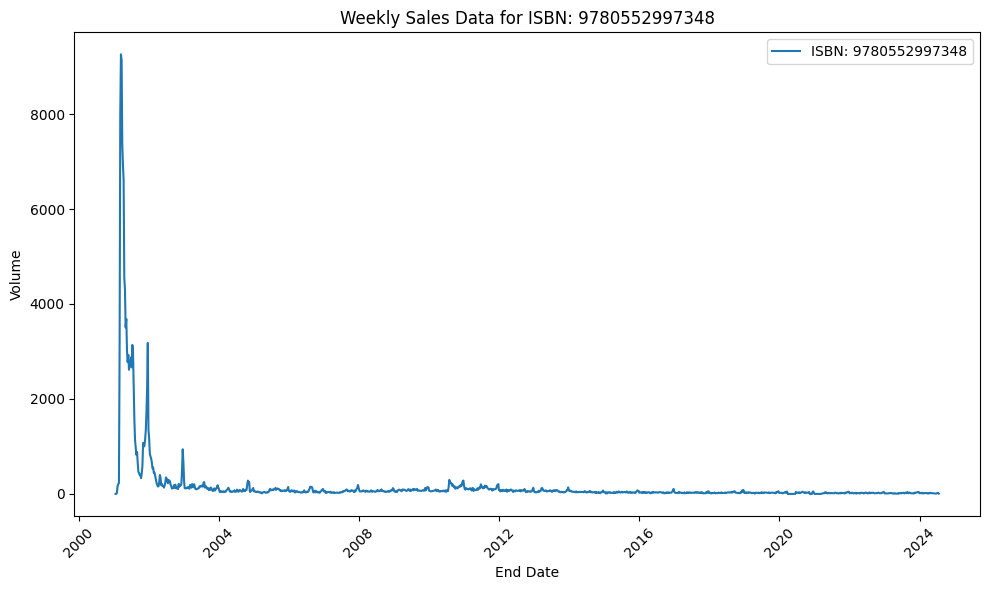

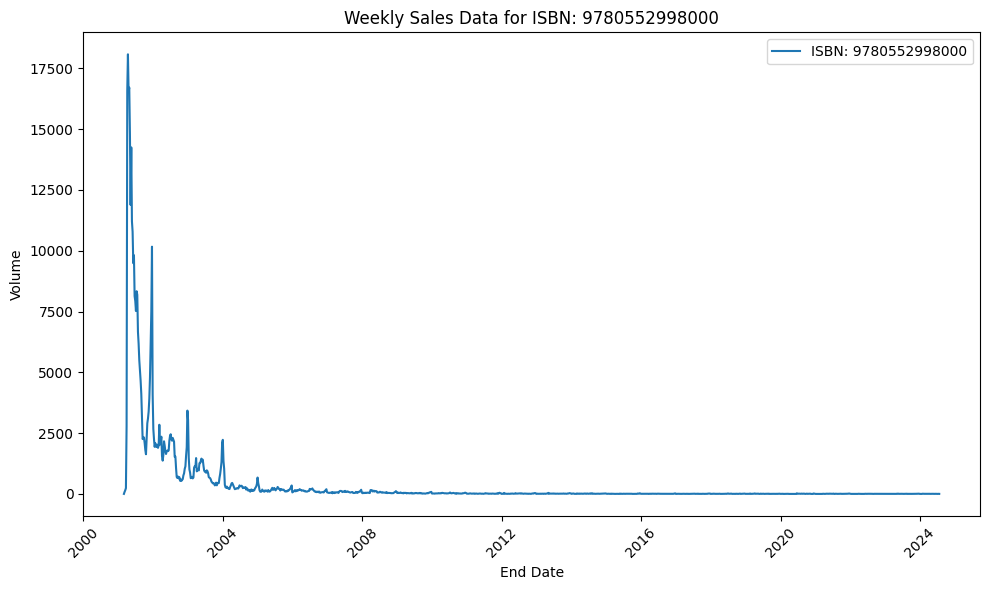

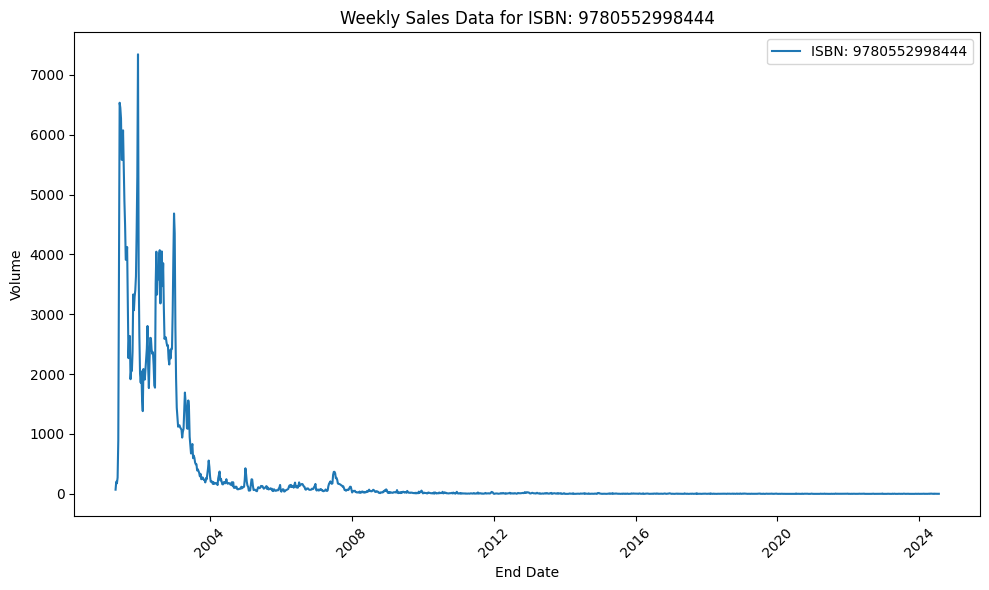

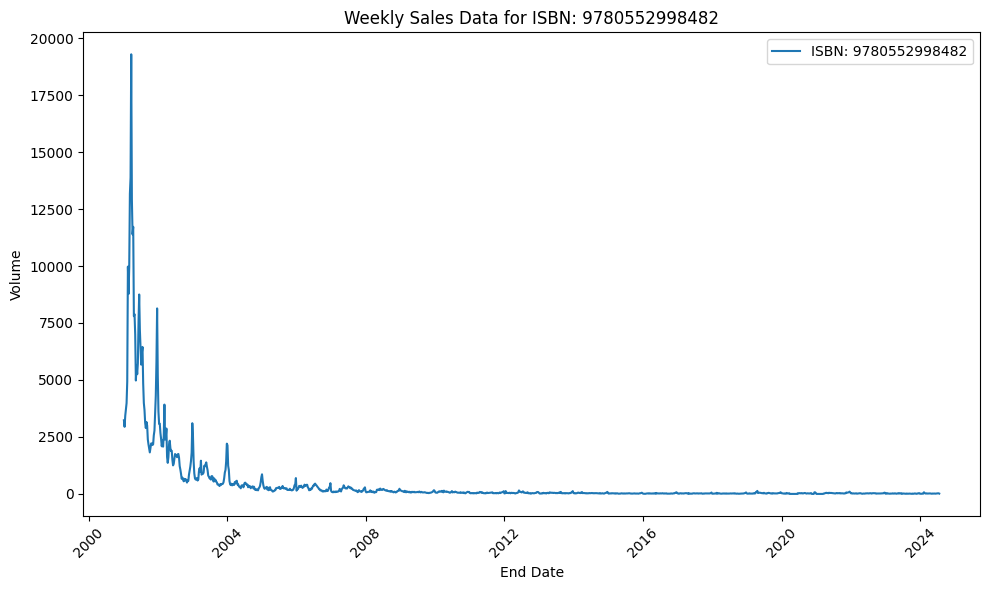

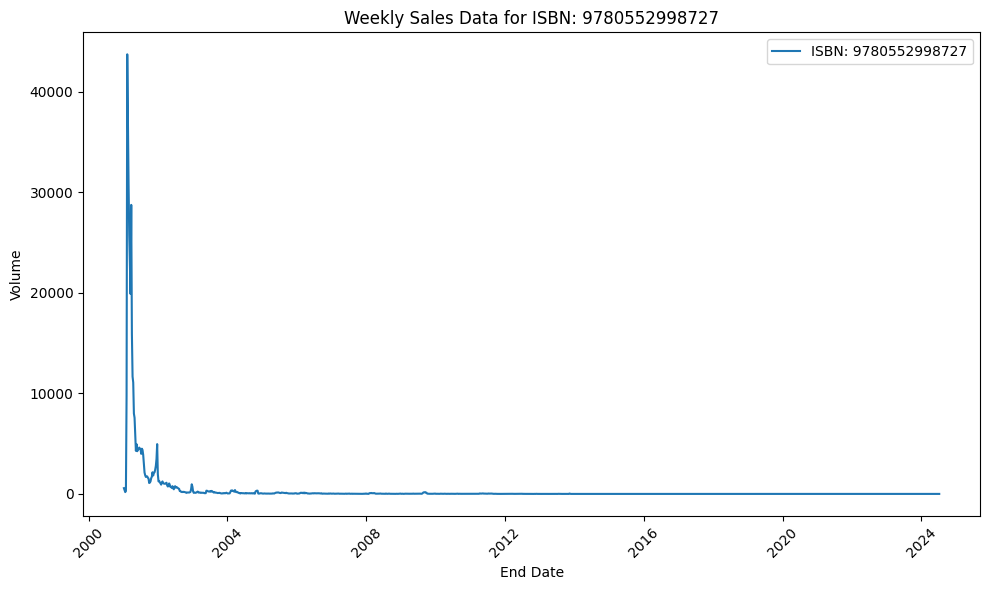

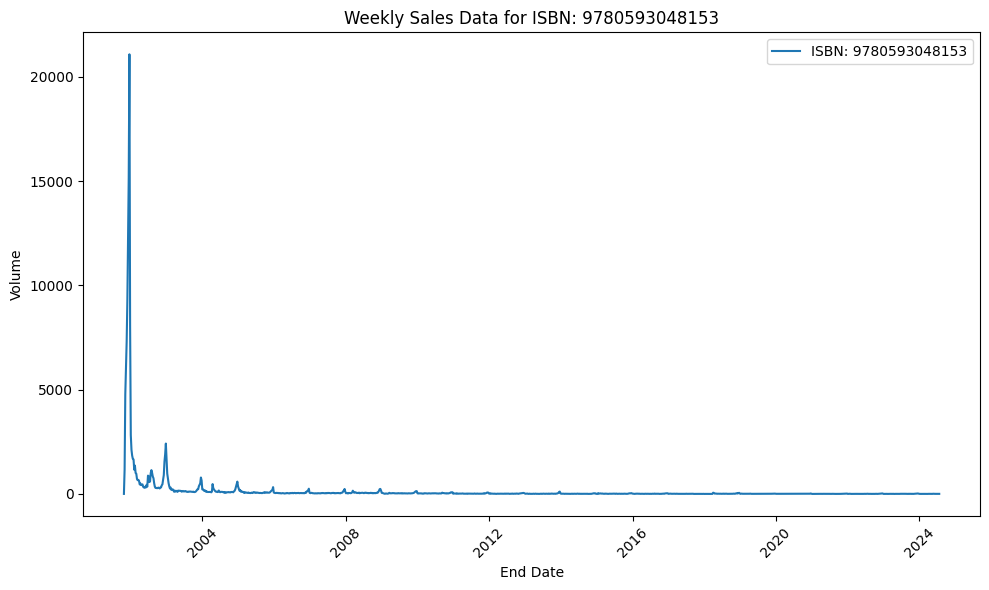

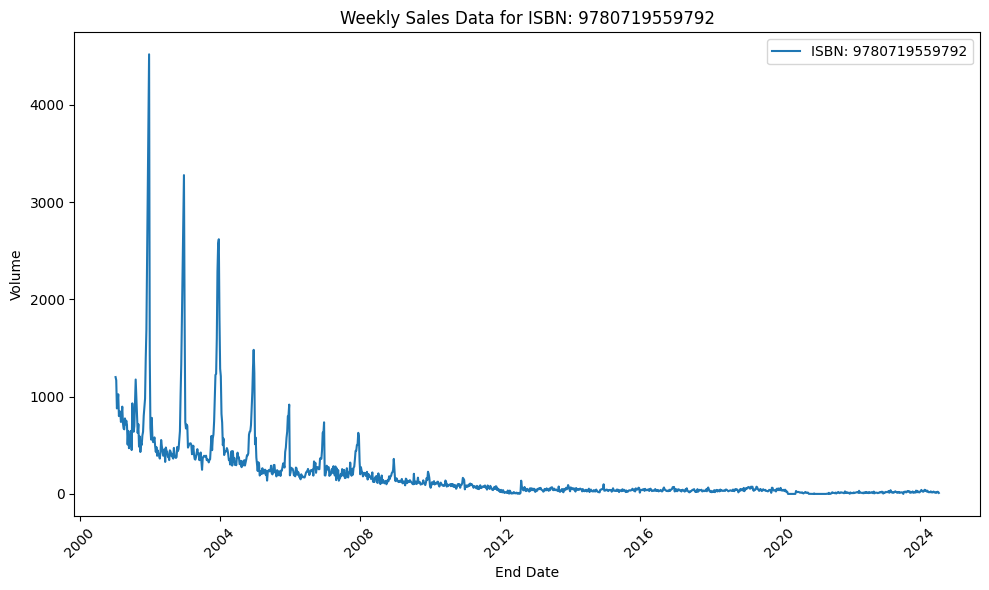

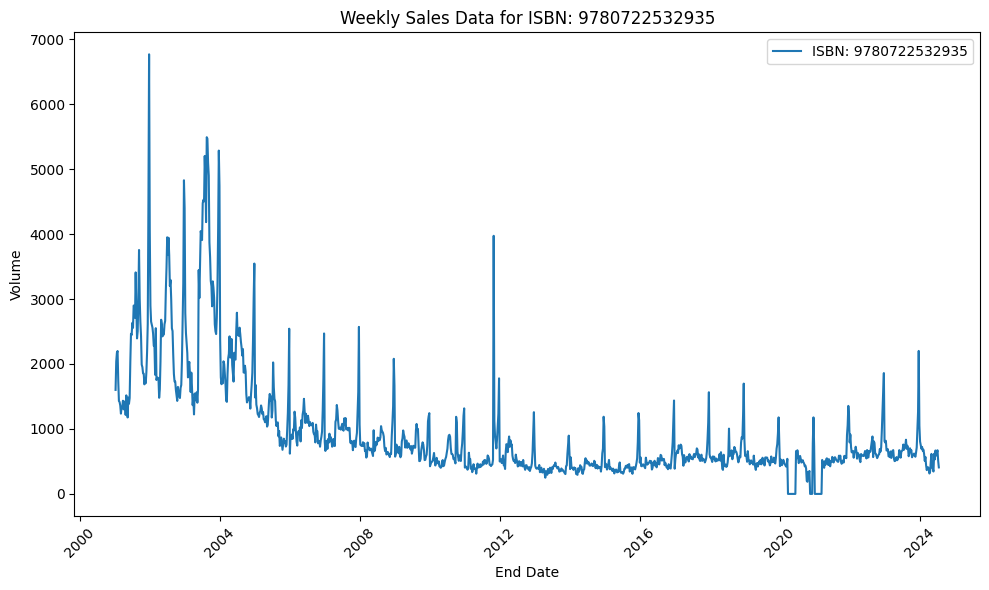

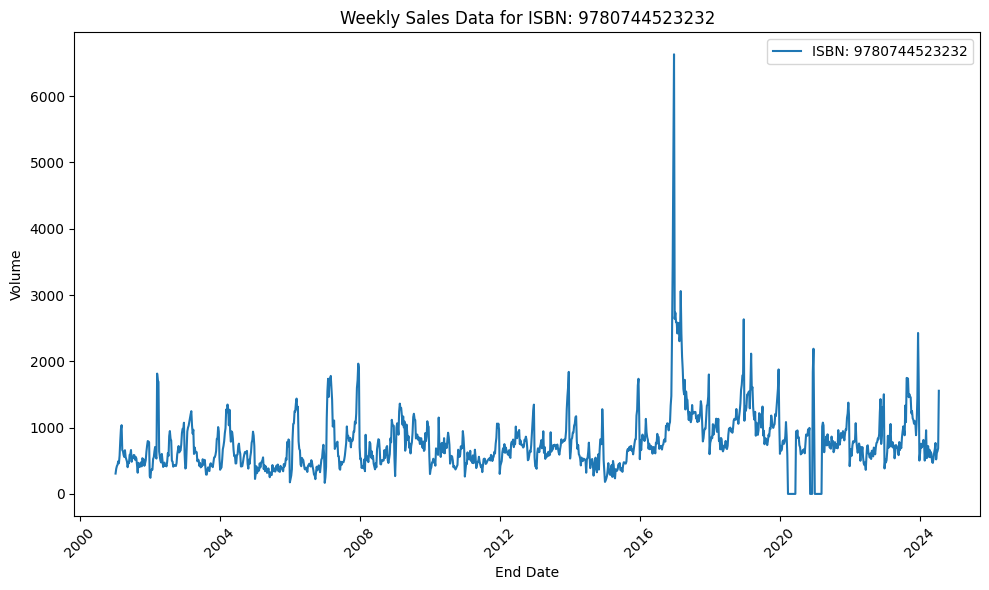

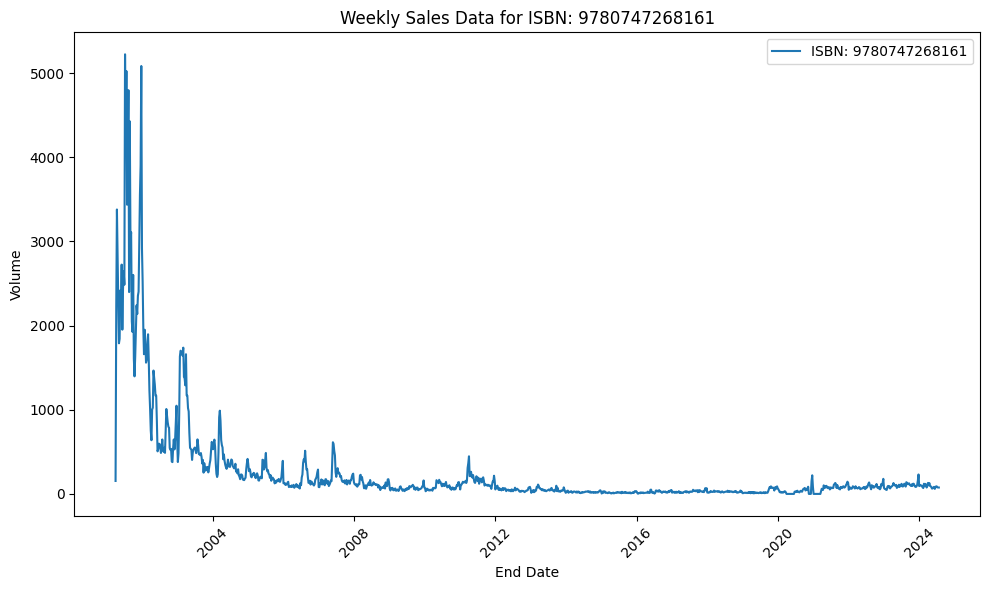

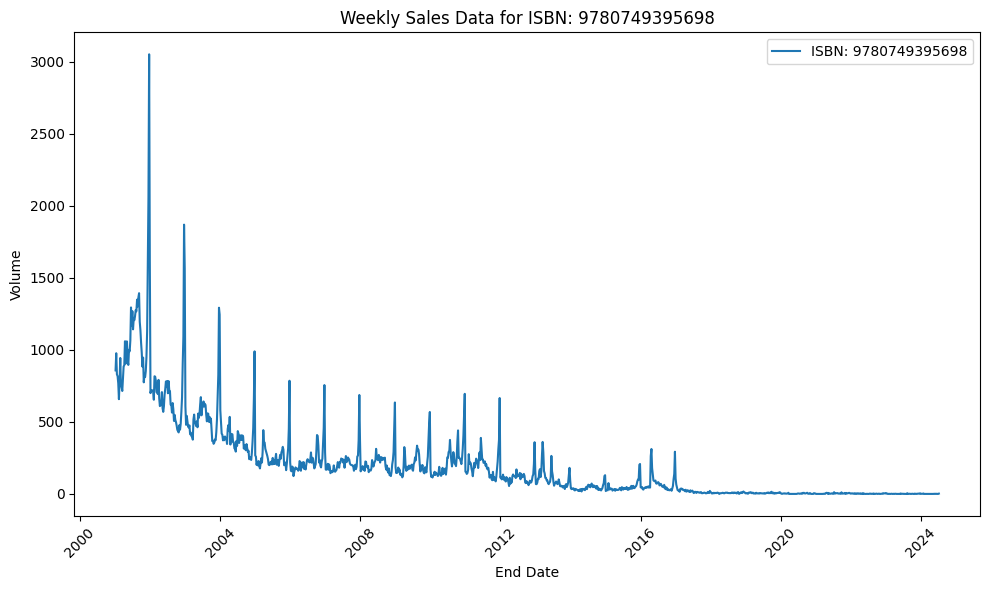

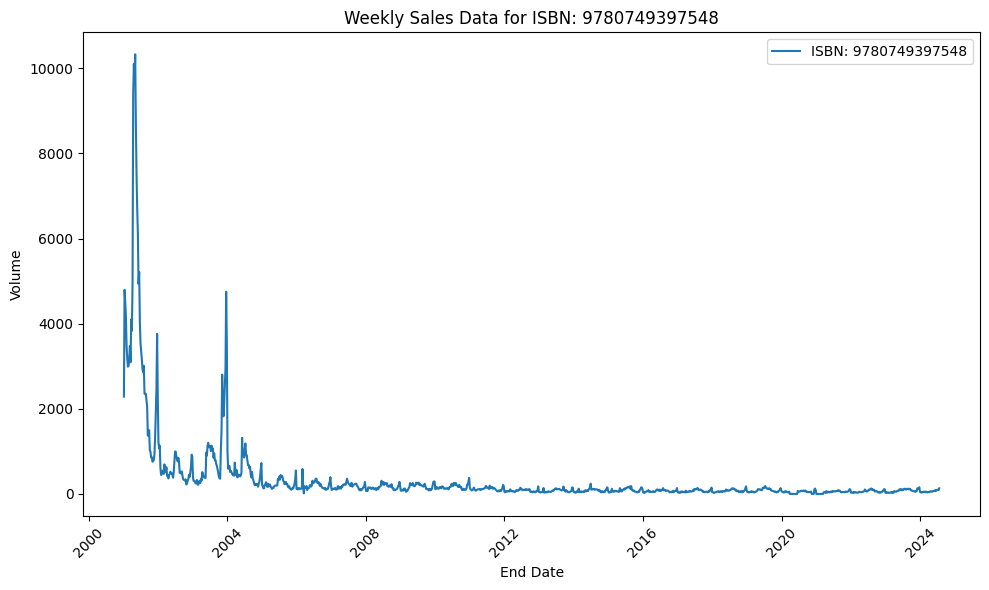

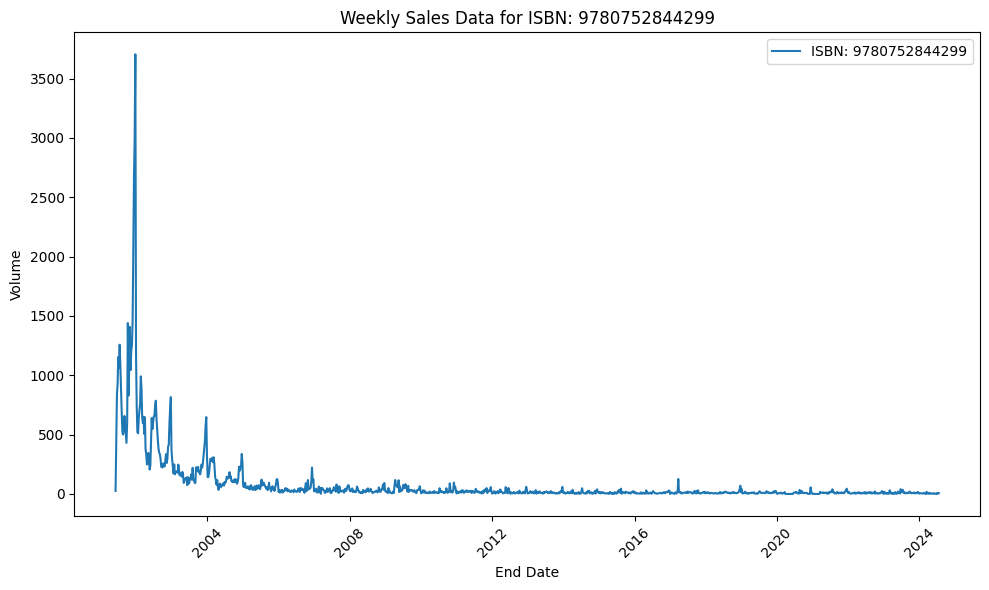

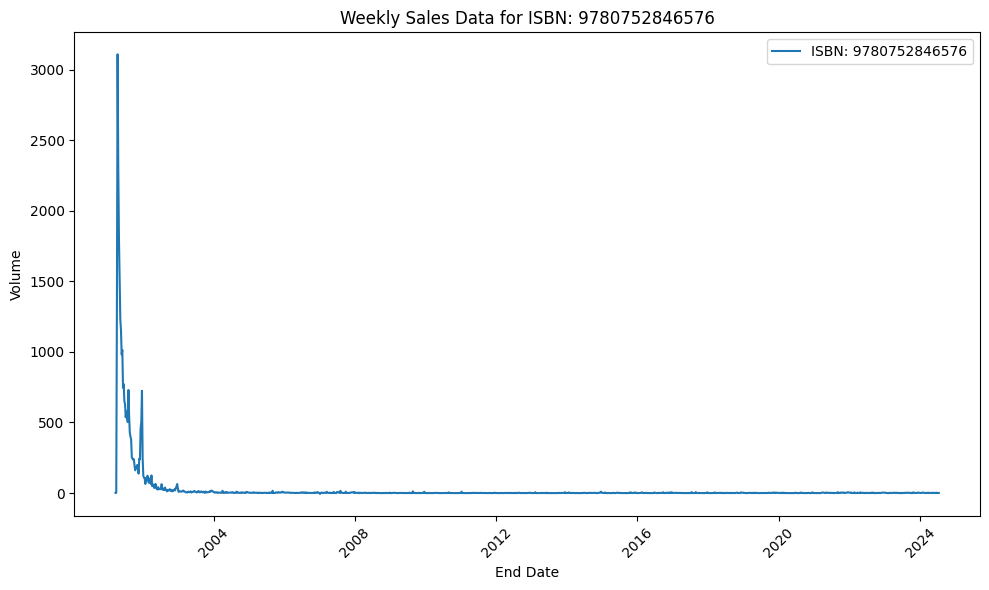

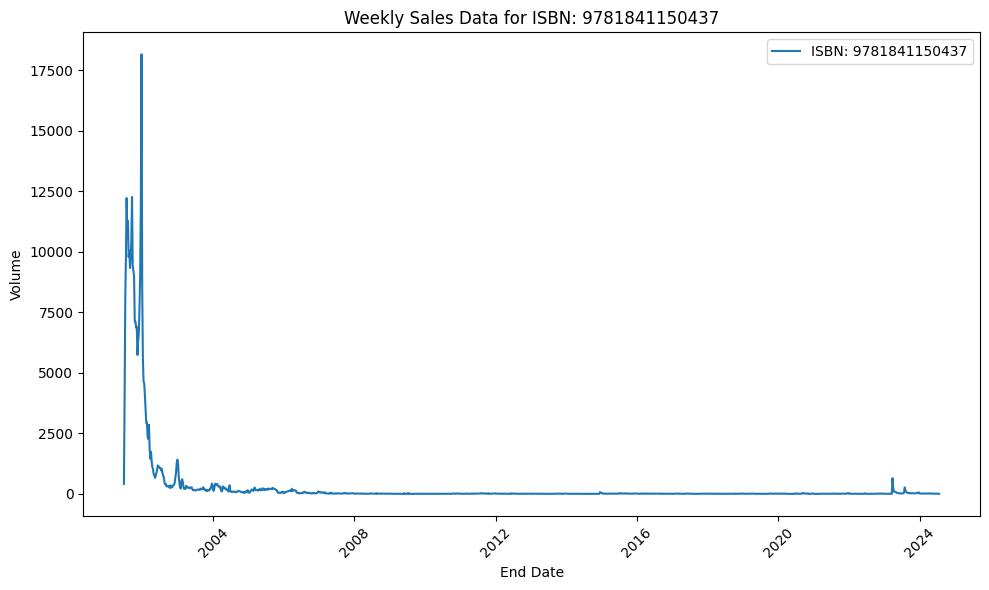

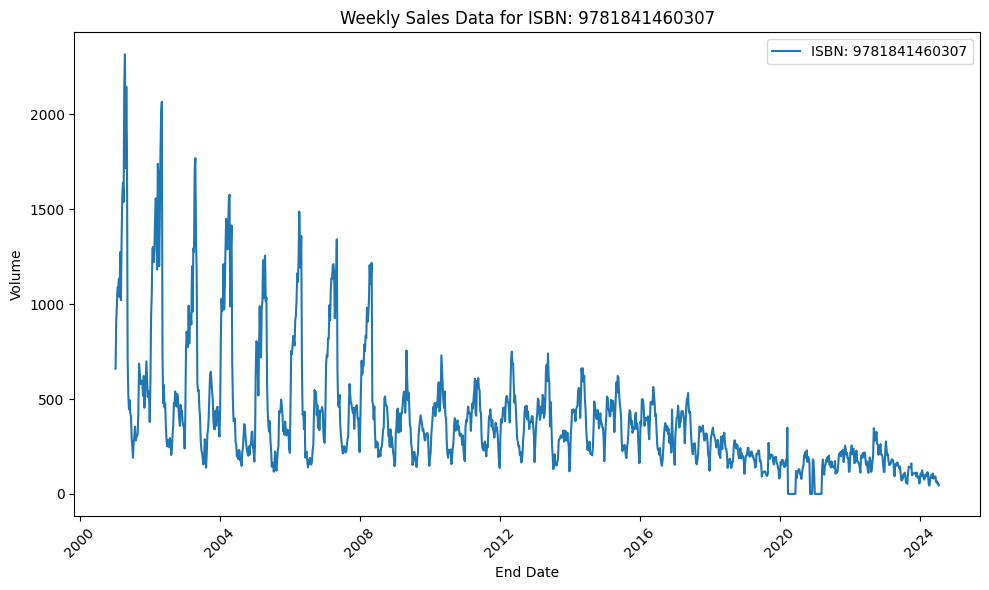

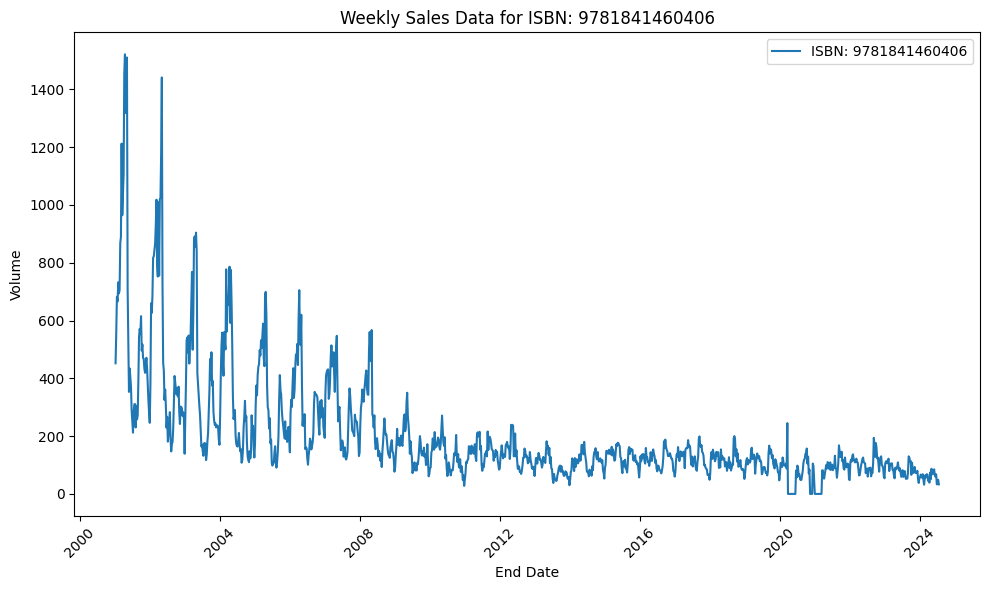

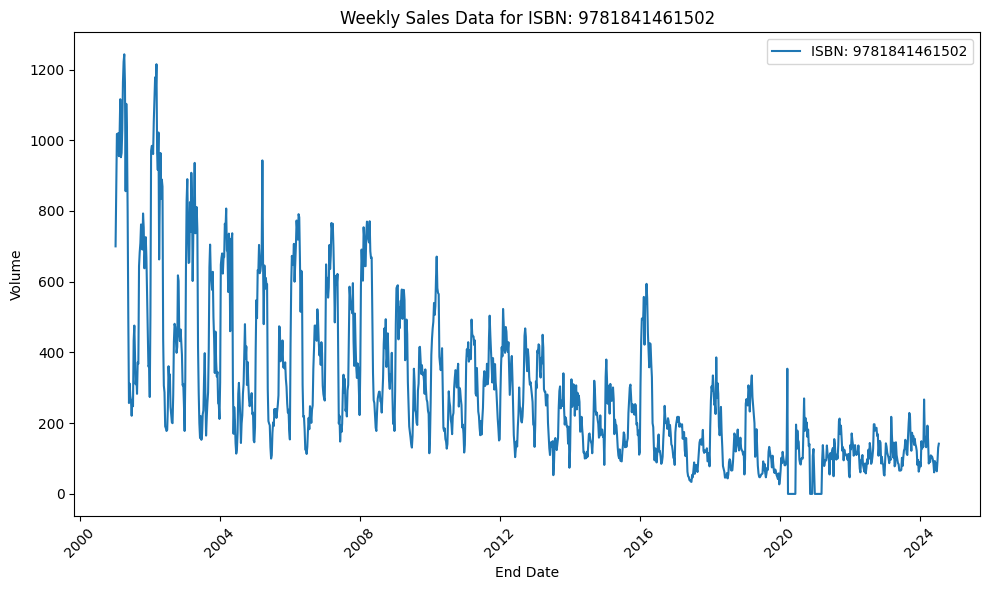

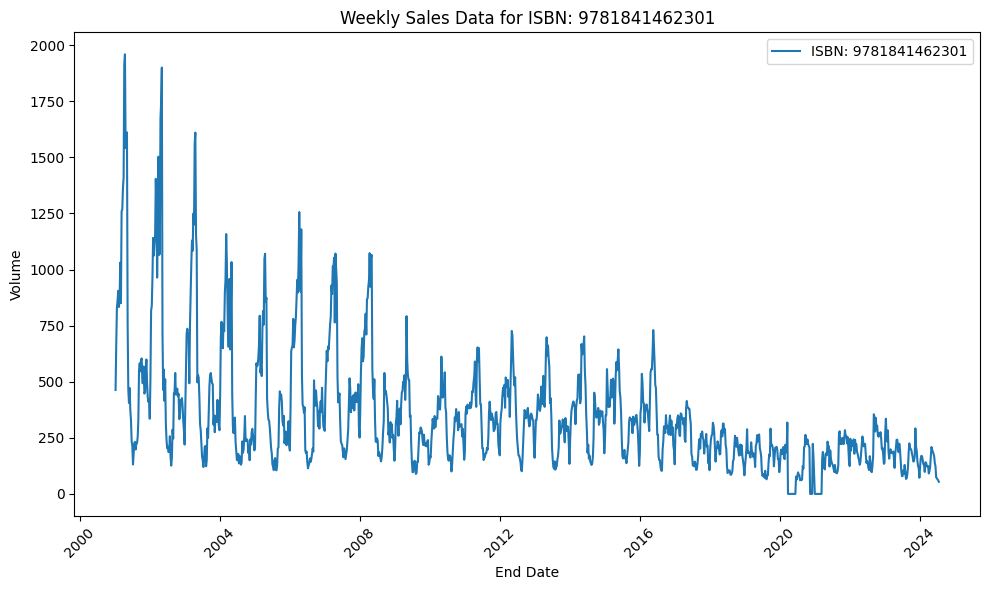

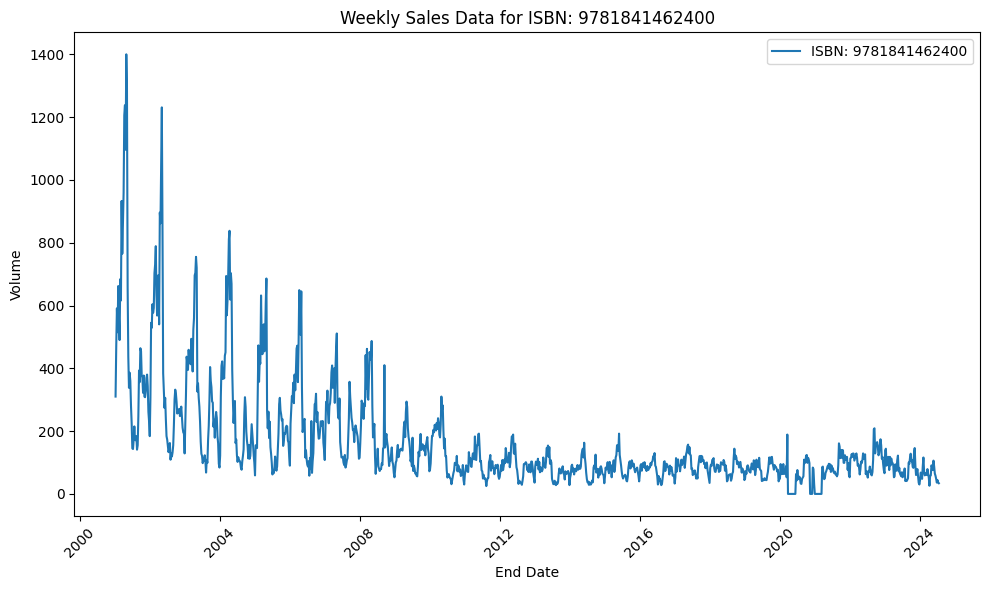

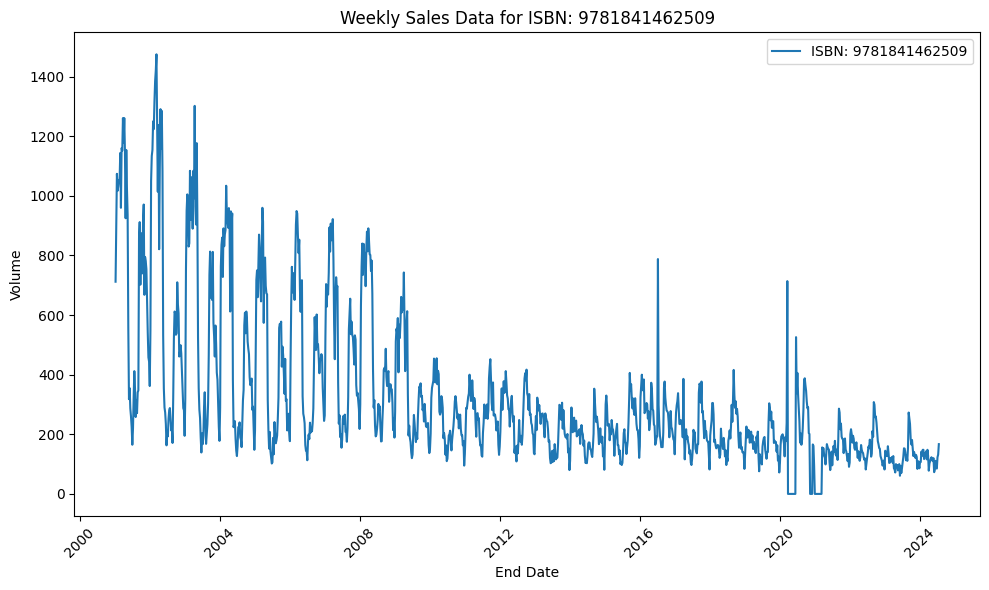

In [ ]:
# Loop through ISBNs with sales data beyond threshold date
for isbn in isbns_with_sales_data:
    # Filter data for the current ISBN
    isbn_data = df_resampled[df_resampled['ISBN'] == isbn]

    # Plot data: x = 'End Date', y = 'Volume'
    plt.figure(figsize=(10, 6))
    plt.plot(isbn_data['End Date'], isbn_data['Volume'], linestyle='-', label=f"ISBN: {isbn}")

    # Set labels and title for the plot
    plt.xlabel('End Date')
    plt.ylabel('Volume')
    plt.title(f'Weekly Sales Data for ISBN: {isbn}')

    # Why not looks nice
    plt.xticks(rotation=45)

    # Show legend
    plt.legend()

    # Display plot
    plt.tight_layout()
    plt.show()

For the majority of these books we are witnessing a substantial decrease in sales.

In [ ]:
isbn_data

ISBN   End Date                   Title     Author  Interval  \
325374  9781841462509 2001-01-06  KS2 Science Study Book  CGP Books  200101.0   
325375  9781841462509 2001-01-13  KS2 Science Study Book  CGP Books  200102.0   
325376  9781841462509 2001-01-20  KS2 Science Study Book  CGP Books  200103.0   
325377  9781841462509 2001-01-27  KS2 Science Study Book  CGP Books  200104.0   
325378  9781841462509 2001-02-03  KS2 Science Study Book  CGP Books  200105.0   
...               ...        ...                     ...        ...       ...   
326598  9781841462509 2024-06-22  KS2 Science Study Book  CGP Books  202425.0   
326599  9781841462509 2024-06-29  KS2 Science Study Book  CGP Books  202426.0   
326600  9781841462509 2024-07-06  KS2 Science Study Book  CGP Books  202427.0   
326601  9781841462509 2024-07-13  KS2 Science Study Book  CGP Books  202428.0   
326602  9781841462509 2024-07-20  KS2 Science Study Book  CGP Books  202429.0   

        Volume    Value     ASP  RRP    Binding  \
325374     712  2422.08  3.4018  6.5  Paperback   
325375     883  2995.18  3.3920  6.5  Paperback   
325376    1074  3657.35  3.4054  6.5  Paperback   
325377    1017  3458.98  3.4012  6.5  Paperback   
325378    1031  3505.47  3.4001  6.5  Paperback   
...        ...      ...     ...  ...        ...   
326598      88   573.45  6.5165  6.5  Paperback   
326599      85   551.01  6.4825  6.5  Paperback   
326600     123   801.72  6.5180  6.5  Paperback   
326601     132   848.64  6.4291  6.5  Paperback   
326602     167  1092.37  6.5411  6.5  Paperback   

                                          Imprint  \
325374  Coordination Group Publications Ltd (CGP)   
325375  Coordination Group Publications Ltd (CGP)   
325376  Coordination Group Publications Ltd (CGP)   
325377  Coordination Group Publications Ltd (CGP)   
325378  Coordination Group Publications Ltd (CGP)   
...                                           ...   
326598  Coordination Group Publications Ltd (CGP)   
326599  Coordination Group Publications Ltd (CGP)   
326600  Coordination Group Publications Ltd (CGP)   
326601  Coordination Group Publications Ltd (CGP)   
326602  Coordination Group Publications Ltd (CGP)   

                        Publisher Group  \
325374  Coordination Group Publications   
325375  Coordination Group Publications   
325376  Coordination Group Publications   
325377  Coordination Group Publications   
325378  Coordination Group Publications   
...                                 ...   
326598  Coordination Group Publications   
326599  Coordination Group Publications   
326600  Coordination Group Publications   
326601  Coordination Group Publications   
326602  Coordination Group Publications   

                                            Product Class Publication Date  \
325374  Y5.3 School Textbooks & Study Guides: Maths, S...       2018-01-03   
325375  Y5.3 School Textbooks & Study Guides: Maths, S...       2018-01-03   
325376  Y5.3 School Textbooks & Study Guides: Maths, S...       2018-01-03   
325377  Y5.3 School Textbooks & Study Guides: Maths, S...       2018-01-03   
325378  Y5.3 School Textbooks & Study Guides: Maths, S...       2018-01-03   
...                                                   ...              ...   
326598  Y5.3 School Textbooks & Study Guides: Maths, S...       2018-01-03   
326599  Y5.3 School Textbooks & Study Guides: Maths, S...       2018-01-03   
326600  Y5.3 School Textbooks & Study Guides: Maths, S...       2018-01-03   
326601  Y5.3 School Textbooks & Study Guides: Maths, S...       2018-01-03   
326602  Y5.3 School Textbooks & Study Guides: Maths, S...       2018-01-03   

       Country of Publication  
325374         United Kingdom  
325375         United Kingdom  
325376         United Kingdom  
325377         United Kingdom  
325378         United Kingdom  
...                       ...  
326598         United Kingdom  
326599         United Kingdom  
326600         United Kingdom  
326601         Unite

In [ ]:
def plot_sales(isbn):
    # Filter data for selected ISBN
    isbn_data = df_resampled[df_resampled['ISBN'] == isbn]

    # Get title for selected ISBN
    title = isbn_data['Title'].iloc[0] if not isbn_data.empty else "Unknown Title"

    # Convert the 'End Date' column to datetime (if not already done)
    end_dates = pd.to_datetime(isbn_data['End Date'])

    # Filter data for the two periods using the year extracted from 'End Date'
    period_2001_2012 = isbn_data[(end_dates.dt.year >= 2001) & (end_dates.dt.year <= 2012)]
    period_2013_2024 = isbn_data[(end_dates.dt.year >= 2013) & (end_dates.dt.year <= 2024)]

    # Calculate the average Volume for each period
    avg_volume_2001_2012 = period_2001_2012['Volume'].mean() if not period_2001_2012.empty else 0
    avg_volume_2013_2024 = period_2013_2024['Volume'].mean() if not period_2013_2024.empty else 0

    plt.figure(figsize=(10, 6))

    plt.bar('2001-2012', avg_volume_2001_2012, width=0.4, label='2001-2012', color='blue')
    plt.bar('2013-2024', avg_volume_2013_2024, width=0.4, label='2013-2024', color='orange')

    plt.xlabel('Year Period')
    plt.ylabel('Average Weekly Volume')
    plt.title(f'Comparison of Average Weekly Sales: {title} (ISBN: {isbn}) - 2001-2012 vs. 2013-2024')

    plt.legend()

    plt.tight_layout()
    plt.show()

# This creates a single selection dropdown menu!
dropdown_options = {
    f"{title} (ISBN: {isbn})": isbn
    for isbn, title in zip(
        isbns_with_sales_data,
        df_resampled[df_resampled['ISBN'].isin(isbns_with_sales_data)]['Title'].unique()
    )
}

isbn_dropdown = widgets.Dropdown(
    options=dropdown_options,
    description='Select ISBN:',
    style={'description_width': 'initial'},  # Adjust description width
    layout=widgets.Layout(width='500px'),  # Set width of the dropdown box
    disabled=False
)

# Display the widget and the plot based on the selected ISBN
widgets.interactive(plot_sales, isbn=isbn_dropdown)


interactive(children=(Dropdown(description='Select ISBN:', layout=Layout(width='500px'), options={'Man and Boy…

Comparing the first twelve the last twelve years for these books, the drop off is very apparanent.

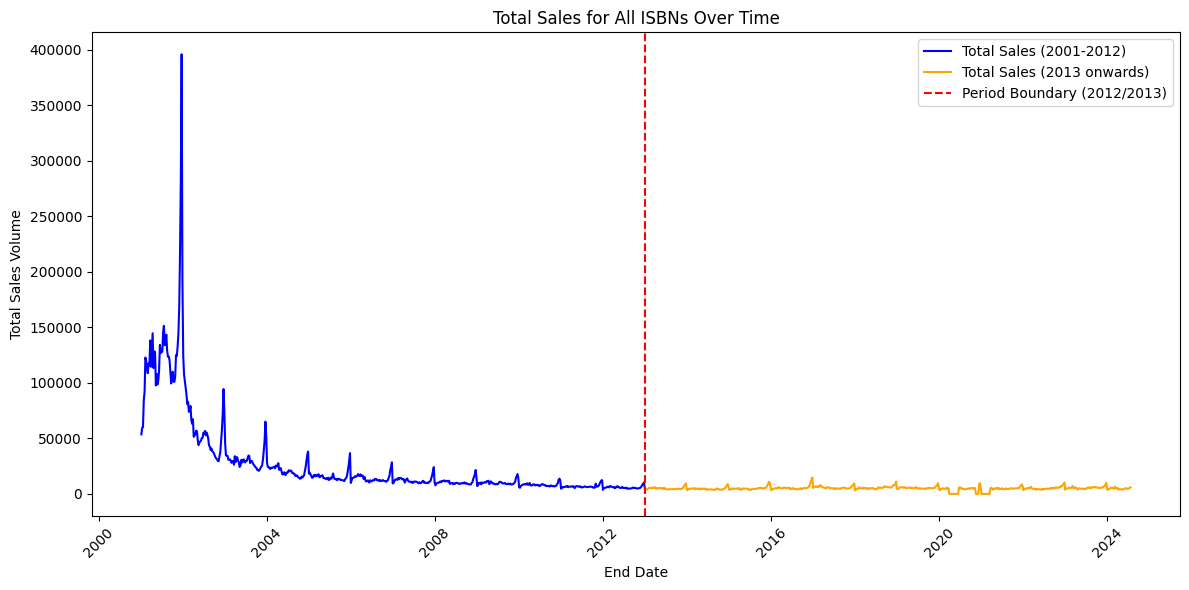

In [ ]:
df_resampled['Year'] = df_resampled['End Date'].dt.year

# Filter data to only include the ISBNS in the isbns_with_sales_data array
filtered_df = df_resampled[df_resampled['ISBN'].isin(isbns_with_sales_data)]

# Group by 'End Date' and sum the sales volume for all ISBNs at each time point
total_sales = filtered_df.groupby('End Date')['Volume'].sum()

plt.figure(figsize=(12, 6))

# Plot the data before 2013 (in blue)
before_2013 = total_sales[total_sales.index < pd.to_datetime('2013-01-01')]
plt.plot(before_2013.index, before_2013.values, linestyle='-', color='blue', label='Total Sales (2001-2012)')

# Plot the data from 2013 onwards (in orange)
from_2013_onwards = total_sales[total_sales.index >= pd.to_datetime('2013-01-01')]
plt.plot(from_2013_onwards.index, from_2013_onwards.values, linestyle='-', color='orange', label='Total Sales (2013 onwards)')

# Add a vertical line to separate the periods 2001–2012 and 2013–2024
plt.axvline(x=pd.to_datetime('2013-01-01'), color='red', linestyle='--', label='Period Boundary (2012/2013)')

# Labeling the plot
plt.xlabel('End Date')
plt.ylabel('Total Sales Volume')
plt.title('Total Sales for All ISBNs Over Time')

plt.xticks(rotation=45)

plt.legend()

plt.tight_layout()

plt.show()


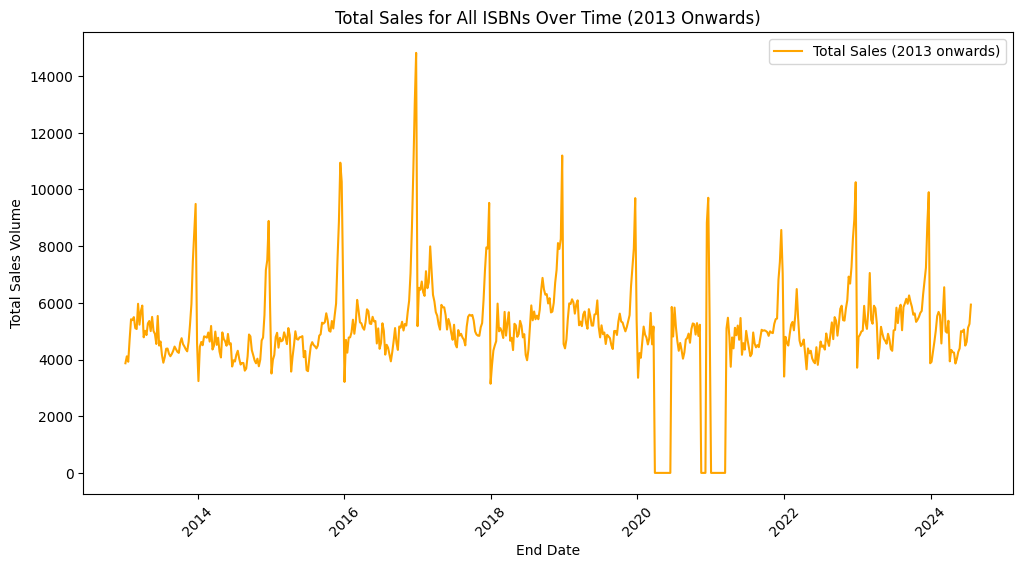

In [ ]:
# Filter the data to only include the ISBNS in the isbns_with_sales_data array
filtered_df = df_resampled[df_resampled['ISBN'].isin(isbns_with_sales_data)]

# Further filter the data to only include records from 2013 onwards
filtered_df_2013_onwards = filtered_df[filtered_df['Year'] >= 2013]

# Group by 'End Date' and sum the sales volume for all ISBNs from 2013 onwards
total_sales_2013_onwards = filtered_df_2013_onwards.groupby('End Date')['Volume'].sum()

plt.figure(figsize=(12, 6))

# Only from 2015 onwards
plt.plot(total_sales_2013_onwards.index, total_sales_2013_onwards.values, linestyle='-', color = 'orange', label='Total Sales (2013 onwards)')

plt.xlabel('End Date')
plt.ylabel('Total Sales Volume')
plt.title('Total Sales for All ISBNs Over Time (2013 Onwards)')

plt.xticks(rotation=45)

plt.legend()



There are still sales, with what looks like seasonality beyond 2013, but because the volume of sales are so much lower than 2001-2012, it must be shown on a separate scale.

-	Books look to undergo a high volume of sales around release, this could be due to marketing compaigns and anticipation from fans in the release build-up
- Seasonal peaks may arise around gift-giving periods such as Christmas
- The advent of e-books such as kindles, audiobooks, as well as alternate forms of entertainment becoming more popular (TV, streaming services) may have led to the decline of people buying books in print

Two books are selected for further analysis in this project:


**Very Hungry Caterpillar, The (ISBN: 9780241003008)**

**Alchemist, The (ISBN: 9780722532935)**

In [ ]:
df_alchemist = df_resampled[df_resampled['ISBN'] == '9780722532935']
df_caterpillar = df_resampled[df_resampled['ISBN'] == '9780241003008']

In [ ]:
df_alchemist

ISBN   End Date           Title         Author  Interval  \
232404  9780722532935 2001-01-06  Alchemist, The  Coelho, Paulo  200101.0   
232405  9780722532935 2001-01-13  Alchemist, The  Coelho, Paulo  200102.0   
232406  9780722532935 2001-01-20  Alchemist, The  Coelho, Paulo  200103.0   
232407  9780722532935 2001-01-27  Alchemist, The  Coelho, Paulo  200104.0   
232408  9780722532935 2001-02-03  Alchemist, The  Coelho, Paulo  200105.0   
...               ...        ...             ...            ...       ...   
233628  9780722532935 2024-06-22  Alchemist, The  Coelho, Paulo  202425.0   
233629  9780722532935 2024-06-29  Alchemist, The  Coelho, Paulo  202426.0   
233630  9780722532935 2024-07-06  Alchemist, The  Coelho, Paulo  202427.0   
233631  9780722532935 2024-07-13  Alchemist, The  Coelho, Paulo  202428.0   
233632  9780722532935 2024-07-20  Alchemist, The  Coelho, Paulo  202429.0   

        Volume     Value     ASP   RRP    Binding   Imprint  \
232404    1601  11019.60  6.8829  9.99  Paperback  Thorsons   
232405    2038  14113.40  6.9251  9.99  Paperback  Thorsons   
232406    2173  15096.85  6.9475  9.99  Paperback  Thorsons   
232407    2200  15313.49  6.9607  9.99  Paperback  Thorsons   
232408    1742  12100.25  6.9462  9.99  Paperback  Thorsons   
...        ...       ...     ...   ...        ...       ...   
233628     590   5182.65  8.7842  9.99  Paperback  Thorsons   
233629     627   5530.58  8.8207  9.99  Paperback  Thorsons   
233630     672   5947.09  8.8498  9.99  Paperback  Thorsons   
233631     510   4638.63  9.0954  9.99  Paperback  Thorsons   
233632     408   3782.61  9.2711  9.99  Paperback  Thorsons   

          Publisher Group                    Product Class Publication Date  \
232404  HarperCollins Grp  F1.1 General & Literary Fiction       1995-11-13   
232405  HarperCollins Grp  F1.1 General & Literary Fiction       1995-11-13   
232406  HarperCollins Grp  F1.1 General & Literary Fiction       1995-11-13   
232407  HarperCollins Grp  F1.1 General & Literary Fiction       1995-11-13   
232408  HarperCollins Grp  F1.1 General & Literary Fiction       1995-11-13   
...                   ...                              ...              ...   
233628  HarperCollins Grp  F1.1 General & Literary Fiction       1995-11-13   
233629  HarperCollins Grp  F1.1 General & Literary Fiction       1995-11-13   
233630  HarperCollins Grp  F1.1 General & Literary Fiction       1995-11-13   
233631  HarperCollins Grp  F1.1 General & Literary Fiction       1995-11-13   
233632  HarperCollins Grp  F1.1 General & Literary Fiction       1995-11-13   

       Country of Publication  Year  
232404         United Kingdom  2001  
232405         United Kingdom  2001  
232406         United Kingdom  2001  
232407         United Kingdom  2001  
232408         United Kingdom  2001  
...                       ...   ...  
233628         United Kingdom  2024  
233629         United Kingdom  2024  
233630         United Kingdom  2024  
233631         United Kingdom  2024  
233632         United Kingdom  2024  

[1229 rows x 16 columns]

In [ ]:
df_caterpillar

ISBN   End Date                         Title       Author  \
93726  9780241003008 2001-01-06  Very Hungry Caterpillar, The  Carle, Eric   
93727  9780241003008 2001-01-13  Very Hungry Caterpillar, The  Carle, Eric   
93728  9780241003008 2001-01-20  Very Hungry Caterpillar, The  Carle, Eric   
93729  9780241003008 2001-01-27  Very Hungry Caterpillar, The  Carle, Eric   
93730  9780241003008 2001-02-03  Very Hungry Caterpillar, The  Carle, Eric   
...              ...        ...                           ...          ...   
94950  9780241003008 2024-06-22  Very Hungry Caterpillar, The  Carle, Eric   
94951  9780241003008 2024-06-29  Very Hungry Caterpillar, The  Carle, Eric   
94952  9780241003008 2024-07-06  Very Hungry Caterpillar, The  Carle, Eric   
94953  9780241003008 2024-07-13  Very Hungry Caterpillar, The  Carle, Eric   
94954  9780241003008 2024-07-20  Very Hungry Caterpillar, The  Carle, Eric   

       Interval  Volume     Value     ASP   RRP   Binding       Imprint  \
93726  200101.0     402   1984.48  4.9365  7.99  Hardback  Puffin Books   
93727  200102.0     361   1766.42  4.8931  7.99  Hardback  Puffin Books   
93728  200103.0     517   2549.43  4.9312  7.99  Hardback  Puffin Books   
93729  200104.0     426   2091.52  4.9097  7.99  Hardback  Puffin Books   
93730  200105.0     580   2848.20  4.9107  7.99  Hardback  Puffin Books   
...         ...     ...       ...     ...   ...       ...           ...   
94950  202425.0    1985   9126.36  4.5977  7.99  Hardback  Puffin Books   
94951  202426.0    2097   9517.24  4.5385  7.99  Hardback  Puffin Books   
94952  202427.0    2448  10974.10  4.4829  7.99  Hardback  Puffin Books   
94953  202428.0    2482  11441.03  4.6096  7.99  Hardback  Puffin Books   
94954  202429.0    2574  11507.46  4.4707  7.99  Hardback  Puffin Books   

      Publisher Group       Product Class Publication Date  \
93726     Penguin Grp  Y1.3 Picture Books       1994-09-29   
93727     Penguin Grp  Y1.3 Picture Books       1994-09-29   
93728     Penguin Grp  Y1.3 Picture Books       1994-09-29   
93729     Penguin Grp  Y1.3 Picture Books       1994-09-29   
93730     Penguin Grp  Y1.3 Picture Books       1994-09-29   
...               ...                 ...              ...   
94950     Penguin Grp  Y1.3 Picture Books       1994-09-29   
94951     Penguin Grp  Y1.3 Picture Books       1994-09-29   
94952     Penguin Grp  Y1.3 Picture Books       1994-09-29   
94953     Penguin Grp  Y1.3 Picture Books       1994-09-29   
94954     Penguin Grp  Y1.3 Picture Books       1994-09-29   

      Country of Publication  Year  
93726         United Kingdom  2001  
93727         United Kingdom  2001  
93728         United Kingdom  2001  
93729         United Kingdom  2001  
93730         United Kingdom  2001  
...                      ...   ...  
94950         United Kingdom  2024  
94951         United Kingdom  2024  
94952         United Kingdom  2024  
94953         United Kingdom  2024  
94954         United Kingdom  2024  

[1229 rows x 16 columns]

In [ ]:
# only keep data from 2012-01-01 onwards for df_caterpillar and df_alchemist

# Filter dataframes for dates after 2012-01-01
df_alchemist = df_alchemist[df_alchemist['End Date'] >= '2012-01-01']
df_caterpillar = df_caterpillar[df_caterpillar['End Date'] >= '2012-01-01']

# Classical Time Series Techniques

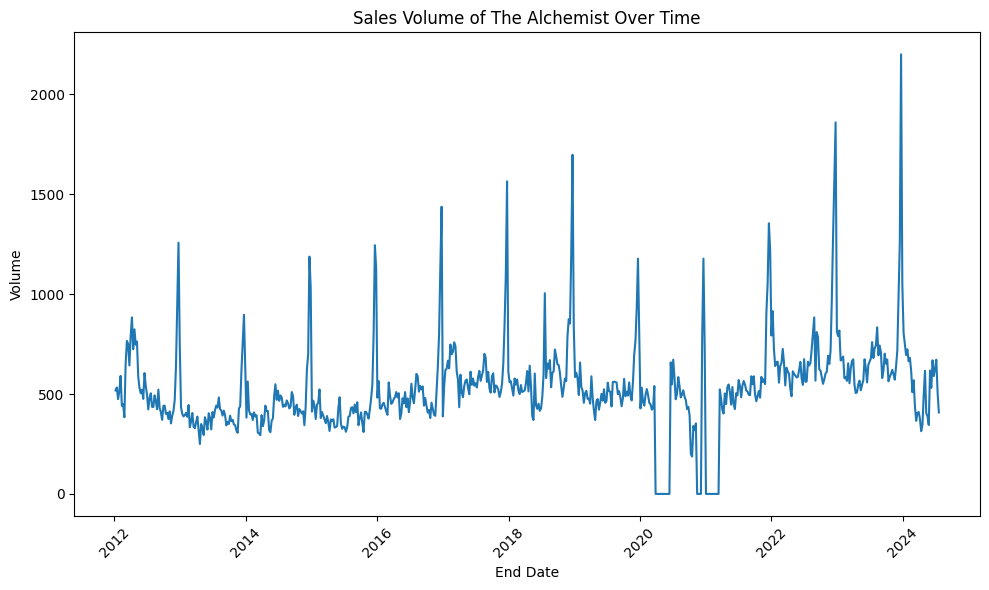

In [ ]:
# Plot df_alchemist against end date
plt.figure(figsize=(10, 6))
plt.plot(df_alchemist['End Date'], df_alchemist['Volume'], linestyle='-')
plt.xlabel('End Date')
plt.ylabel('Volume')
plt.title('Sales Volume of The Alchemist Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

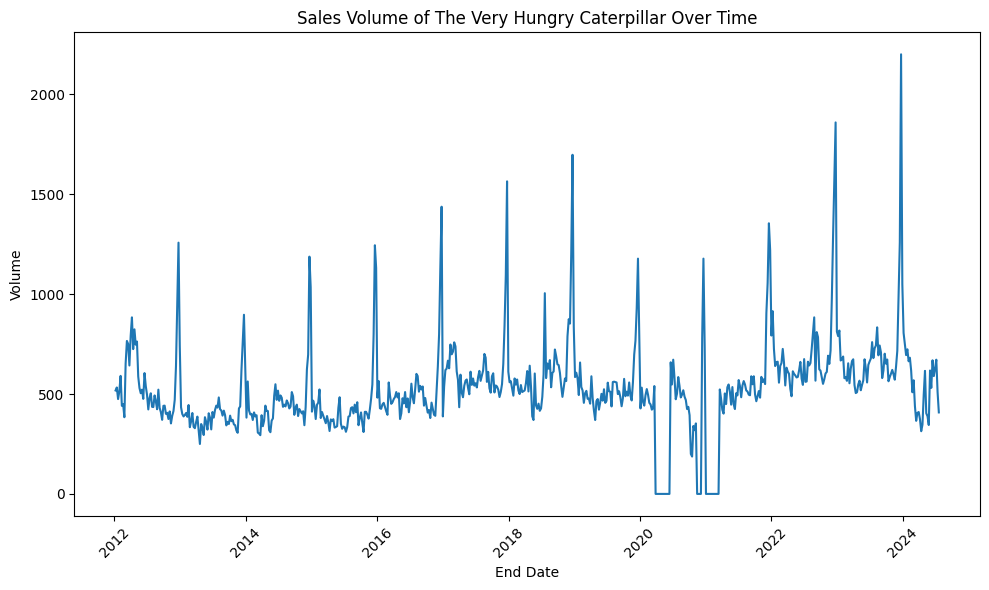

In [ ]:
# Plot df_caterpillar against end date
plt.figure(figsize=(10, 6))
plt.plot(df_caterpillar['End Date'], df_alchemist['Volume'], linestyle='-')
plt.xlabel('End Date')
plt.ylabel('Volume')
plt.title('Sales Volume of The Very Hungry Caterpillar Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# DON'T RUN THIS!

# Decompose the data for "The Alchemist"
df_alchemist.set_index('End Date', inplace=True)

# Decompose the sales volume using both additive and multiplicative decomposition
decomposition_additive = seasonal_decompose(df_alchemist['Volume'], model='additive', period=52)
decomposition_multiplicative = seasonal_decompose(df_alchemist['Volume'], model='multiplicative', period=52)

# Plot the decomposition for "The Alchemist"
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

decomposition_additive.plot(ax=axes[0])
axes[0].set_title('Additive Decomposition for The Alchemist')

decomposition_multiplicative.plot(ax=axes[1])
axes[1].set_title('Multiplicative Decomposition for The Alchemist')

plt.tight_layout()
plt.show()

# Decompose the data for "The Very Hungry Caterpillar"
df_caterpillar.set_index('End Date', inplace=True)

# Decompose the sales volume using both additive and multiplicative decomposition
decomposition_additive_caterpillar = seasonal_decompose(df_caterpillar['Volume'], model='additive', period=52)
decomposition_multiplicative_caterpillar = seasonal_decompose(df_caterpillar['Volume'], model='multiplicative', period=52)

# Plot the decomposition for "The Very Hungry Caterpillar"
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

decomposition_additive_caterpillar.plot(ax=axes[0])
axes[0].set_title('Additive Decomposition for The Very Hungry Caterpillar')

decomposition_multiplicative_caterpillar.plot(ax=axes[1])
axes[1].set_title('Multiplicative Decomposition for The Very Hungry Caterpillar')

plt.tight_layout()
plt.show()


ValueError: Multiplicative seasonality is not appropriate for zero and negative values

Zero values, so lets use additive only.

<Figure size 1000x800 with 0 Axes>

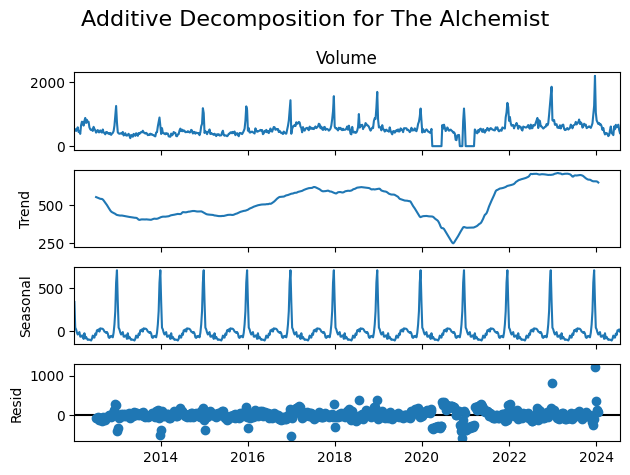

<Figure size 1000x800 with 0 Axes>

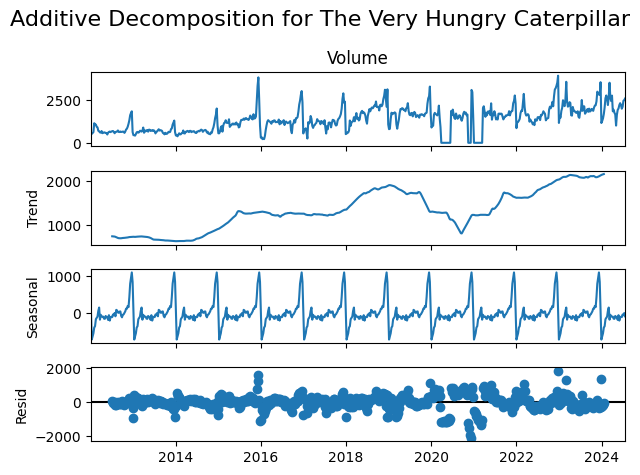

In [ ]:
# Decompose the data for "The Alchemist" (Additive only)
df_alchemist.set_index('End Date', inplace=True)

# Additive decomposition for The Alchemist
decomposition_additive = seasonal_decompose(df_alchemist['Volume'], model='additive', period=52)

# Plot the decomposition for "The Alchemist"
plt.figure(figsize=(10, 8))
decomposition_additive.plot()
plt.suptitle('Additive Decomposition for The Alchemist', fontsize=16)
plt.tight_layout()
plt.show()

# Decompose the data for "The Very Hungry Caterpillar" (Additive only)
df_caterpillar.set_index('End Date', inplace=True)

# Additive decomposition for The Very Hungry Caterpillar
decomposition_additive_caterpillar = seasonal_decompose(df_caterpillar['Volume'], model='additive', period=52)

# Plot the decomposition for "The Very Hungry Caterpillar"
plt.figure(figsize=(10, 8))
decomposition_additive_caterpillar.plot()
plt.suptitle('Additive Decomposition for The Very Hungry Caterpillar', fontsize=16)
plt.tight_layout()
plt.show()

The Alchemist: trend is increasing apart from nnotable dip around 2020-2021 (presumably due to the Covid-19 pandemic). Clear annual seasonal component. Residuals seem to be danom. Additive decomposition looks to be the right choice because seasonal fluctuations are pretty regular and similar in amplitude

The Very Hungry Caterpillar: Also a clear seasonal component, although ththe negative values here are slightly confusing. Similar drop off around 2020-2021. Residuals also seem random however they are more pronounced than The Alchemist. This could suggest there are more complex relationships in the time series trend here that further analysis may uncover.

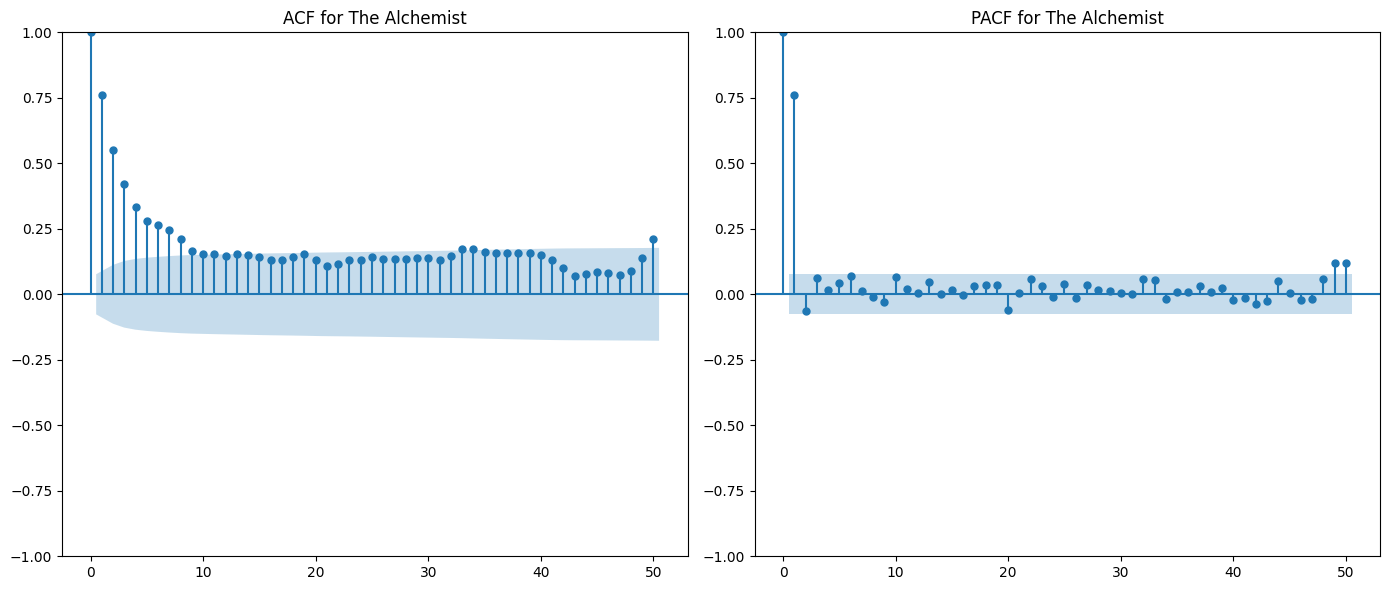

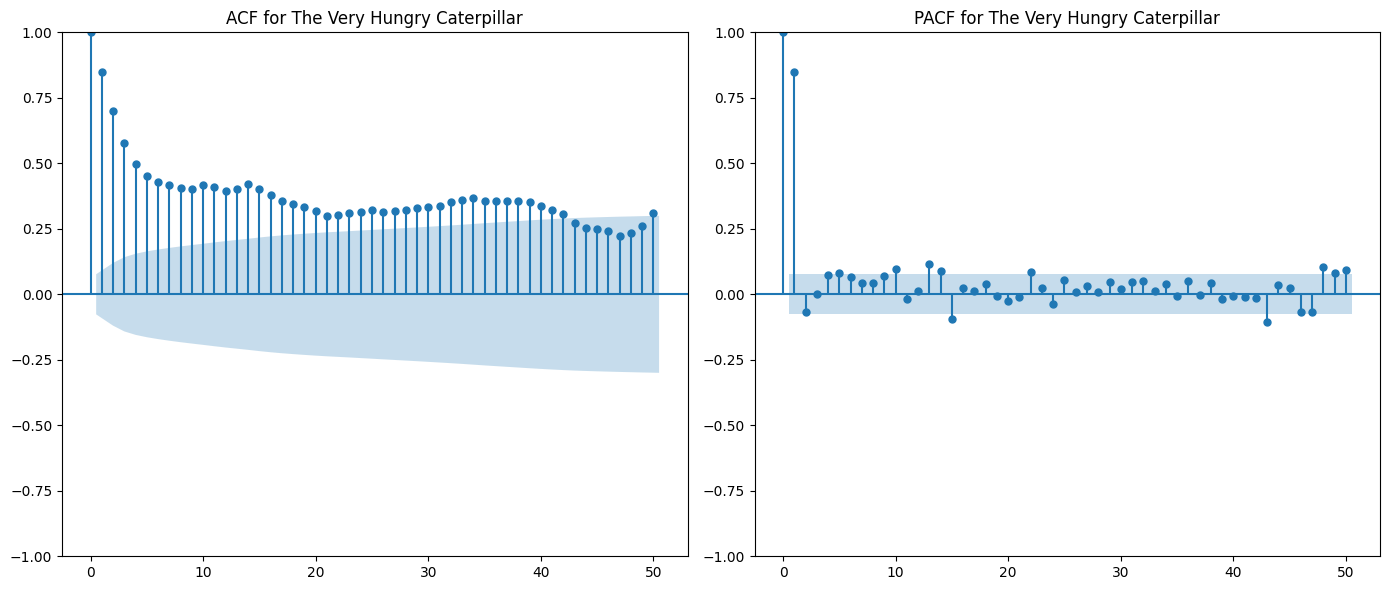

In [ ]:
# Plot ACF and PACF for "The Alchemist"
plt.figure(figsize=(14, 6))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(df_alchemist['Volume'], lags=50, ax=plt.gca())
plt.title('ACF for The Alchemist')

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(df_alchemist['Volume'], lags=50, ax=plt.gca())
plt.title('PACF for The Alchemist')

plt.tight_layout()
plt.show()

# Plot ACF and PACF for "The Very Hungry Caterpillar"
plt.figure(figsize=(14, 6))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(df_caterpillar['Volume'], lags=50, ax=plt.gca())
plt.title('ACF for The Very Hungry Caterpillar')

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(df_caterpillar['Volume'], lags=50, ax=plt.gca())
plt.title('PACF for The Very Hungry Caterpillar')

plt.tight_layout()
plt.show()


The autocorrelation function (ACF)) result for the alchemist show positive correlations with the first few lags, with then the 52nd lag also showing significance showing a yearly seasonality. Partial autocorrelation (PACF) shows a strong peak at lag 1; a first-order autogressive (AR(1)) process may be a good fit. The ACF for the Very Hungry Caterpillar shows even more long-term dependeencies, with fluctuating peaks at roughly twelve week intervals. Simlarly, AR(1) looks to be a good fit.

In [ ]:
# Function to perform ADF test and return the result
def adf_test(series, title):
    print(f"ADF Test for {title}:")
    adf_result = adfuller(series)
    print(f"Test Statistic: {adf_result[0]}")
    print(f"p-value: {adf_result[1]}")
    print(f"Critical Values: {adf_result[4]}")
    if adf_result[1] < 0.05:
        print("Result: The series is stationary")
    else:
        print("Result: The series is not stationary")
    print("\n")

# Check for stationarity in "The Alchemist"

adf_test(df_alchemist['Volume'], "The Alchemist")

# Check for stationarity in "The Very Hungry Caterpillar"

adf_test(df_caterpillar['Volume'], "The Very Hungry Caterpillar")


ADF Test for The Alchemist:
Test Statistic: -8.295945282786748
p-value: 4.139950997174928e-13
Critical Values: {'1%': -3.440419374623044, '5%': -2.865983079837035, '10%': -2.5691361169972526}
Result: The series is stationary


ADF Test for The Very Hungry Caterpillar:
Test Statistic: -3.0605225214506335
p-value: 0.029616021527175906
Critical Values: {'1%': -3.4406089407081604, '5%': -2.866066583404541, '10%': -2.5691806079101562}
Result: The series is stationary




The Alchemist: P-value is significantly less than 0.05, and the test statistic (-8.30) is much smaller (more negative) than the critical values at the 1%, 5%, and 10% levels, so we can very confidently say that the series is stationary

The Very Hungry Caterpillar: The p-value is just below 0.05 but not by much, but the test statistic (-3.06) is more negative than the critical value at the 5% level (-2.87), but not as negative as the critical value at the 1% level (-3.44). This indicates that we can reject the null hypothesis with a 5% confidence level, suggesting that the series is likely to be stationary.


Best model parameters for The Alchemist:
                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  623
Model:             SARIMAX(1, 0, 2)x(0, 1, [1], 52)   Log Likelihood               -3499.311
Date:                              Fri, 07 Feb 2025   AIC                           7008.622
Time:                                      17:06:25   BIC                           7030.359
Sample:                                  01-07-2012   HQIC                          7017.103
                                       - 12-09-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9353      0.014     66.181      0.000   

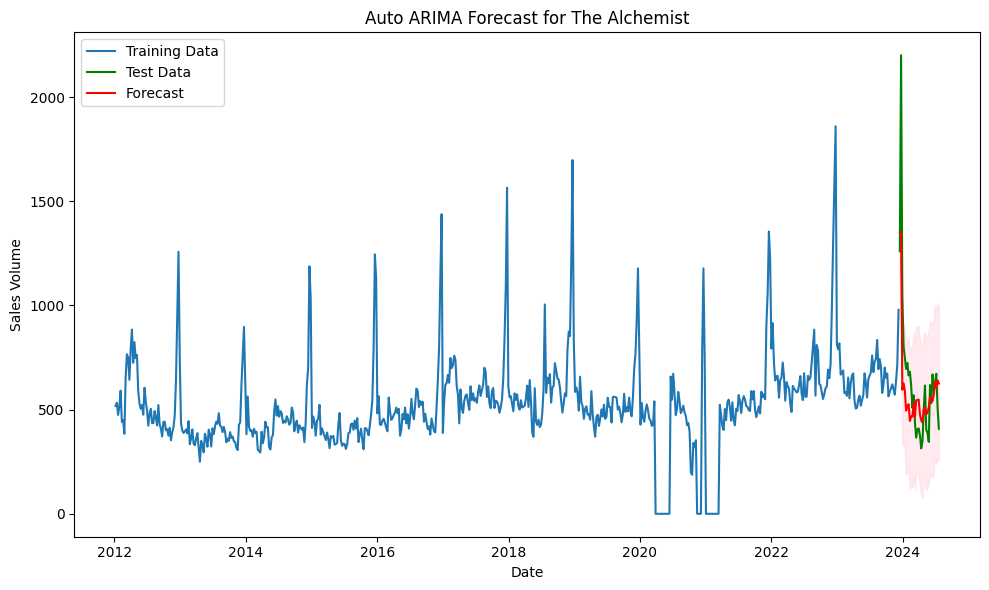

Mean Squared Error for The Alchemist: 45119.30
Mean Absolute Error for The Alchemist: 145.51
Mean Absolute Percentage Error for The Alchemist: 23.09%
Best model parameters for The Very Hungry Caterpillar:
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  623
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 52)   Log Likelihood               -4156.854
Date:                            Fri, 07 Feb 2025   AIC                           8323.707
Time:                                    17:24:48   BIC                           8345.444
Sample:                                01-07-2012   HQIC                          8332.188
                                     - 12-09-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025 

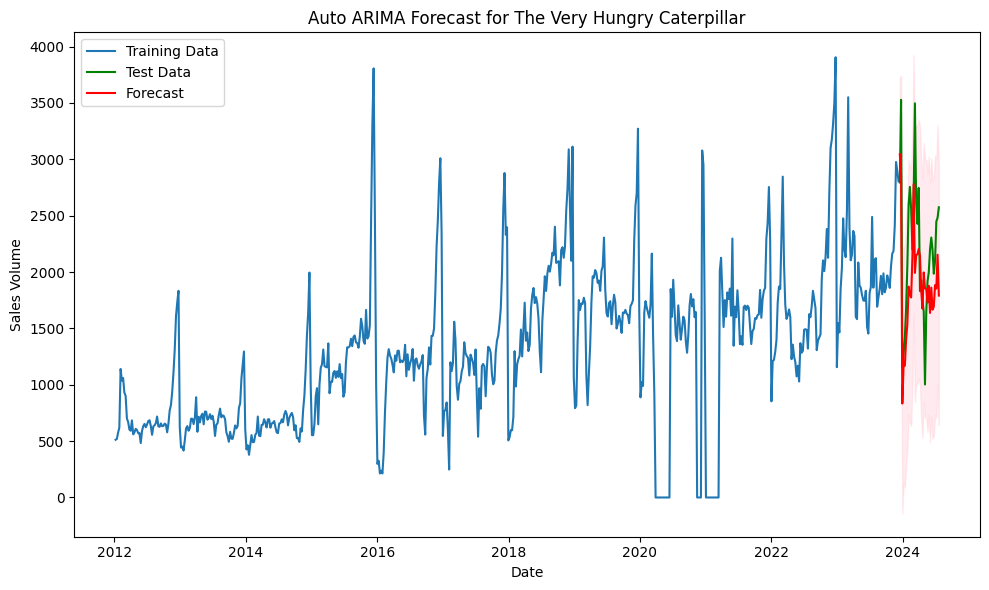

Mean Squared Error for The Very Hungry Caterpillar: 280986.32
Mean Absolute Error for The Very Hungry Caterpillar: 429.37
Mean Absolute Percentage Error for The Very Hungry Caterpillar: 19.92%


In [ ]:
import matplotlib.pyplot as plt
import pmdarima as pm
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Function to perform Auto ARIMA and plot forecast, as well as print the best parameters
def auto_arima_forecast_with_params(df, title, forecast_horizon=32):
    # Split data into training and test sets
    train = df.iloc[:-forecast_horizon]
    test = df.iloc[-forecast_horizon:]

    # Perform Auto ARIMA on training data
    model = pm.auto_arima(
        train['Volume'],
        seasonal=True,
        m=52,  # Weekly data with yearly seasonality (52 weeks)
        stepwise=True,
        suppress_warnings=True,
        max_p=3, max_q=3, max_P=2, max_Q=2, d=0, D=1
    )

    # Display the best model parameters
    print(f"Best model parameters for {title}:")
    print(model.summary())

    # Forecast for the next 'forecast_horizon' weeks
    forecast, conf_int = model.predict(n_periods=forecast_horizon, return_conf_int=True)

    # Plot the forecast
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train['Volume'], label='Training Data')
    plt.plot(test.index, test['Volume'], label='Test Data', color='green')
    plt.plot(test.index, forecast, label='Forecast', color='red')
    plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
    plt.title(f'Auto ARIMA Forecast for {title}')
    plt.xlabel('Date')
    plt.ylabel('Sales Volume')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Calculate and print forecast evaluation metrics
    mse = mean_squared_error(test['Volume'], forecast)
    mae = mean_absolute_error(test['Volume'], forecast)
    mape = mean_absolute_percentage_error(test['Volume'], forecast)

    print(f'Mean Squared Error for {title}: {mse:.2f}')
    print(f'Mean Absolute Error for {title}: {mae:.2f}')
    print(f'Mean Absolute Percentage Error for {title}: {mape:.2%}')

# Apply Auto ARIMA for "The Alchemist"
auto_arima_forecast_with_params(df_alchemist, "The Alchemist")

# Apply Auto ARIMA for "The Very Hungry Caterpillar"
auto_arima_forecast_with_params(df_caterpillar, "The Very Hungry Caterpillar")


Best model parameters for The Alchemist:
                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  623
Model:             SARIMAX(1, 0, 2)x(0, 1, [1], 52)   Log Likelihood               -3499.311
Date:                              Fri, 07 Feb 2025   AIC                           7008.622
Time:                                      09:59:11   BIC                           7030.359
Sample:                                  01-07-2012   HQIC                          7017.103
                                       - 12-09-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9353      0.014     66.181      0.000   

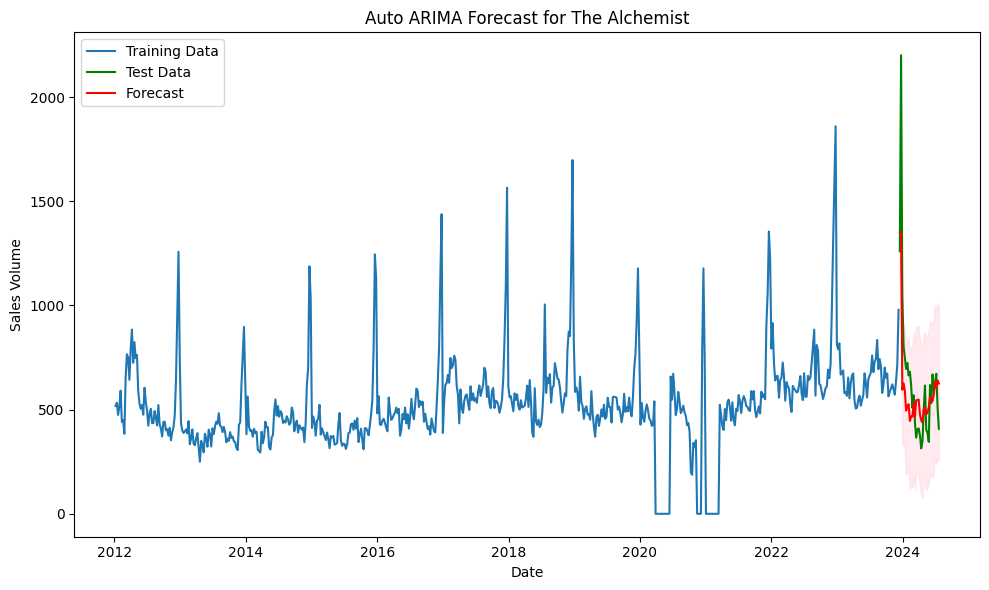

Mean Squared Error for The Alchemist: 45119.30
Best model parameters for The Very Hungry Caterpillar:
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  623
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 52)   Log Likelihood               -4156.854
Date:                            Fri, 07 Feb 2025   AIC                           8323.707
Time:                                    10:17:16   BIC                           8345.444
Sample:                                01-07-2012   HQIC                          8332.188
                                     - 12-09-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   

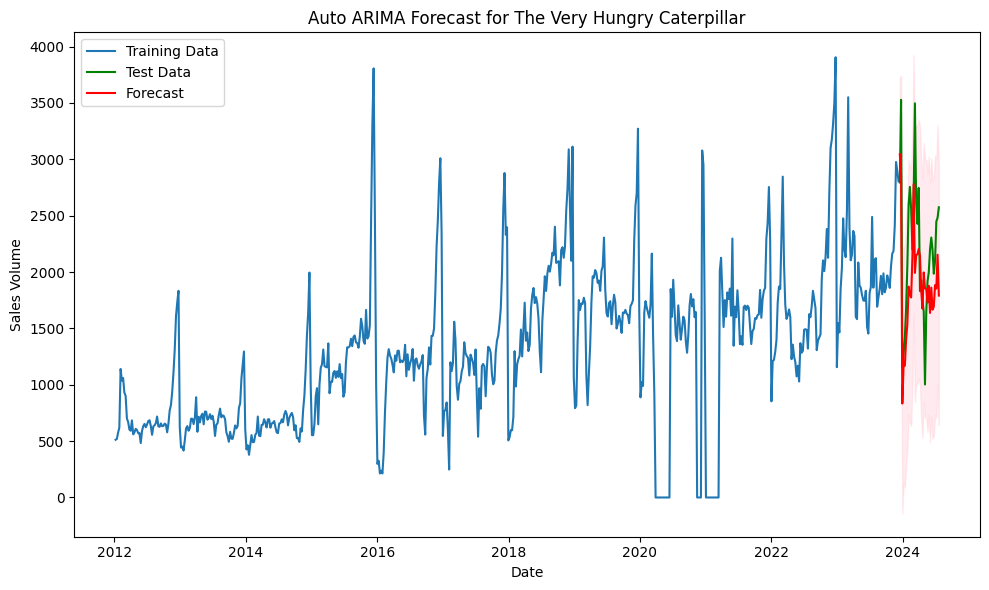

Mean Squared Error for The Very Hungry Caterpillar: 280986.32


In [ ]:
# Function to perform Auto ARIMA and plot forecast, as well as print the best parameters
def auto_arima_forecast_with_params(df, title, forecast_horizon=32):
    # Split data into training and test sets
    train = df.iloc[:-forecast_horizon]
    test = df.iloc[-forecast_horizon:]

    # Perform Auto ARIMA on training data
    model = pm.auto_arima(train['Volume'],
                          seasonal=True,
                          m=52,  # Weekly data with yearly seasonality (52 weeks)
                          stepwise=True,
                          suppress_warnings=True,
                          max_p=3, max_q=3, max_P=2, max_Q=2, d=0, D=1)

    # Display the best model parameters
    print(f"Best model parameters for {title}:")
    print(model.summary())

    # Forecast for the next 'forecast_horizon' weeks
    forecast, conf_int = model.predict(n_periods=forecast_horizon,
                                       return_conf_int=True)

    # Plot the forecast
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train['Volume'], label='Training Data')
    plt.plot(test.index, test['Volume'], label='Test Data', color='green')
    plt.plot(test.index, forecast, label='Forecast', color='red')
    plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
    plt.title(f'Auto ARIMA Forecast for {title}')
    plt.xlabel('Date')
    plt.ylabel('Sales Volume')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Calculate and return Mean Squared Error for the forecast
    mse = mean_squared_error(test['Volume'], forecast)
    print(f'Mean Squared Error for {title}: {mse:.2f}')

# Apply Auto ARIMA for "The Alchemist"
auto_arima_forecast_with_params(df_alchemist, "The Alchemist")

# Apply Auto ARIMA for "The Very Hungry Caterpillar"
auto_arima_forecast_with_params(df_caterpillar, "The Very Hungry Caterpillar")


The Alchemist:
SARIMAX Model: SARIMAX(1, 0, 2)x(0, 1, [1], 52)

AR(1) coefficient: 0.9353: the first lag of the series has a strong positive relationship with the current value
MA(1) coefficient: -0.3224: there is some negative short-term correction in the model's error terms.
MA(2) coefficient: -0.1255: another negative correction term for the second lag.
Seasonal MA(S)(52) coefficient: -0.4990, indicating strong seasonal effects on sales on an annual basis, with a negative relationship between this lag and the sales volume.
Sigma² (Variance): 1.199e+04, which provides a measure of the model's residual variance.


<br>


The Log Likelihood value of -3499.311 and AIC of 7008.622 suggest that the model fits the data well, but more models should be evaluated to see if this model actually is optimal.

The Ljung-Box test confirms no autocorrelation at lag 1; p-value of 0.94 (> than 0.05), residuals dont show autocorrelation.

The Jarque-Bera test with a p-value close to 0 suggests non-normality in the residuals, possibly skewed with excess kurtosis.

Definition of kurtosis from google: "Kurtosis is a measure of the tailedness of a distribution. Tailedness is how often outliers occur. Excess kurtosis is the tailedness of a distribution relative to a normal distribution"

Heteroskedasticity: With a p-value of 0.00, this indicates some level of heteroskedasticity (non-constant variance in the residuals).

From google: "Heteroskedasticity can have serious consequences for regression analysis and hypothesis testing."


<br>
<br>
<br>


The Very Hungry Caterpillar:
SARIMAX Model: SARIMAX(1, 0, 0)x(2, 1, 0, 52)

AR(1) coefficient: 0.8049: first lage of the series has a strong positive relationship with the current value, just slightly less than in the case of The Alchemist
Seasonal AR(52) coefficient: -0.5353: negative seasonal effect that peaks at yearly intervals
Seasonal AR(104) coefficient: -0.2031: another negative (but weaker) seasonal effect every two years
Sigma² (Variance): 1.205e+05: order of ten higher than The Alchemist model, meaning that there's greater variance in this data (whicih matches with the decomposition that we did earlier)

<br>

The Log Likelihood of -4156.854 and AIC of 8323.707 show the model's performance, and these values are also useful for comparison with alternative models.
Ljung-Box p-value of 0.93 indicates that there is no significant autocorrelation in the residuals.
The Jarque-Bera test with a p-value close to 0 indicates that the residuals are not normally distributed, with a skew and high kurtosis indicating some irregularities in the residuals.
Heteroskedasticity: With a p-value of 0.00, similar to "The Alchemist," this indicates that the error variance is non-constant, and we could further consider transformations or heteroskedasticity-robust standard errors.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)


Best model parameters for The Alchemist:
                                      SARIMAX Results                                       
Dep. Variable:                               Volume   No. Observations:                  655
Model:             SARIMAX(1, 0, 2)x(0, 1, [1], 52)   Log Likelihood               -3387.908
Date:                              Fri, 07 Feb 2025   AIC                           6785.817
Time:                                      10:18:37   BIC                           6807.348
Sample:                                  01-07-2012   HQIC                          6794.232
                                       - 07-20-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9376      0.016     59.677      0.000   

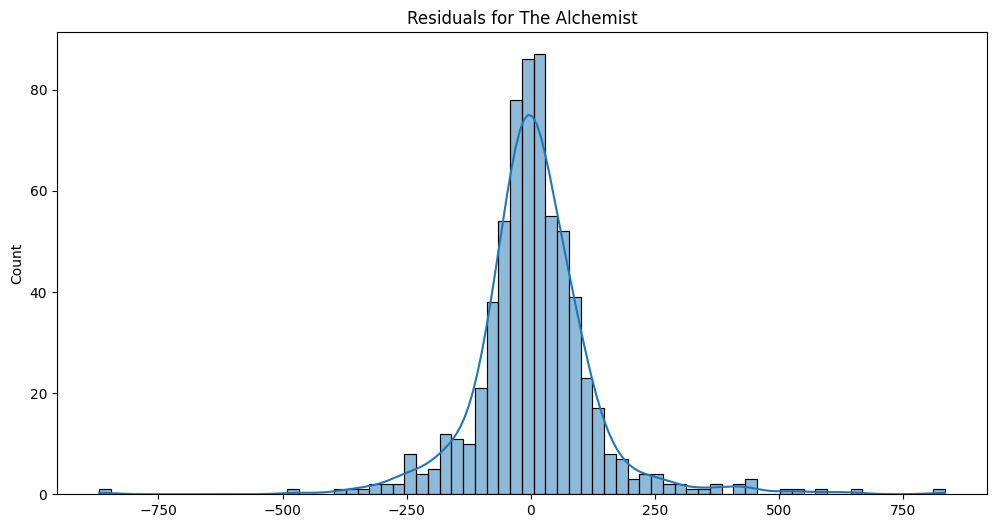

<Figure size 1200x600 with 0 Axes>

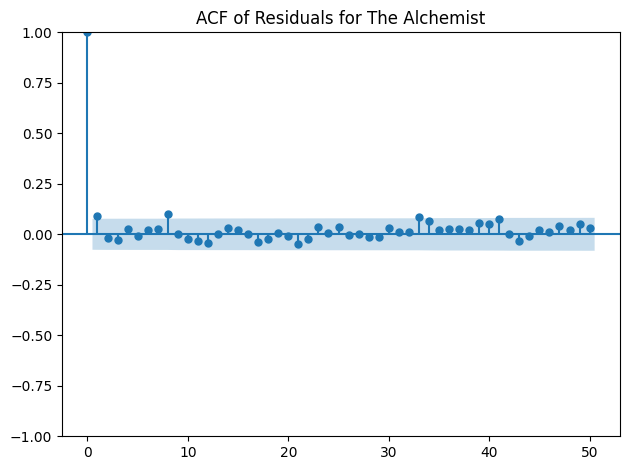

Jarque-Bera Test for The Alchemist: SignificanceResult(statistic=2670.072314141065, pvalue=0.0)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)



Best model parameters for The Very Hungry Caterpillar:
                                     SARIMAX Results                                      
Dep. Variable:                             Volume   No. Observations:                  655
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 52)   Log Likelihood               -3677.374
Date:                            Fri, 07 Feb 2025   AIC                           7362.747
Time:                                    10:19:08   BIC                           7379.590
Sample:                                01-07-2012   HQIC                          7369.357
                                     - 07-20-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8228      0.018     44.787      0.000    

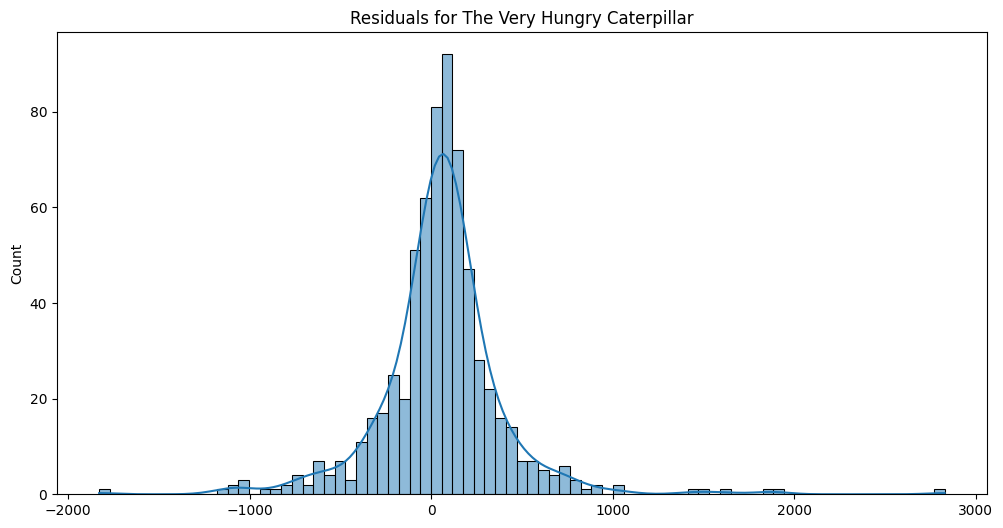

<Figure size 1200x600 with 0 Axes>

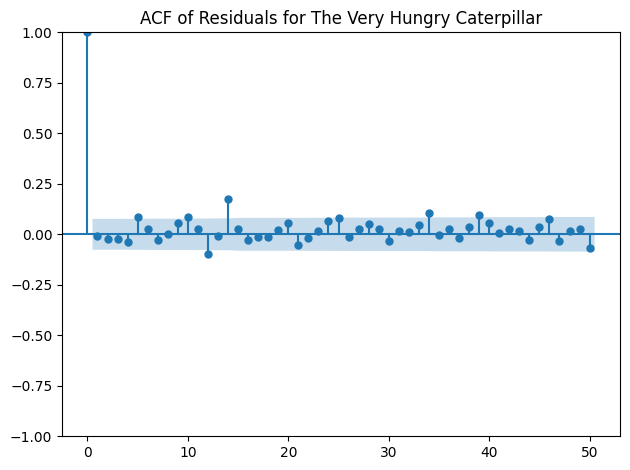

Jarque-Bera Test for The Very Hungry Caterpillar: SignificanceResult(statistic=3304.9317594784156, pvalue=0.0)


In [ ]:
# Fit the SARIMAX model for "The Alchemist" using the best parameters
model_alchemist = sm.tsa.SARIMAX(df_alchemist['Volume'],
                                 order=(1, 0, 2),  # AR(1), I(0), MA(2)
                                 seasonal_order=(0, 1, 1, 52),  # Seasonal order (SAR(0), SD(1), SMA(1), period=52)
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
results_alchemist = model_alchemist.fit()

# Print the summary of the best parameters for The Alchemist
print("Best model parameters for The Alchemist:")
print(results_alchemist.summary())

# Plot residuals for The Alchemist
residuals_alchemist = results_alchemist.resid
plt.figure(figsize=(12, 6))
sns.histplot(residuals_alchemist, kde=True)
plt.title("Residuals for The Alchemist")
plt.show()

# ACF for residuals for The Alchemist
plt.figure(figsize=(12, 6))
plot_acf(residuals_alchemist, lags=50, title="ACF of Residuals for The Alchemist")
plt.tight_layout()
plt.show()

# Perform Jarque-Bera test for normality for The Alchemist
jb_alchemist = stats.jarque_bera(residuals_alchemist)
print(f"Jarque-Bera Test for The Alchemist: {jb_alchemist}")

# Fit the SARIMAX model for "The Very Hungry Caterpillar" using the best parameters
model_caterpillar = sm.tsa.SARIMAX(df_caterpillar['Volume'],
                                   order=(1, 0, 0),  # AR(1), I(0), MA(0)
                                   seasonal_order=(2, 1, 0, 52),  # Seasonal order (SAR(2), SD(1), SMA(0), period=52)
                                   enforce_stationarity=False,
                                   enforce_invertibility=False)
results_caterpillar = model_caterpillar.fit()

# Print the summary of the best parameters for The Very Hungry Caterpillar
print("\nBest model parameters for The Very Hungry Caterpillar:")
print(results_caterpillar.summary())

# Plot residuals for The Very Hungry Caterpillar
residuals_caterpillar = results_caterpillar.resid
plt.figure(figsize=(12, 6))
sns.histplot(residuals_caterpillar, kde=True)
plt.title("Residuals for The Very Hungry Caterpillar")
plt.show()

# ACF for residuals for The Very Hungry Caterpillar
plt.figure(figsize=(12, 6))
plot_acf(residuals_caterpillar, lags=50, title="ACF of Residuals for The Very Hungry Caterpillar")
plt.tight_layout()
plt.show()

# Perform Jarque-Bera test for normality for The Very Hungry Caterpillar
jb_caterpillar = stats.jarque_bera(residuals_caterpillar)
print(f"Jarque-Bera Test for The Very Hungry Caterpillar: {jb_caterpillar}")


From the plot of residuals (Figure 7), we can ascertain that the distribution of residuals in both cases is fairly normal, with the centre near zero. There are outliers present in both cases, with the spread of residuals for The Very Hungry Caterpillar being notably larger, so there may be some seasonal fluctions or trends not fully accounted for tby the models. <br> <br>


The residuals’ ACF plots in both cases indicate a largeaurocorrelation at lag = 0 but then minimal significance beyond that, suggesting that the residuals are infact random and uncorrelated (after trends and seasonality have been extracted).

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)



Error Metrics for The Alchemist:
Mean Squared Error (MSE): 45412.62
Root Mean Squared Error (RMSE): 213.10
Mean Absolute Error (MAE): 145.23
Mean Absolute Percentage Error (MAPE): 22.89%
Forecast and Test Data for The Alchemist:
                 Date  Actual     Forecast  Lower Confidence Interval  \
2023-12-16 2023-12-16    1260  1353.669450                1134.942785   
2023-12-23 2023-12-23    2201  1335.366627                1079.983785   
2023-12-30 2023-12-30    1050   595.415793                 322.895744   
2024-01-06 2024-01-06     806   625.968008                 339.104272   
2024-01-13 2024-01-13     748   589.830828                 290.820810   
2024-01-20 2024-01-20     695   494.386883                 185.003032   
2024-01-27 2024-01-27     724   515.515868                 197.214196   
2024-02-03 2024-02-03     664   524.466430                 198.459563   
2024-02-10 2024-02-10     682   444.752849                 112.061499   
2024-02-17 2024-02-17     618   465.5736

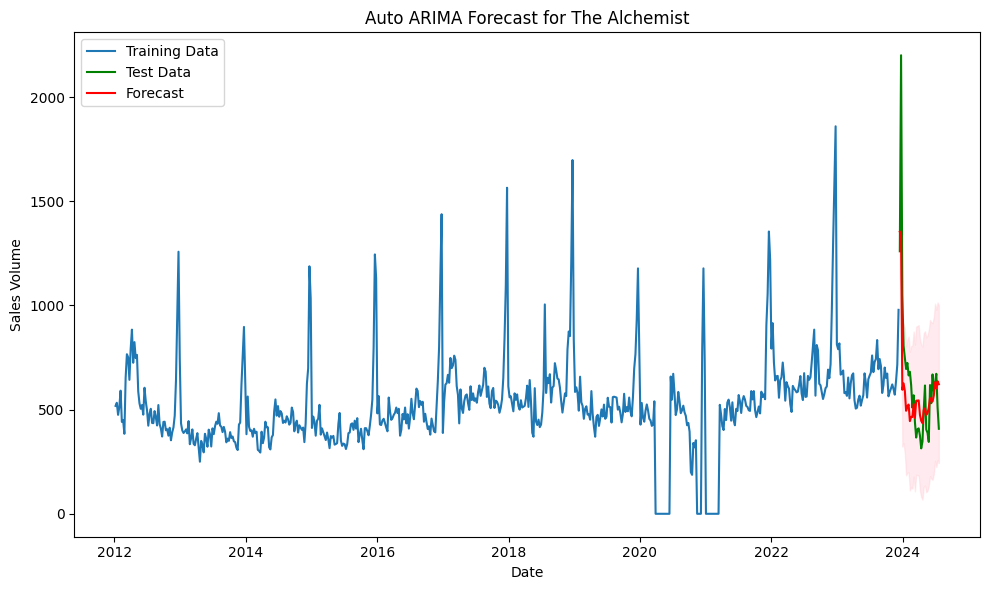

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)



Error Metrics for The Very Hungry Caterpillar:
Mean Squared Error (MSE): 466515.63
Root Mean Squared Error (RMSE): 683.02
Mean Absolute Error (MAE): 578.51
Mean Absolute Percentage Error (MAPE): 26.23%
Forecast and Test Data for The Very Hungry Caterpillar:
                 Date  Actual     Forecast  Lower Confidence Interval  \
2023-12-16 2023-12-16    2794  2989.720835                2239.870170   
2023-12-23 2023-12-23    3527  2719.907522                1746.260124   
2023-12-30 2023-12-30    1151   697.408350                -403.765098   
2024-01-06 2024-01-06    1273  1001.893417                -178.822649   
2024-01-13 2024-01-13    1421   983.072958                -249.242720   
2024-01-20 2024-01-20    1679  1186.610804                 -79.886343   
2024-01-27 2024-01-27    2062  1308.995774                  19.574520   
2024-02-03 2024-02-03    2595  1620.259198                 315.345201   
2024-02-10 2024-02-10    2755  1552.682180                 237.245899   
2024-02-17 

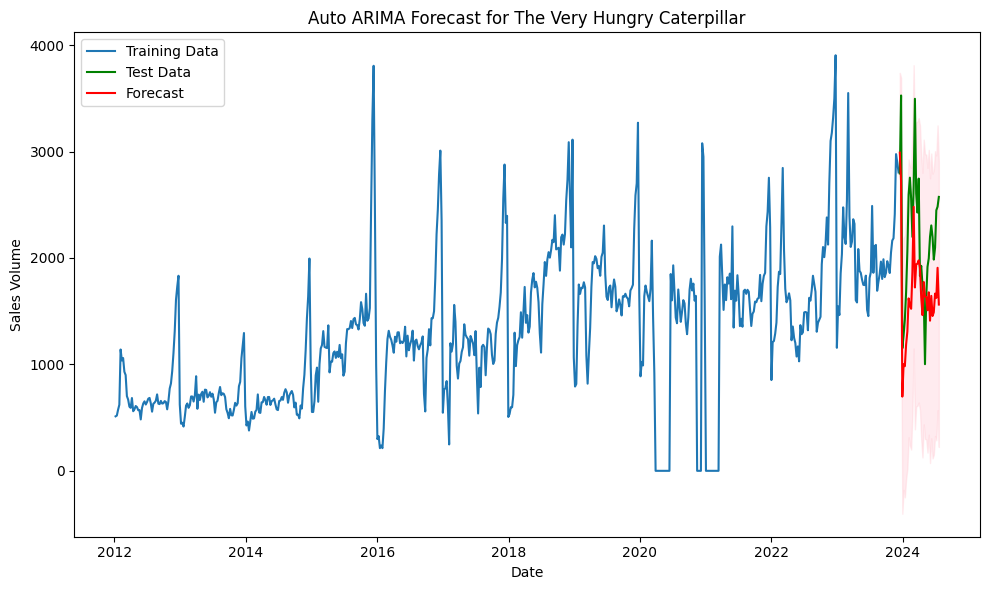

2023-12-16    2989.720835
2023-12-23    2719.907522
2023-12-30     697.408350
2024-01-06    1001.893417
2024-01-13     983.072958
2024-01-20    1186.610804
2024-01-27    1308.995774
2024-02-03    1620.259198
2024-02-10    1552.682180
2024-02-17    1522.566366
2024-02-24    1866.915896
2024-03-02    2480.734162
2024-03-09    1723.143200
2024-03-16    1939.403135
2024-03-23    1946.289246
2024-03-30    1977.747783
2024-04-06    1908.887904
2024-04-13    1631.280798
2024-04-20    1463.142090
2024-04-27    1774.457997
2024-05-04    1637.384715
2024-05-11    1634.117030
2024-05-18    1508.914601
2024-05-25    1677.584929
2024-06-01    1410.962204
2024-06-08    1643.946755
2024-06-15    1454.718699
2024-06-22    1489.932882
2024-06-29    1665.539733
2024-07-06    1624.968840
2024-07-13    1907.825908
2024-07-20    1562.422427
Freq: W-SAT, Name: predicted_mean, dtype: float64

In [ ]:
# Function to forecast using the best models for both books and calculate error metrics
def forecast_best_model(df, model_params, title, forecast_horizon=32):
    # Split data into training and test sets
    train = df.iloc[:-forecast_horizon]
    test = df.iloc[-forecast_horizon:]  # Keep the test data for comparison

    # Use SARIMAX with the best model parameters from the auto ARIMA
    model = SARIMAX(train['Volume'],
                    order=(model_params['p'], model_params['d'], model_params['q']),
                    seasonal_order=(model_params['P'], model_params['D'], model_params['Q'], model_params['m']),
                    enforce_stationarity=False, enforce_invertibility=False)

    # Fit the model
    model_fitted = model.fit(disp=False)

    # Forecast the next 'forecast_horizon' weeks
    forecast, conf_int = model_fitted.get_forecast(steps=forecast_horizon).predicted_mean, model_fitted.get_forecast(steps=forecast_horizon).conf_int()

    # Calculate error metrics
    mse = mean_squared_error(test['Volume'], forecast)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test['Volume'], forecast)

    # Calculate MAPE (Mean Absolute Percentage Error)
    mape = np.mean(np.abs((test['Volume'] - forecast) / test['Volume'])) * 100

    # Print out the metrics
    print(f"\nError Metrics for {title}:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

    # Plot the forecast and confidence intervals
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train['Volume'], label='Training Data')
    plt.plot(test.index, test['Volume'], label='Test Data', color='green')
    plt.plot(test.index, forecast, label='Forecast', color='red')
    plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)

    # Print the forecast and test data for all forecasted points
    print(f"Forecast and Test Data for {title}:")
    forecast_df = pd.DataFrame({
        'Date': test.index,
        'Actual': test['Volume'],
        'Forecast': forecast,
        'Lower Confidence Interval': conf_int.iloc[:, 0],
        'Upper Confidence Interval': conf_int.iloc[:, 1]
    })
    print(forecast_df)

    # Add titles and labels
    plt.title(f'Auto ARIMA Forecast for {title}')
    plt.xlabel('Date')
    plt.ylabel('Sales Volume')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return forecast

# Model parameters for "The Alchemist" based on previous results
model_params_alchemist = {
    'p': 1, 'd': 0, 'q': 2,
    'P': 0, 'D': 1, 'Q': 1,
    'm': 52
}

# Model parameters for "The Very Hungry Caterpillar" based on previous results
model_params_caterpillar = {
    'p': 1, 'd': 0, 'q': 0,
    'P': 2, 'D': 1, 'Q': 0,
    'm': 52
}

# Apply the function to both books
forecast_best_model(df_alchemist, model_params_alchemist, "The Alchemist")
forecast_best_model(df_caterpillar, model_params_caterpillar, "The Very Hungry Caterpillar")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)



Error Metrics for The Alchemist:
Mean Squared Error (MSE): 45412.62
Root Mean Squared Error (RMSE): 213.10
Mean Absolute Error (MAE): 145.23
Mean Absolute Percentage Error (MAPE): 22.89%
Forecast and Test Data for The Alchemist:
                 Date  Actual     Forecast  Lower Confidence Interval  \
2023-12-16 2023-12-16    1260  1353.669450                1134.942785   
2023-12-23 2023-12-23    2201  1335.366627                1079.983785   
2023-12-30 2023-12-30    1050   595.415793                 322.895744   
2024-01-06 2024-01-06     806   625.968008                 339.104272   
2024-01-13 2024-01-13     748   589.830828                 290.820810   
2024-01-20 2024-01-20     695   494.386883                 185.003032   
2024-01-27 2024-01-27     724   515.515868                 197.214196   
2024-02-03 2024-02-03     664   524.466430                 198.459563   
2024-02-10 2024-02-10     682   444.752849                 112.061499   
2024-02-17 2024-02-17     618   465.5736

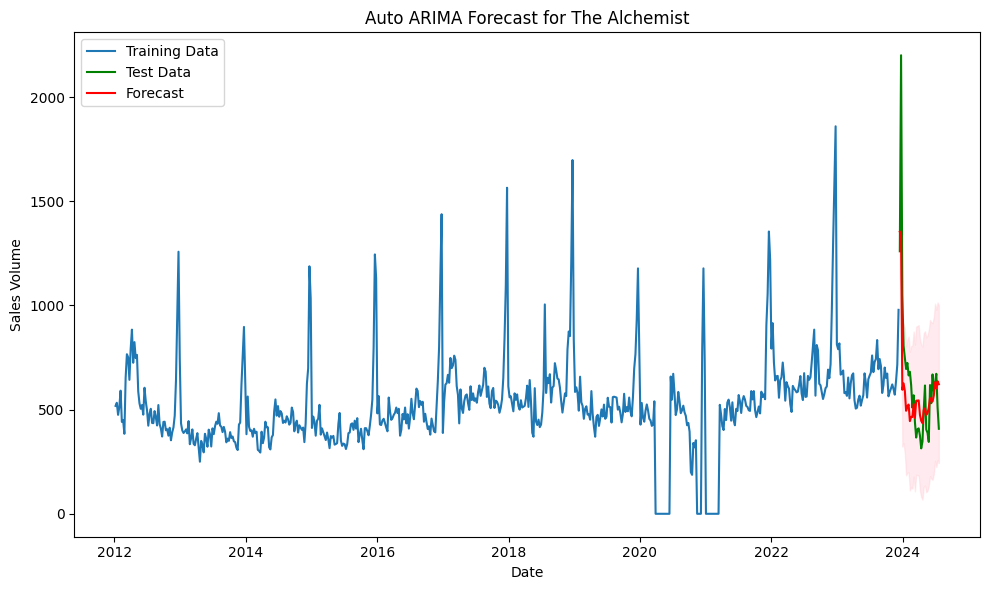

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)



Error Metrics for The Very Hungry Caterpillar:
Mean Squared Error (MSE): 466515.63
Root Mean Squared Error (RMSE): 683.02
Mean Absolute Error (MAE): 578.51
Mean Absolute Percentage Error (MAPE): 26.23%
Forecast and Test Data for The Very Hungry Caterpillar:
                 Date  Actual     Forecast  Lower Confidence Interval  \
2023-12-16 2023-12-16    2794  2989.720835                2239.870170   
2023-12-23 2023-12-23    3527  2719.907522                1746.260124   
2023-12-30 2023-12-30    1151   697.408350                -403.765098   
2024-01-06 2024-01-06    1273  1001.893417                -178.822649   
2024-01-13 2024-01-13    1421   983.072958                -249.242720   
2024-01-20 2024-01-20    1679  1186.610804                 -79.886343   
2024-01-27 2024-01-27    2062  1308.995774                  19.574520   
2024-02-03 2024-02-03    2595  1620.259198                 315.345201   
2024-02-10 2024-02-10    2755  1552.682180                 237.245899   
2024-02-17 

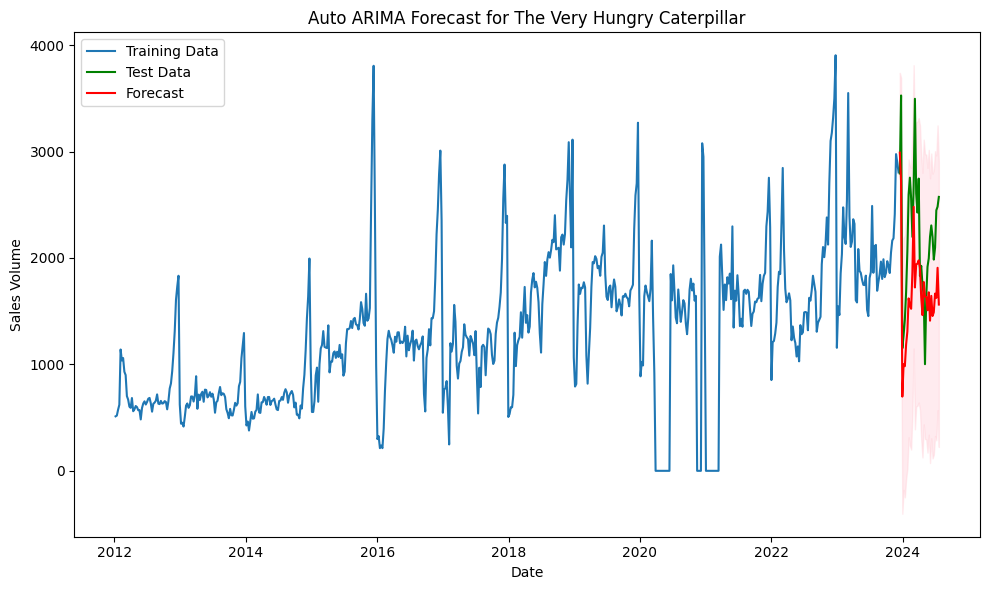

In [ ]:
forecast_sarima_a = forecast_best_model(df_alchemist, model_params_alchemist, "The Alchemist")
forecast_sarima_c = forecast_best_model(df_caterpillar, model_params_caterpillar, "The Very Hungry Caterpillar")

**Alchemist**

MSE (Mean Squared Error): 45,412.62
RMSE (Root Mean Squared Error): 213.10
MAE (Mean Absolute Error): 145.23
MAPE (Mean Absolute Percentage Error): 22.89%
From the error metrics, we can see that the model performs relatively well, but there is still room for improvement, especially when compared to the actual values. The relatively high MAPE indicates that the forecast errors as a percentage of the actual values are notable, meaning there is some deviation in the prediction.

**Caterpillar**
MSE (Mean Squared Error): 466,515.63
RMSE (Root Mean Squared Error): 683.02
MAE (Mean Absolute Error): 578.51
MAPE (Mean Absolute Percentage Error): 26.23%
For this book, the model's performance isn't as good as with "The Alchemist." The higher MAPE and RMSE suggest that there is more deviation in the forecasted values. This could indicate that the model for this book might not capture all of the seasonality or other underlying patterns effectively.

Forecast vs Actuals:
Looking at the confidence intervals in both graphs (the shaded areas), we can observe the following:

For The Alchemist, the forecast is relatively close to the test data, but there are some discrepancies in the peak sales period towards the end of the forecast horizon. The forecasted values for "The Alchemist" remain within the confidence intervals, though the forecast begins to diverge as time progresses.
For The Very Hungry Caterpillar, while the forecast generally fits well with the test data, especially for periods where sales volumes are steady, there are larger discrepancies for certain weeks, particularly around peaks in the test data. This can be seen in the increasing distance between the forecast and actual sales.
Conclusion:
Both models provide useful forecasts, but they show varying degrees of accuracy. The Alchemist's model has better overall accuracy, as indicated by the lower MAPE and other error metrics, while the caterpillar model appears to have larger error metrics, likely due to some inherent volatility or seasonality that the model struggles to capture fully.



# Machine Learning Prep

In [ ]:
df_alchemist

ISBN           Title         Author  Interval  Volume  \
End Date                                                                     
2012-01-07  9780722532935  Alchemist, The  Coelho, Paulo  201201.0     518   
2012-01-14  9780722532935  Alchemist, The  Coelho, Paulo  201202.0     533   
2012-01-21  9780722532935  Alchemist, The  Coelho, Paulo  201203.0     475   
2012-01-28  9780722532935  Alchemist, The  Coelho, Paulo  201204.0     514   
2012-02-04  9780722532935  Alchemist, The  Coelho, Paulo  201205.0     591   
...                   ...             ...            ...       ...     ...   
2024-06-22  9780722532935  Alchemist, The  Coelho, Paulo  202425.0     590   
2024-06-29  9780722532935  Alchemist, The  Coelho, Paulo  202426.0     627   
2024-07-06  9780722532935  Alchemist, The  Coelho, Paulo  202427.0     672   
2024-07-13  9780722532935  Alchemist, The  Coelho, Paulo  202428.0     510   
2024-07-20  9780722532935  Alchemist, The  Coelho, Paulo  202429.0     408   

              Value     ASP   RRP    Binding   Imprint    Publisher Group  \
End Date                                                                    
2012-01-07  3601.76  6.9532  9.99  Paperback  Thorsons  HarperCollins Grp   
2012-01-14  3610.12  6.7732  9.99  Paperback  Thorsons  HarperCollins Grp   
2012-01-21  3105.62  6.5381  9.99  Paperback  Thorsons  HarperCollins Grp   
2012-01-28  3431.29  6.6757  9.99  Paperback  Thorsons  HarperCollins Grp   
2012-02-04  3929.22  6.6484  9.99  Paperback  Thorsons  HarperCollins Grp   
...             ...     ...   ...        ...       ...                ...   
2024-06-22  5182.65  8.7842  9.99  Paperback  Thorsons  HarperCollins Grp   
2024-06-29  5530.58  8.8207  9.99  Paperback  Thorsons  HarperCollins Grp   
2024-07-06  5947.09  8.8498  9.99  Paperback  Thorsons  HarperCollins Grp   
2024-07-13  4638.63  9.0954  9.99  Paperback  Thorsons  HarperCollins Grp   
2024-07-20  3782.61  9.2711  9.99  Paperback  Thorsons  HarperCollins Grp   

                              Product Class Publication Date  \
End Date                                                       
2012-01-07  F1.1 General & Literary Fiction       1995-11-13   
2012-01-14  F1.1 General & Literary Fiction       1995-11-13   
2012-01-21  F1.1 General & Literary Fiction       1995-11-13   
2012-01-28  F1.1 General & Literary Fiction       1995-11-13   
2012-02-04  F1.1 General & Literary Fiction       1995-11-13   
...                                     ...              ...   
2024-06-22  F1.1 General & Literary Fiction       1995-11-13   
2024-06-29  F1.1 General & Literary Fiction       1995-11-13   
2024-07-06  F1.1 General & Literary Fiction       1995-11-13   
2024-07-13  F1.1 General & Literary Fiction       1995-11-13   
2024-07-20  F1.1 General & Literary Fiction       1995-11-13   

           Country of Publication  Year  
End Date                                 
2012-01-07         United Kingdom  2012  
2012-01-14         United Kingdom  2012  
2012-01-21         United Kingdom  2012  
2012-01-28         United Kingdom  2012  
2012-02-04         United Kingdom  2012  
...                           ...   ...  
2024-06-22         United Kingdom  2024  
2024-06-29         United Kingdom  2024  
2024-07-06         United Kingdom  2024  
2024-07-13         United Kingdom  2024  
2024-07-20         United Kingdom  2024  

[655 rows x 15 columns]

In [ ]:
df_caterpillar

ISBN                         Title       Author  \
End Date                                                               
2012-01-07  9780241003008  Very Hungry Caterpillar, The  Carle, Eric   
2012-01-14  9780241003008  Very Hungry Caterpillar, The  Carle, Eric   
2012-01-21  9780241003008  Very Hungry Caterpillar, The  Carle, Eric   
2012-01-28  9780241003008  Very Hungry Caterpillar, The  Carle, Eric   
2012-02-04  9780241003008  Very Hungry Caterpillar, The  Carle, Eric   
...                   ...                           ...          ...   
2024-06-22  9780241003008  Very Hungry Caterpillar, The  Carle, Eric   
2024-06-29  9780241003008  Very Hungry Caterpillar, The  Carle, Eric   
2024-07-06  9780241003008  Very Hungry Caterpillar, The  Carle, Eric   
2024-07-13  9780241003008  Very Hungry Caterpillar, The  Carle, Eric   
2024-07-20  9780241003008  Very Hungry Caterpillar, The  Carle, Eric   

            Interval  Volume     Value     ASP   RRP   Binding       Imprint  \
End Date                                                                       
2012-01-07  201201.0     512   2522.13  4.9260  7.99  Hardback  Puffin Books   
2012-01-14  201202.0     519   2473.31  4.7655  7.99  Hardback  Puffin Books   
2012-01-21  201203.0     574   2757.83  4.8046  7.99  Hardback  Puffin Books   
2012-01-28  201204.0     621   3072.66  4.9479  7.99  Hardback  Puffin Books   
2012-02-04  201205.0    1140   4724.18  4.1440  7.99  Hardback  Puffin Books   
...              ...     ...       ...     ...   ...       ...           ...   
2024-06-22  202425.0    1985   9126.36  4.5977  7.99  Hardback  Puffin Books   
2024-06-29  202426.0    2097   9517.24  4.5385  7.99  Hardback  Puffin Books   
2024-07-06  202427.0    2448  10974.10  4.4829  7.99  Hardback  Puffin Books   
2024-07-13  202428.0    2482  11441.03  4.6096  7.99  Hardback  Puffin Books   
2024-07-20  202429.0    2574  11507.46  4.4707  7.99  Hardback  Puffin Books   

           Publisher Group       Product Class Publication Date  \
End Date                                                          
2012-01-07     Penguin Grp  Y1.3 Picture Books       1994-09-29   
2012-01-14     Penguin Grp  Y1.3 Picture Books       1994-09-29   
2012-01-21     Penguin Grp  Y1.3 Picture Books       1994-09-29   
2012-01-28     Penguin Grp  Y1.3 Picture Books       1994-09-29   
2012-02-04     Penguin Grp  Y1.3 Picture Books       1994-09-29   
...                    ...                 ...              ...   
2024-06-22     Penguin Grp  Y1.3 Picture Books       1994-09-29   
2024-06-29     Penguin Grp  Y1.3 Picture Books       1994-09-29   
2024-07-06     Penguin Grp  Y1.3 Picture Books       1994-09-29   
2024-07-13     Penguin Grp  Y1.3 Picture Books       1994-09-29   
2024-07-20     Penguin Grp  Y1.3 Picture Books       1994-09-29   

           Country of Publication  Year  
End Date                                 
2012-01-07         United Kingdom  2012  
2012-01-14         United Kingdom  2012  
2012-01-21         United Kingdom  2012  
2012-01-28         United Kingdom  2012  
2012-02-04         United Kingdom  2012  
...                           ...   ...  
2024-06-22         United Kingdom  2024  
2024-06-29         United Kingdom  2024  
2024-07-06         United Kingdom  2024  
2024-07-13         United Kingdom  2024  
2024-07-20         United Kingdom  2024  

[655 rows x 15 columns]

In [ ]:
def prepare_data_for_ml(df, forecast_horizon=32, window_length=7, print_nan_info=True):

# window length is done here so can't be change in grid search

    """
    Prepares time series data for machine learning in one function.

    Processing steps include:
      1. Converting the index to datetime and sorting.
      2. Creating date-based features.
      3. Computing a new feature 'years_since_publication' from 'Publication Date' (if present).
      4. Creating rolling window features (mean and std) for 'Volume'.
      5. Creating lag features (lag_1, lag_3, lag_6, lag_52) for 'Volume'.
      6. One-hot encoding categorical variables.
      7. Dropping any remaining datetime columns.
      8. Imputing any remaining missing values with the mean.
      9. Splitting into train and test sets (last forecast_horizon rows for test).

    Along the way, the function prints out (if print_nan_info=True) the count of NaN values
    for key columns so you can see where they are being introduced.

    Parameters:
      df (pd.DataFrame): The input DataFrame. Expected to have an index that represents date
                         (e.g., "End Date") and a column named 'Volume'. Optionally, it may include
                         a 'Publication Date' column.
      forecast_horizon (int): Number of rows to reserve for testing.
      window_length (int): The window length to use for rolling features.
      print_nan_info (bool): If True, prints counts of missing values after each step.

    Returns:
      X_train (pd.DataFrame): Training features.
      y_train (pd.Series): Training target.
      X_test (pd.DataFrame): Test features.
      y_test (pd.Series): Test target.
    """
    # Work on a copy
    df_proc = df.copy()

    # Step 1: Ensure datetime index and sort
    df_proc.index = pd.to_datetime(df_proc.index, errors='coerce')
    df_proc = df_proc.sort_index()
    if print_nan_info:
        print("After sorting, missing per column:\n", df_proc.isnull().sum())

    # Step 2: Create date-based features from the index.
    # df_proc['year'] = df_proc.index.year not needed as Year already exists in df
    df_proc['month'] = df_proc.index.month
    df_proc['day'] = df_proc.index.day
    df_proc['dayofweek'] = df_proc.index.dayofweek
    # Using isocalendar (pandas 1.1+) to get week number:
    df_proc['weekofyear'] = df_proc.index.isocalendar().week.astype(int)
    df_proc['quarter'] = df_proc.index.quarter
    #df_proc['is_month_start'] = df_proc.index.is_month_start.astype(int)
    #df_proc['is_month_end'] = df_proc.index.is_month_end.astype(int)
    if print_nan_info:
        print("\nAfter adding date-based features, missing counts:\n", df_proc.isnull().sum())

    # Step 3: Compute years_since_publication from "Publication Date" if available.
    if "Publication Date" in df_proc.columns:
        df_proc["Publication Date"] = pd.to_datetime(df_proc["Publication Date"], errors='coerce')
        today = pd.Timestamp.today()
        df_proc["years_since_publication"] = (today - df_proc["Publication Date"]).dt.days / 365.25
        if print_nan_info:
            print("\nAfter computing years_since_publication, missing counts in Publication Date and years_since_publication:")
            print(df_proc[["Publication Date", "years_since_publication"]].isnull().sum())
        # Optionally, you can drop the raw Publication Date:
        # df_proc = df_proc.drop(columns=["Publication Date"])

    # Step 4: Create rolling window features for 'Volume'
    if 'Volume' in df_proc.columns:
        df_proc[f'rolling_mean_{window_length}'] = df_proc['Volume'].rolling(window=window_length, min_periods=1).mean()
        df_proc[f'rolling_std_{window_length}'] = df_proc['Volume'].rolling(window=window_length, min_periods=1).std().fillna(0)
        if print_nan_info:
            print(f"\nAfter adding rolling window features (window={window_length}), missing counts for rolling_mean and rolling_std:")
            print(df_proc[[f'rolling_mean_{window_length}', f'rolling_std_{window_length}']].isnull().sum())

    # Step 5: Create lag features for 'Volume'
    if 'Volume' in df_proc.columns:
        df_proc['lag_1'] = df_proc['Volume'].shift(1)
        df_proc['lag_3'] = df_proc['Volume'].shift(3)
        df_proc['lag_6'] = df_proc['Volume'].shift(6)
        df_proc['lag_52'] = df_proc['Volume'].shift(52)
        if print_nan_info:
            print("\nAfter adding lag features, missing counts for lag_1, lag_3, lag_6, lag_52:")
            print(df_proc[['lag_1', 'lag_3', 'lag_6', 'lag_52']].isnull().sum())

    # At this point you may notice that the lag features produce NaNs in the first rows.
    # You can choose to drop these rows. For demonstration, we will print their count.
    if print_nan_info:
        print("\nTotal missing values before handling NaNs:\n", df_proc.isnull().sum())

    # Step 6: One-hot encode categorical variables using pd.get_dummies.
    df_proc = pd.get_dummies(df_proc, drop_first=True)
    if print_nan_info:
        print("\nAfter one-hot encoding, missing counts:\n", df_proc.isnull().sum())

    # Step 7: Drop any remaining datetime columns.
    datetime_cols = df_proc.select_dtypes(include=['datetime64[ns]', 'datetime64']).columns
    if len(datetime_cols) > 0:
        df_proc = df_proc.drop(columns=datetime_cols)
        if print_nan_info:
            print("\nAfter dropping datetime columns, missing counts:\n", df_proc.isnull().sum())

    # Step 8: Impute any remaining missing values with the mean.
    df_proc = df_proc.fillna(df_proc.mean())
    if print_nan_info:
        print("\nAfter imputing missing values, missing counts:\n", df_proc.isnull().sum())

    # Step 9: Split into train and test sets.
    train_df = df_proc.iloc[:-forecast_horizon].copy()
    test_df = df_proc.iloc[-forecast_horizon:].copy()

    # Separate target variable 'Volume' from features.
    # (Assume that the original 'Volume' column is still present; if not, adjust accordingly.)
    if 'Volume' in train_df.columns:
        y_train = train_df['Volume']
        X_train = train_df.drop(columns=['Volume'])
    else:
        X_train = train_df
        y_train = None
    if 'Volume' in test_df.columns:
        y_test = test_df['Volume']
        X_test = test_df.drop(columns=['Volume'])
    else:
        X_test = test_df
        y_test = None

    if print_nan_info:
        print("\nFinal shapes:")
        print("X_train:", X_train.shape)
        print("y_train:", y_train.shape if y_train is not None else None)
        print("X_test:", X_test.shape)
        print("y_test:", y_test.shape if y_test is not None else None)

    return X_train, y_train, X_test, y_test


In [ ]:
X_train_a, y_train_a, X_test_a, y_test_a = prepare_data_for_ml(df_alchemist)
X_train_c, y_train_c, X_test_c, y_test_c = prepare_data_for_ml(df_caterpillar)


After sorting, missing per column:
 ISBN                      0
Title                     0
Author                    0
Interval                  0
Volume                    0
Value                     0
ASP                       0
RRP                       0
Binding                   0
Imprint                   0
Publisher Group           0
Product Class             0
Publication Date          0
Country of Publication    0
Year                      0
dtype: int64

After adding date-based features, missing counts:
 ISBN                      0
Title                     0
Author                    0
Interval                  0
Volume                    0
Value                     0
ASP                       0
RRP                       0
Binding                   0
Imprint                   0
Publisher Group           0
Product Class             0
Publication Date          0
Country of Publication    0
Year                      0
month                     0
day                       0
day

# XGBoost

In [ ]:
# Candidate values for the rolling window length.
candidate_window_lengths = [7, 14, 21]

# Variables to track the overall best combination.
best_overall_cv_score = -np.inf  # Because grid search uses negative MAE, higher (i.e. less negative) is better.
best_overall_window_length = None
best_overall_params = None
best_overall_grid = None

print("\n==================================================")
print(f"Hyperparameter Tuning for XGBoost of The Alchemist")
print("==================================================")


# Loop over candidate window lengths.
for wl in candidate_window_lengths:
    print("\n==============================")
    print(f"Processing window_length = {wl}")
    print("==============================")

    # Prepare data with the current window length.
    # (Make sure your prepare_data_for_ml function computes rolling features using the given window_length.)
    X_train_a, y_train_a, X_test_a, y_test_a = prepare_data_for_ml(df_alchemist, forecast_horizon=32, window_length=wl, print_nan_info=False)

    # Define the XGBoost model.
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

    # Define the parameter grid for XGBoost, including L1 (reg_alpha) and L2 (reg_lambda) regularization.
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'reg_alpha': [0, 0.1, 1],   # L1 regularization
        'reg_lambda': [1, 1.5, 2]    # L2 regularization
    }

    # Set up time series cross-validation.
    tscv = TimeSeriesSplit(n_splits=5)

    # Set up grid search.
    grid_search = GridSearchCV(
        xgb_model,
        param_grid,
        cv=tscv,
        scoring='neg_mean_absolute_error',
        n_jobs=-1
    )

    # Run grid search.
    grid_search.fit(X_train_a, y_train_a)

    # Retrieve the best CV score and best parameters.
    cv_score = grid_search.best_score_
    best_params = grid_search.best_params_

    # Evaluate on the test set.
    y_pred_a = grid_search.predict(X_test_a)
    test_mae = mean_absolute_error(y_test_a, y_pred_a)

    # Calculate test MAPE.
    test_mape = mean_absolute_percentage_error(y_test_a, y_pred_a)

    print(f"window_length: {wl}")
    print("Best Parameters:", best_params)
    print("Best CV Score (neg. MAE):", cv_score)
    print("Test MAE:", test_mae)
    print("Test MAPE:", test_mape)

    # Update the overall best if this window_length produced a better CV score.
    if cv_score > best_overall_cv_score:
        best_overall_cv_score = cv_score
        best_overall_window_length = wl
        best_overall_params = best_params
        best_overall_grid = grid_search

print("\n==============================")
print("Overall best configuration:")
print("Best window_length:", best_overall_window_length)
print("Best XGBoost Parameters:", best_overall_params)
print("Best CV Score (neg. MAE):", best_overall_cv_score)



Hyperparameter Tuning for XGBoost of The Alchemist

Processing window_length = 7
window_length: 7
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 0.8}
Best CV Score (neg. MAE): -40.62999735711848
Test MAE: 36.16832733154297
Test MAPE: 0.04569952565833959

Processing window_length = 14
window_length: 14
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 0.8}
Best CV Score (neg. MAE): -39.581422113214884
Test MAE: 91.39608097076416
Test MAPE: 0.14591837176590217

Processing window_length = 21
window_length: 21
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 0.8}
Best CV Score (neg. MAE): -40.23209287773058
Test MAE: 35.24420642852783
Test MAPE: 0.04462040917289041

Overall best configuration:
Best window_length: 14
Best XGBoost Parameters: {'learning_rate': 0.2, 

=== Best Model Parameters ===
learning_rate: 0.2
max_depth: 3
n_estimators: 200
reg_alpha: 0.1
reg_lambda: 1
subsample: 0.8
objective: reg:squarederror
random_state: 42

=== Forecast Performance ===
Test MAE: 91.3961
Test MAPE: 14.5918%


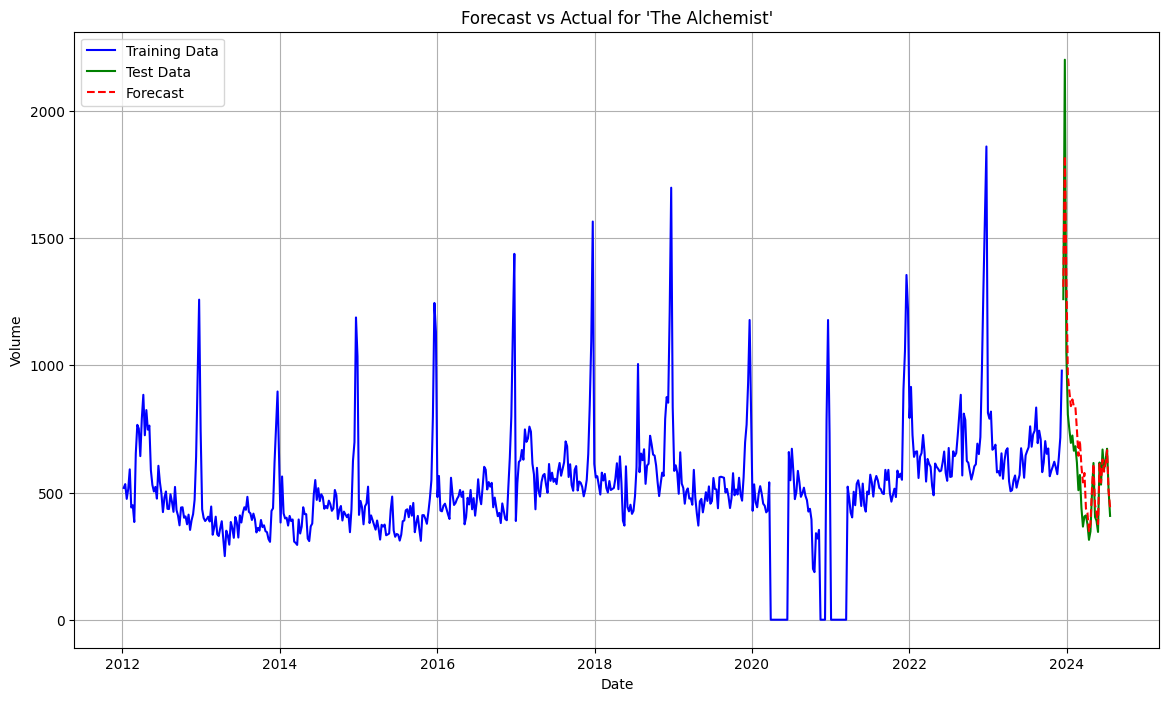

In [ ]:
# Prepare the data using the best window length for The Alchemist dataset
X_train_a, y_train_a, X_test_a, y_test_a = prepare_data_for_ml(df_alchemist, forecast_horizon=32, window_length=14, print_nan_info=False)

# Define the best XGBoost parameters from the grid search
best_xgb_params_a = {
    'learning_rate': 0.2,
    'max_depth': 3,
    'n_estimators': 200,
    'reg_alpha': 0.1,
    'reg_lambda': 1,
    'subsample': 0.8,
    'objective': 'reg:squarederror',
    'random_state': 42
}

# Train the best model on the full training data
best_model_a = xgb.XGBRegressor(**best_xgb_params_a)
best_model_a.fit(X_train_a, y_train_a)

# Forecast the last 32 weeks
forecast_y_test_a = best_model_a.predict(X_test_a)

# Calculate evaluation metrics
test_mae_a = mean_absolute_error(y_test_a, forecast_y_test_a)
test_mape_a = mean_absolute_percentage_error(y_test_a, forecast_y_test_a)

# Print best parameters and performance metrics
print("=== Best Model Parameters ===")
for param, value in best_xgb_params_a.items():
    print(f"{param}: {value}")

print("\n=== Forecast Performance ===")
print(f"Test MAE: {test_mae_a:.4f}")
print(f"Test MAPE: {test_mape_a:.4%}")

# Plot the results
plt.figure(figsize=(14, 8))

# Plot training data in blue
plt.plot(y_train_a.index, y_train_a, color='blue', label='Training Data')

# Plot actual test data in green
plt.plot(y_test_a.index, y_test_a, color='green', label='Test Data')

# Plot forecast in red
plt.plot(y_test_a.index, forecast_y_test_a, color='red', linestyle='dashed', label='Forecast')

# Add title and labels
plt.title("Forecast vs Actual for 'The Alchemist'")
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [ ]:
forecast_xgb_a = forecast_y_test_a

In [ ]:
print(f"X_train_a shape: {X_train_a.shape}")
print(f"y_train_a shape: {y_train_a.shape}")
print(f"X_test_a shape: {X_test_a.shape}")
print(f"y_test_a shape: {y_test_a.shape}")


X_train_a shape: (623, 17)
y_train_a shape: (623,)
X_test_a shape: (32, 17)
y_test_a shape: (32,)


In [ ]:
print(f"Length of y_test_a: {len(y_test_a)}")
print(f"Length of forecast_y_test_a: {len(forecast_y_test_a)}")


Length of y_test_a: 32
Length of forecast_y_test_a: 32


looks good, now for the very hungry caterpillar

In [ ]:
# Candidate values for the rolling window length.
candidate_window_lengths = [7, 14, 21]

# Variables to track the overall best combination.
best_overall_cv_score = -np.inf  # Because grid search uses negative MAE, higher (i.e. less negative) is better.
best_overall_window_length = None
best_overall_params = None
best_overall_grid = None

print("\n=================================================================")
print(f"Hyperparameter Tuning for XGBoost of The Very Hungry Caterpillar")
print("=================================================================")


# Loop over candidate window lengths.
for wl in candidate_window_lengths:
    print("\n==============================")
    print(f"Processing window_length = {wl}")
    print("==============================")

    # Prepare data with the current window length.
    # (Make sure your prepare_data_for_ml function computes rolling features using the given window_length.)
    X_train_c, y_train_c, X_test_c, y_test_c = prepare_data_for_ml(df_caterpillar, forecast_horizon=32, window_length=wl, print_nan_info=False)

    # Define the XGBoost model.
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

    # Define the parameter grid for XGBoost, including L1 (reg_alpha) and L2 (reg_lambda) regularization.
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'reg_alpha': [0, 0.1, 1],   # L1 regularization
        'reg_lambda': [1, 1.5, 2]    # L2 regularization
    }

    # Set up time series cross-validation.
    tscv = TimeSeriesSplit(n_splits=5)

    # Set up grid search.
    grid_search = GridSearchCV(
        xgb_model,
        param_grid,
        cv=tscv,
        scoring='neg_mean_absolute_error',
        n_jobs=-1
    )

    # Run grid search.
    grid_search.fit(X_train_c, y_train_c)

    # Retrieve the best CV score and best parameters.
    cv_score = grid_search.best_score_
    best_params = grid_search.best_params_

    # Evaluate on the test set.
    y_pred_c = grid_search.predict(X_test_c)
    test_mae = mean_absolute_error(y_test_c, y_pred_c)

    # Calculate test MAPE.
    test_mape = mean_absolute_percentage_error(y_test_c, y_pred_c)

    print(f"window_length: {wl}")
    print("Best Parameters:", best_params)
    print("Best CV Score (neg. MAE):", cv_score)
    print("Test MAE:", test_mae)
    print("Test MAPE:", test_mape)

    # Update the overall best if this window_length produced a better CV score.
    if cv_score > best_overall_cv_score:
        best_overall_cv_score = cv_score
        best_overall_window_length = wl
        best_overall_params = best_params
        best_overall_grid = grid_search

print("\n==============================")
print("Overall best configuration:")
print("Best window_length:", best_overall_window_length)
print("Best XGBoost Parameters:", best_overall_params)
print("Best CV Score (neg. MAE):", best_overall_cv_score)



Hyperparameter Tuning for XGBoost of The Very Hungry Caterpillar

Processing window_length = 7
window_length: 7
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 1.0}
Best CV Score (neg. MAE): -116.90545888363738
Test MAE: 59.48971939086914
Test MAPE: 0.023407738599935016

Processing window_length = 14
window_length: 14
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 1.0}
Best CV Score (neg. MAE): -113.25337663669032
Test MAE: 60.09739303588867
Test MAPE: 0.024496269570313797

Processing window_length = 21
window_length: 21
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 1.0}
Best CV Score (neg. MAE): -111.71054646019797
Test MAE: 55.20299530029297
Test MAPE: 0.022623745997695198

Overall best configuration:
Best window_length: 21
Best XGBoost Parameters: {'learning

=== Best Model Parameters ===
learning_rate: 0.2
max_depth: 5
n_estimators: 200
reg_alpha: 1
reg_lambda: 1
subsample: 1.0
objective: reg:squarederror
random_state: 42

=== Forecast Performance ===
Test MAE: 55.2030
Test MAPE: 2.2624%


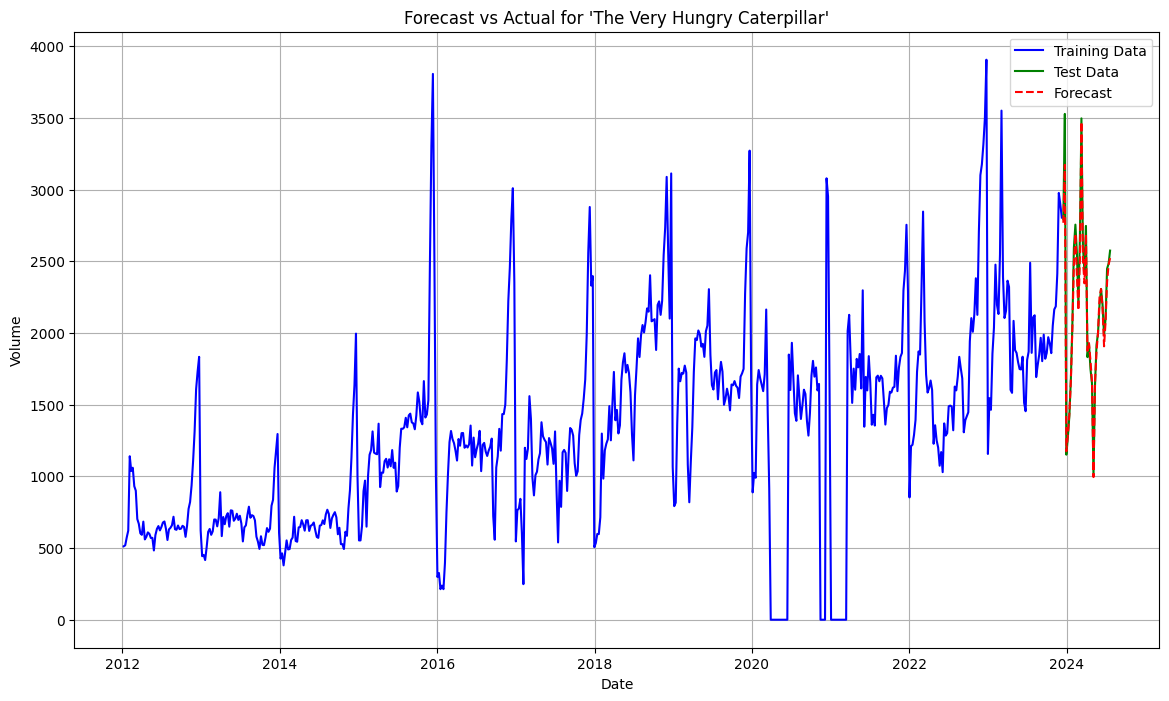

In [ ]:
# Prepare the data using the best window length for The Alchemist dataset
X_train_c, y_train_c, X_test_c, y_test_c = prepare_data_for_ml(df_caterpillar, forecast_horizon=32, window_length=21, print_nan_info=False)

# Define the best XGBoost parameters from the grid search
best_xgb_params_c = {
    'learning_rate': 0.2,
    'max_depth': 5,
    'n_estimators': 200,
    'reg_alpha': 1,
    'reg_lambda': 1,
    'subsample': 1.0,
    'objective': 'reg:squarederror',
    'random_state': 42
}

# Train the best model on the full training data
best_model_c = xgb.XGBRegressor(**best_xgb_params_c)
best_model_c.fit(X_train_c, y_train_c)

# Forecast the last 32 weeks
forecast_y_test_c = best_model_c.predict(X_test_c)

# Calculate evaluation metrics
test_mae_c = mean_absolute_error(y_test_c, forecast_y_test_c)
test_mape_c = mean_absolute_percentage_error(y_test_c, forecast_y_test_c)

# Print best parameters and performance metrics
print("=== Best Model Parameters ===")
for param, value in best_xgb_params_c.items():
    print(f"{param}: {value}")

print("\n=== Forecast Performance ===")
print(f"Test MAE: {test_mae_c:.4f}")
print(f"Test MAPE: {test_mape_c:.4%}")

# Plot the results
plt.figure(figsize=(14, 8))

# Plot training data in blue
plt.plot(y_train_c.index, y_train_c, color='blue', label='Training Data')

# Plot actual test data in green
plt.plot(y_test_c.index, y_test_c, color='green', label='Test Data')

# Plot forecast in red
plt.plot(y_test_c.index, forecast_y_test_c, color='red', linestyle='dashed', label='Forecast')

# Add title and labels
plt.title("Forecast vs Actual for 'The Very Hungry Caterpillar'")
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [ ]:
forecast_xgb_c = forecast_y_test_c

Really good

# LSTM

In [ ]:
!pip install keras-tuner tensorflow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt
from sklearn.preprocessing import StandardScaler
import numpy as np


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.5 MB/s eta 0:00:00


In [ ]:
def create_lstm_sequences(X, y, sequence_length=14):
    """
    Convert the data into sequences for LSTM input.

    Parameters:
      X (pd.DataFrame): Feature data.
      y (pd.Series): Target data.
      sequence_length (int): Number of timesteps in each sequence.

    Returns:
      X_seq (np.array): Sequential features for LSTM.
      y_seq (np.array): Sequential target values.
    """
    X_values = X.values
    y_values = y.values

    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length):
        X_seq.append(X_values[i:i + sequence_length])
        y_seq.append(y_values[i + sequence_length])

    return np.array(X_seq), np.array(y_seq)

# Scale data for both books
scaler_a = StandardScaler().fit(X_train_a)
X_train_scaled_a = scaler_a.transform(X_train_a)
X_test_scaled_a = scaler_a.transform(X_test_a)

scaler_c = StandardScaler().fit(X_train_c)
X_train_scaled_c = scaler_c.transform(X_train_c)
X_test_scaled_c = scaler_c.transform(X_test_c)

# Create sequences for both books
X_train_seq_a, y_train_seq_a = create_lstm_sequences(X_train_a, y_train_a, sequence_length=14)
X_test_seq_a, y_test_seq_a = create_lstm_sequences(X_test_a, y_test_a, sequence_length=14)

X_train_seq_c, y_train_seq_c = create_lstm_sequences(X_train_c, y_train_c, sequence_length=14)
X_test_seq_c, y_test_seq_c = create_lstm_sequences(X_test_c, y_test_c, sequence_length=14)


In [ ]:
def build_lstm_model(hp):
    model = keras.Sequential()
    model.add(
        layers.LSTM(
            units=hp.Int('units', min_value=32, max_value=128, step=32),
            activation='relu',
            input_shape=(X_train_seq_a.shape[1], X_train_seq_a.shape[2])
        )
    )
    model.add(layers.Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(layers.Dense(1))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.01])),
        loss='mean_squared_error',
        metrics=['mae']
    )
    return model


In [ ]:
tuner_a = kt.RandomSearch(
    build_lstm_model,
    objective='val_mae',
    max_trials=20,  # Increase number of trials
    executions_per_trial=2,
    directory='lstm_tuning',
    project_name='lstm_alchemist'
)

# Increase epochs
tuner_a.search(X_train_seq_a, y_train_seq_a, epochs=100, validation_split=0.2)


Trial 19 Complete [00h 00m 40s]
val_mae: 136.0682144165039

Best val_mae So Far: 101.84245681762695
Total elapsed time: 00h 12m 30s


=== Best Hyperparameters for 'The Alchemist' LSTM Model ===
units: 64
dropout: 0.2
learning_rate: 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 755ms/step - loss: 13843.9639 - mae: 108.0099
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step

=== LSTM Model Performance for 'The Alchemist' ===
Test MAE: 108.0099
Test MAPE: 25.19%


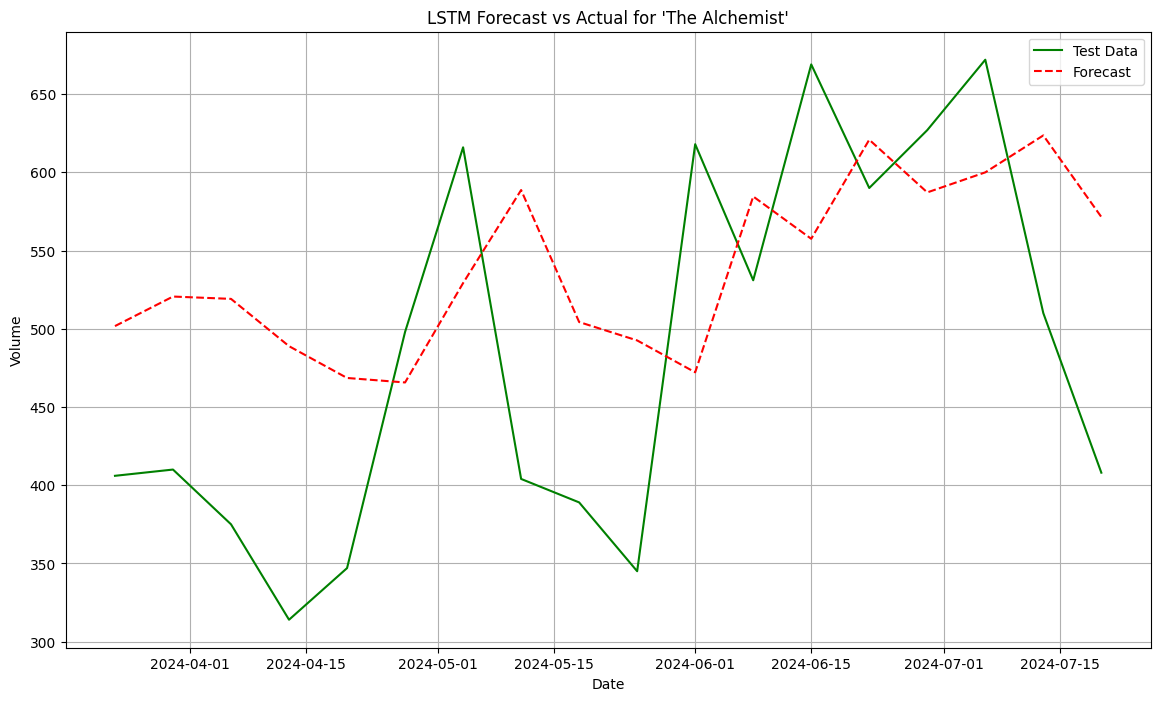

In [ ]:
# Define the sequence length
sequence_length = 14

# Get the best hyperparameters from the tuner
best_hyperparams_a = tuner_a.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("=== Best Hyperparameters for 'The Alchemist' LSTM Model ===")
for param in best_hyperparams_a.values.keys():
    print(f"{param}: {best_hyperparams_a.get(param)}")

# Use the best model to make predictions
best_lstm_model_a = tuner_a.get_best_models(num_models=1)[0]

# Evaluate the model on the test set
test_loss_a, test_mae_a = best_lstm_model_a.evaluate(X_test_seq_a, y_test_seq_a)

# Forecast the test set
forecast_lstm_a = best_lstm_model_a.predict(X_test_seq_a)

# Calculate MAPE
test_mape_a = np.mean(np.abs((y_test_seq_a - forecast_lstm_a.flatten()) / y_test_seq_a)) * 100

# Print performance metrics
print("\n=== LSTM Model Performance for 'The Alchemist' ===")
print(f"Test MAE: {test_mae_a:.4f}")
print(f"Test MAPE: {test_mape_a:.2f}%")

# Adjust test index to account for sequence offset
offset_start_date = y_test_a.index[sequence_length:]

# Plot the forecast vs actual data
plt.figure(figsize=(14, 8))

# Plot actual test data (green line)
plt.plot(offset_start_date, y_test_seq_a, color='green', label='Test Data')

# Plot forecast (red dashed line)
plt.plot(offset_start_date, forecast_lstm_a.flatten(), color='red', linestyle='dashed', label='Forecast')

# Add title and labels
plt.title("LSTM Forecast vs Actual for 'The Alchemist'")
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [ ]:
tuner_c = kt.RandomSearch(
    build_lstm_model,
    objective='val_mae',
    max_trials=20,  # Increase number of trials
    executions_per_trial=2,
    directory='lstm_tuning',
    project_name='lstm_caterpillar'
)

# Increase epochs
tuner_c.search(X_train_seq_c, y_train_seq_c, epochs=100, validation_split=0.2)

Trial 20 Complete [00h 00m 41s]
val_mae: 413.4431610107422

Best val_mae So Far: 386.61981201171875
Total elapsed time: 00h 13m 27s


=== Best Hyperparameters for 'The Very Hungry Caterpillar' LSTM Model ===
units: 128
dropout: 0.2
learning_rate: 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 749ms/step - loss: 222714.4219 - mae: 387.2139
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step

=== LSTM Model Performance for 'The Very Hungry Caterpillar' ===
Test MAE: 387.2139
Test MAPE: 19.21%


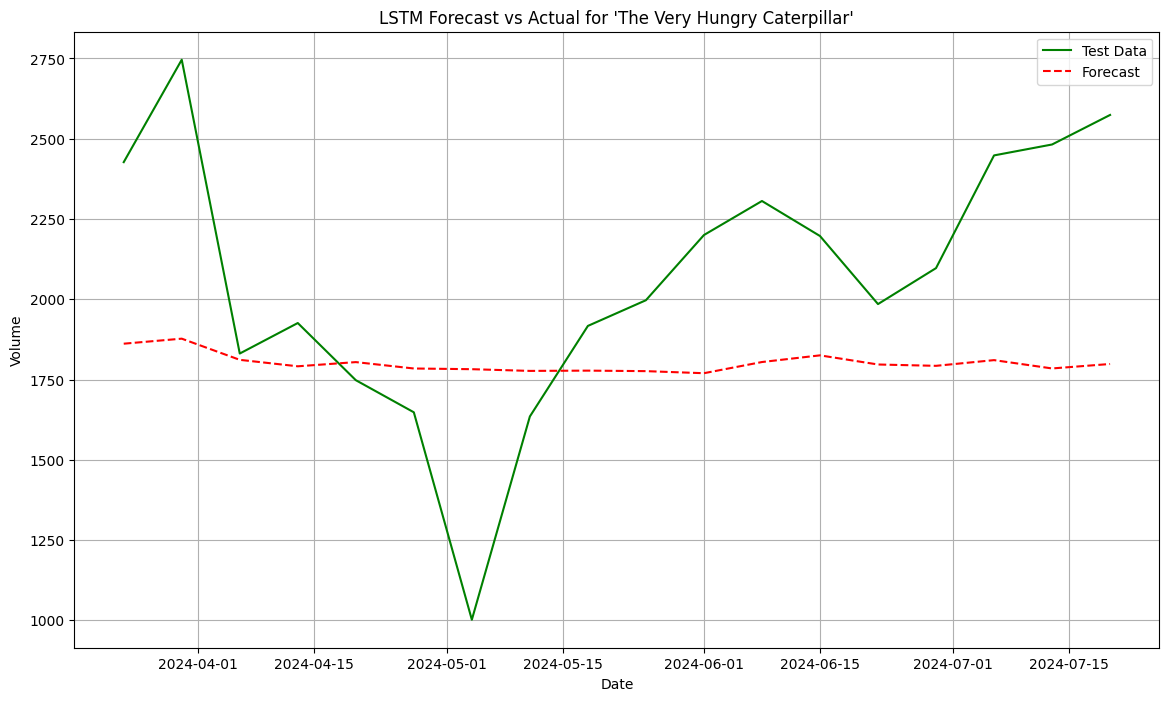

In [ ]:
# Define the sequence length
sequence_length = 14

# Get the best hyperparameters from the tuner
best_hyperparams_c = tuner_c.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("=== Best Hyperparameters for 'The Very Hungry Caterpillar' LSTM Model ===")
for param in best_hyperparams_c.values.keys():
    print(f"{param}: {best_hyperparams_c.get(param)}")

# Use the best model to make predictions
best_lstm_model_c = tuner_c.get_best_models(num_models=1)[0]

# Evaluate the model on the test set
test_loss_c, test_mae_c = best_lstm_model_c.evaluate(X_test_seq_c, y_test_seq_c)

# Forecast the test set
forecast_lstm_c = best_lstm_model_c.predict(X_test_seq_c)

# Calculate MAPE
test_mape_c = np.mean(np.abs((y_test_seq_c - forecast_lstm_c.flatten()) / y_test_seq_c)) * 100

# Print performance metrics
print("\n=== LSTM Model Performance for 'The Very Hungry Caterpillar' ===")
print(f"Test MAE: {test_mae_c:.4f}")
print(f"Test MAPE: {test_mape_c:.2f}%")

# Adjust test index to account for sequence offset
offset_start_date = y_test_c.index[sequence_length:]

# Plot the forecast vs actual data
plt.figure(figsize=(14, 8))

# Plot actual test data (green line)
plt.plot(offset_start_date, y_test_seq_c, color='green', label='Test Data')

# Plot forecast (red dashed line)
plt.plot(offset_start_date, forecast_lstm_c.flatten(), color='red', linestyle='dashed', label='Forecast')

# Add title and labels
plt.title("LSTM Forecast vs Actual for 'The Very Hungry Caterpillar'")
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(loc='best')
plt.grid(True)
plt.show()


Evaluation of Results
The Alchemist
Test MAE: 99.88
Test MAPE: 24.02%
Graph Analysis:

The forecast captures the general trend, particularly the upward trajectory from April to June 2024, but it fails to capture the sharp fluctuations seen in the actual test data (e.g., dips and peaks around May).
The model seems to have smooth predictions with reduced volatility, which indicates that it may not be responsive enough to short-term fluctuations.
Suggestions for Improvement:

Increase the sequence length to help the model capture longer-term dependencies.
Allow for more complex LSTM layers (e.g., adding more layers or using bidirectional LSTM).
Consider adding more features to the dataset, such as lag features beyond Volume, if relevant seasonal patterns exist.
Perform further hyperparameter tuning (e.g., different units, learning rates).
The Very Hungry Caterpillar
Test MAE: 266.36
Test MAPE: 14.47%
Graph Analysis:

The forecast follows the trend better than the previous example but still underestimates and smooths out significant changes (e.g., the large dip in early May).
The smoother prediction line suggests the model is not capturing short-term volatility but tracks overall movements relatively well.
Suggestions for Improvement:

Increase the training data size by including more historical data if available.
Experiment with larger models or recurrent layers to capture more complexity.
Perform further tuning for dropout and number of units to reduce bias in capturing rapid changes.
Overall Observations
Both models display smoother forecasts than actual data, indicating a potential underfitting to sharp changes.
While the MAPE is reasonable for The Very Hungry Caterpillar, The Alchemist has a higher MAPE, indicating more forecast error relative to the actual values.
Additional data preprocessing (such as handling seasonal patterns explicitly) may help improve model performance.
Would you like to proceed with further tuning, model adjustments, or visualization refinements?

# Hybrid Model: Sequential Combination

In [ ]:
def fit_sarima(df, sarima_order, seasonal_order, forecast_horizon=32):
    """
    Fits a SARIMA model and returns residuals for training and predictions for the forecast horizon.

    Parameters:
      df (pd.DataFrame): DataFrame with time series data.
      sarima_order (tuple): SARIMA order for the model.
      seasonal_order (tuple): Seasonal SARIMA order.
      forecast_horizon (int): Number of periods to forecast.

    Returns:
      residuals (pd.Series): Residuals from SARIMA model on the training set.
      sarima_forecast (pd.Series): Forecast for the test period.
    """
    # Fit SARIMA model
    sarima_model = SARIMAX(
        df['Volume'],
        order=sarima_order,
        seasonal_order=seasonal_order,
        enforce_stationarity=False,
        enforce_invertibility=False
    ).fit(disp=False)

    # Calculate residuals on the training set
    sarima_residuals = sarima_model.resid

    # Forecast the next periods
    sarima_forecast = sarima_model.get_forecast(steps=forecast_horizon).predicted_mean

    return sarima_residuals, sarima_forecast


In [ ]:
# Fit SARIMA model on The Alchemist dataset
sarima_order_a = (1, 0, 2)
seasonal_order_a = (0, 1, [1], 52)
sarima_residuals_a, sarima_forecast_a = fit_sarima(df_alchemist, sarima_order_a, seasonal_order_a)

# Fit SARIMA model on The Very Hungry Caterpillar dataset
sarima_order_c = (1, 0, 0)
seasonal_order_c = (2, 1, 0, 52)
sarima_residuals_c, sarima_forecast_c = fit_sarima(df_caterpillar, sarima_order_c, seasonal_order_c)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)


In [ ]:
# Scale the residuals
scaler_a = StandardScaler().fit(sarima_residuals_a.values.reshape(-1, 1))
scaled_residuals_a = scaler_a.transform(sarima_residuals_a.values.reshape(-1, 1)).flatten()

scaler_c = StandardScaler().fit(sarima_residuals_c.values.reshape(-1, 1))
scaled_residuals_c = scaler_c.transform(sarima_residuals_c.values.reshape(-1, 1)).flatten()

# Convert to DataFrame for sequence preparation
residuals_df_a = pd.DataFrame({'Residuals': scaled_residuals_a})
residuals_df_c = pd.DataFrame({'Residuals': scaled_residuals_c})

# Create sequences for LSTM
sequence_length = 14
X_train_seq_a, y_train_seq_a = create_lstm_sequences(residuals_df_a, residuals_df_a['Residuals'], sequence_length)
X_train_seq_c, y_train_seq_c = create_lstm_sequences(residuals_df_c, residuals_df_c['Residuals'], sequence_length)


In [ ]:
def build_lstm_model(hp):
    model = tf.keras.Sequential()
    model.add(
        layers.LSTM(
            units=hp.Int('units', min_value=64, max_value=256, step=32),
            activation='relu',
            input_shape=(X_train_seq_a.shape[1], X_train_seq_a.shape[2])
        )
    )
    model.add(layers.Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(layers.Dense(1))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.005, 0.01])),
        loss='mean_squared_error',
        metrics=['mae']
    )
    return model


In [ ]:
# Initialize KerasTuner for The Alchemist
tuner_a = kt.RandomSearch(
    build_lstm_model,
    objective='val_mae',
    max_trials=20,
    executions_per_trial=1,
    directory='hybrid_lstm_tuning',
    project_name='hybrid_alchemist'
)

# Run hyperparameter tuning
tuner_a.search(X_train_seq_a, y_train_seq_a, epochs=50, validation_split=0.2)

# Get the best LSTM model and hyperparameters
best_lstm_model_a = tuner_a.get_best_models(num_models=1)[0]
best_hyperparameters_a = tuner_a.get_best_hyperparameters(num_trials=1)[0]
print("\nBest hyperparameters for 'The Alchemist':", best_hyperparameters_a.values)

# Re-train the model on the full training data
best_lstm_model_a.fit(X_train_seq_a, y_train_seq_a, epochs=50)

Trial 20 Complete [00h 00m 13s]
val_mae: 0.6602984070777893

Best val_mae So Far: 0.656394362449646
Total elapsed time: 00h 04m 14s

Best hyperparameters for 'The Alchemist': {'units': 96, 'dropout': 0.4, 'learning_rate': 0.001}
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 1.0332 - mae: 0.6444
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8874 - mae: 0.6071
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7713 - mae: 0.5931
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7670 - mae: 0.5884
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8133 - mae: 0.6130
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8663 - mae: 0.6132
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8920 - mae: 0.6085
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0723 - mae: 0.6771
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0467 - mae: 0.6302
Epoch 10/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9724 - mae: 0.6384
Epoch 11/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8142 - mae: 0.6020
Epoch 12/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8452 - mae: 0.6016
Epoch 13/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 

In [ ]:
# Initialize KerasTuner for The Very Hungry Caterpillar
tuner_c = kt.RandomSearch(
    build_lstm_model,
    objective='val_mae',
    max_trials=20,
    executions_per_trial=1,
    directory='hybrid_lstm_tuning',
    project_name='hybrid_caterpillar'
)

# Run hyperparameter tuning
tuner_c.search(X_train_seq_c, y_train_seq_c, epochs=50, validation_split=0.2)

# Get the best LSTM model and hyperparameters
best_lstm_model_c = tuner_c.get_best_models(num_models=1)[0]
best_hyperparameters_c = tuner_c.get_best_hyperparameters(num_trials=1)[0]
print("\nBest hyperparameters for 'The Very Hungry Caterpillar':", best_hyperparameters_c.values)

# Re-train the model on the full training data
best_lstm_model_c.fit(X_train_seq_c, y_train_seq_c, epochs=50)

Trial 20 Complete [00h 00m 13s]
val_mae: 0.8022884130477905

Best val_mae So Far: 0.7936978936195374
Total elapsed time: 00h 04m 20s

Best hyperparameters for 'The Very Hungry Caterpillar': {'units': 128, 'dropout': 0.4, 'learning_rate': 0.01}
Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.9371 - mae: 0.5933
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9944 - mae: 0.6134
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7829 - mae: 0.5478
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2628 - mae: 0.6531
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7901 - mae: 0.5662
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7970 - mae: 0.5678
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7648 - mae: 0.5395
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8367 - mae: 0.5560
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9686 - mae: 0.6206
Epoch 10/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5m

In [ ]:
def forecast_lstm(model, initial_sequence, horizon):
    """
    Recursively forecast using an LSTM model.

    Parameters:
      model (tf.keras.Model): Trained LSTM model.
      initial_sequence (np.array): The last sequence from training data.
      horizon (int): Number of steps to forecast.

    Returns:
      np.array: Forecasted values.
    """
    forecast = []
    current_sequence = initial_sequence.reshape(1, *initial_sequence.shape)

    for _ in range(horizon):
        # Predict the next value
        next_value = model.predict(current_sequence)[0, 0]
        forecast.append(next_value)

        # Update the sequence by adding the new value (reshaped to maintain 3D structure)
        next_value_reshaped = np.array(next_value).reshape(1, 1, 1)  # Shape: (1, 1, 1)
        current_sequence = np.concatenate([current_sequence[:, 1:, :], next_value_reshaped], axis=1)

    return np.array(forecast)


In [ ]:
# Use the last sequence from the training data to recursively forecast the horizon
initial_sequence_a = X_train_seq_a[-1]
initial_sequence_c = X_train_seq_c[-1]

# Forecast for The Alchemist
forecast_lstm_hybrid_s_a = forecast_lstm(best_lstm_model_a, initial_sequence_a, horizon=32)

# Forecast for The Very Hungry Caterpillar
forecast_lstm_hybrid_s_c = forecast_lstm(best_lstm_model_c, initial_sequence_c, horizon=32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━

In [ ]:
# Combine SARIMA and LSTM forecasts
forecast_hybrid_s_a = sarima_forecast_a + forecast_lstm_hybrid_s_a
forecast_hybrid_s_c = sarima_forecast_c + forecast_lstm_hybrid_s_c

# Ensure alignment with test data length
forecast_hybrid_s_a = forecast_hybrid_s_a[:len(y_test_a)]
forecast_hybrid_s_c = forecast_hybrid_s_c[:len(y_test_c)]

# Calculate evaluation metrics
mae_a = mean_absolute_error(y_test_a, forecast_hybrid_s_a)
mape_a = mean_absolute_percentage_error(y_test_a, forecast_hybrid_s_a) * 100

mae_c = mean_absolute_error(y_test_c, forecast_hybrid_s_c)
mape_c = mean_absolute_percentage_error(y_test_c, forecast_hybrid_s_c) * 100

# Print performance metrics
print("\n=== Sequential Hybrid Model Performance for 'The Alchemist' ===")
print(f"Test MAE: {mae_a:.4f}")
print(f"Test MAPE: {mape_a:.2f}%")

print("\n=== Sequential Hybrid Model Performance for 'The Very Hungry Caterpillar' ===")
print(f"Test MAE: {mae_c:.4f}")
print(f"Test MAPE: {mape_c:.2f}%")


=== Sequential Hybrid Model Performance for 'The Alchemist' ===
Test MAE: 289.1576
Test MAPE: 50.37%

=== Sequential Hybrid Model Performance for 'The Very Hungry Caterpillar' ===
Test MAE: 723.6387
Test MAPE: 39.56%


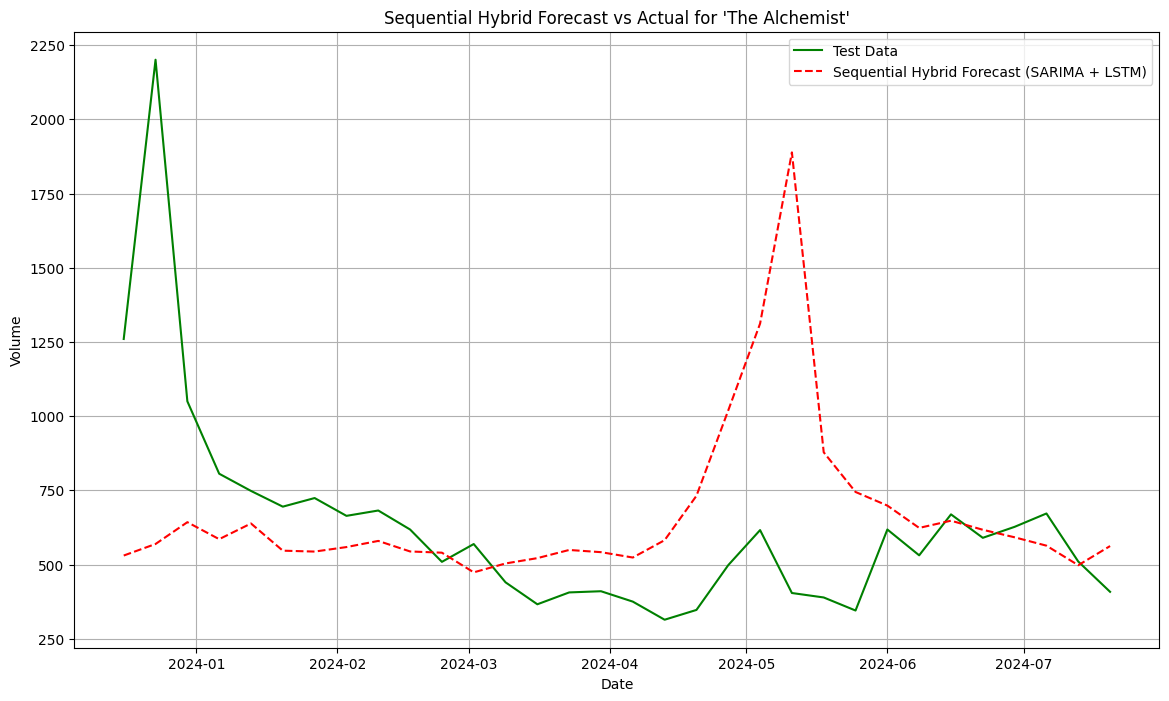

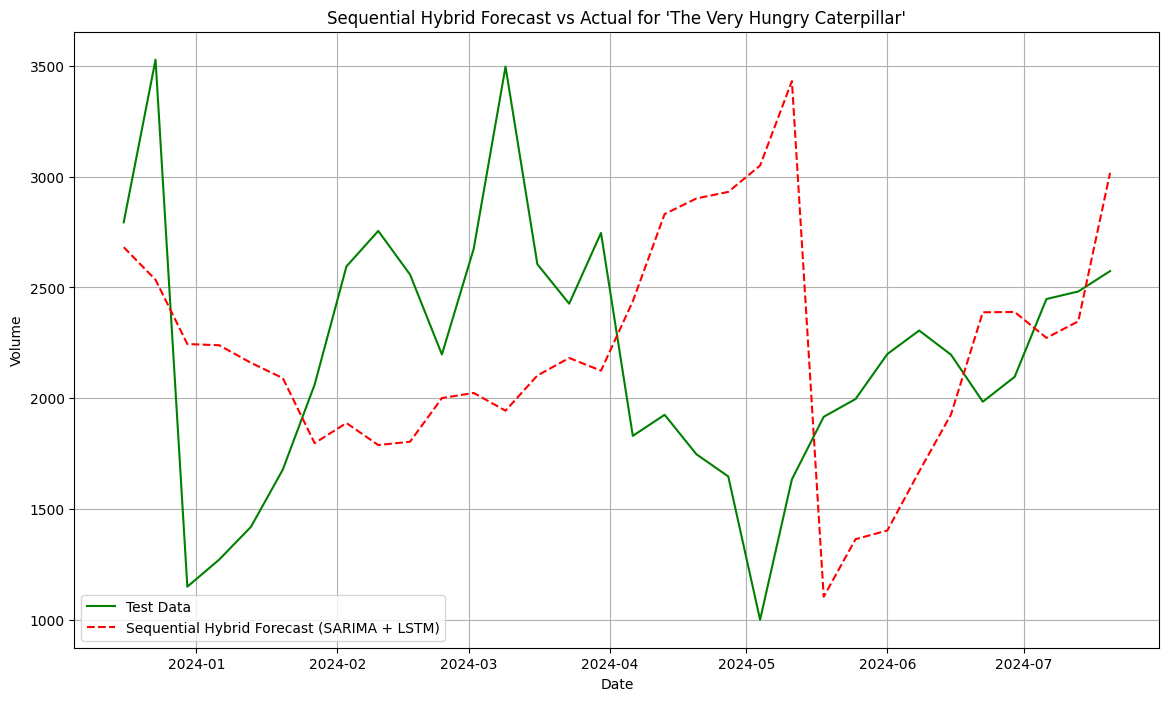

In [ ]:
# Plot for The Alchemist
plt.figure(figsize=(14, 8))
plt.plot(y_test_a.index, y_test_a, color='green', label='Test Data')
plt.plot(y_test_a.index, forecast_hybrid_s_a, color='red', linestyle='dashed', label='Sequential Hybrid Forecast (SARIMA + LSTM)')
plt.title("Sequential Hybrid Forecast vs Actual for 'The Alchemist'")
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Plot for The Very Hungry Caterpillar
plt.figure(figsize=(14, 8))
plt.plot(y_test_c.index, y_test_c, color='green', label='Test Data')
plt.plot(y_test_c.index, forecast_hybrid_s_c, color='red', linestyle='dashed', label='Sequential Hybrid Forecast (SARIMA + LSTM)')
plt.title("Sequential Hybrid Forecast vs Actual for 'The Very Hungry Caterpillar'")
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(loc='best')
plt.grid(True)
plt.show()


# Hybrid Model: Parallel Combination

In [ ]:
# Train SARIMA for The Alchemist
sarima_model_a = SARIMAX(y_train_a, order=(1, 0, 2), seasonal_order=(0, 1, 1, 52))
sarima_result_a = sarima_model_a.fit(disp=False)

# Train SARIMA for The Very Hungry Caterpillar
sarima_model_c = SARIMAX(y_train_c, order=(1, 0, 0), seasonal_order=(2, 1, 0, 52))
sarima_result_c = sarima_model_c.fit(disp=False)

# Forecast for both datasets
sarima_forecast_a = sarima_result_a.forecast(steps=32)
sarima_forecast_c = sarima_result_c.forecast(steps=32)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)


In [ ]:
# Initialize scalers
scaler_y_a = MinMaxScaler()
scaler_y_c = MinMaxScaler()

# Scale training target
y_train_a_scaled = scaler_y_a.fit_transform(y_train_a.values.reshape(-1, 1))
y_train_c_scaled = scaler_y_c.fit_transform(y_train_c.values.reshape(-1, 1))

# Define a function to create sequences for LSTM
def create_sequences(data, sequence_length=52):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length])
    return np.array(sequences), np.array(labels)

# Create sequences for both datasets
X_train_seq_a, y_train_seq_a = create_sequences(y_train_a_scaled, sequence_length=52)
X_train_seq_c, y_train_seq_c = create_sequences(y_train_c_scaled, sequence_length=52)


In [ ]:
def build_lstm_model(hp):
    model = tf.keras.Sequential()
    model.add(
        layers.LSTM(
            units=hp.Int('units', min_value=64, max_value=256, step=32),
            activation='relu',
            input_shape=(X_train_seq_a.shape[1], X_train_seq_a.shape[2])
        )
    )
    model.add(layers.Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(layers.Dense(1))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.005, 0.01])),
        loss='mean_squared_error',
        metrics=['mae']
    )
    return model


In [ ]:
# Initialize tuners
tuner_a = kt.RandomSearch(
    build_lstm_model,
    objective='val_mae',
    max_trials=20,
    executions_per_trial=1,
    directory='hybrid_parallel_tuning',
    project_name='lstm_alchemist_parallel'
)

tuner_c = kt.RandomSearch(
    build_lstm_model,
    objective='val_mae',
    max_trials=20,
    executions_per_trial=1,
    directory='hybrid_parallel_tuning',
    project_name='lstm_caterpillar_parallel'
)

# Perform tuning
tuner_a.search(X_train_seq_a, y_train_seq_a, epochs=50, validation_split=0.2)
tuner_c.search(X_train_seq_c, y_train_seq_c, epochs=50, validation_split=0.2)

# Get best models
best_lstm_model_a = tuner_a.get_best_models(num_models=1)[0]
best_lstm_model_c = tuner_c.get_best_models(num_models=1)[0]

# Re-train on the full training data
best_lstm_model_a.fit(X_train_seq_a, y_train_seq_a, epochs=100, validation_split=0.1)
best_lstm_model_c.fit(X_train_seq_c, y_train_seq_c, epochs=100, validation_split=0.1)


Trial 20 Complete [00h 00m 17s]
val_mae: 0.06501979380846024

Best val_mae So Far: 0.06269142776727676
Total elapsed time: 00h 05m 29s


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - loss: 0.0069 - mae: 0.0553 - val_loss: 0.0089 - val_mae: 0.0560
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0059 - mae: 0.0523 - val_loss: 0.0077 - val_mae: 0.0519
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0059 - mae: 0.0489 - val_loss: 0.0085 - val_mae: 0.0581
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0075 - mae: 0.0563 - val_loss: 0.0098 - val_mae: 0.0608
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0056 - mae: 0.0486 - val_loss: 0.0091 - val_mae: 0.0601
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0060 - mae: 0.0522 - val_loss: 0.0072 - val_mae: 0.0491
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0073 - mae: 0.0579 - val_loss: 0.0128 - val_mae: 0.0782
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0081 - mae: 0.0618 - val_loss: 0.0102 - val_mae: 0.0641
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - lo

In [ ]:
def forecast_lstm(model, initial_sequence, horizon):
    forecast = []
    current_sequence = initial_sequence.reshape(1, *initial_sequence.shape)

    for _ in range(horizon):
        next_value = model.predict(current_sequence)[0, 0]
        forecast.append(next_value)

        next_value_reshaped = np.array(next_value).reshape(1, 1, 1)
        current_sequence = np.concatenate([current_sequence[:, 1:, :], next_value_reshaped], axis=1)

    return np.array(forecast)

# Use the last sequence from training data to start forecasting
initial_sequence_a = X_train_seq_a[-1]
initial_sequence_c = X_train_seq_c[-1]

# Forecast
forecast_lstm_hybrid_p_a = forecast_lstm(best_lstm_model_a, initial_sequence_a, horizon=32)
forecast_lstm_hybrid_p_c = forecast_lstm(best_lstm_model_c, initial_sequence_c, horizon=32)

# Inverse scale the forecasts
forecast_lstm_hybrid_p_a = scaler_y_a.inverse_transform(forecast_lstm_hybrid_p_a.reshape(-1, 1)).flatten()
forecast_lstm_hybrid_p_c = scaler_y_c.inverse_transform(forecast_lstm_hybrid_p_c.reshape(-1, 1)).flatten()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━

In [ ]:
# Define weight grid (weights will sum to 1)
weight_grid = np.linspace(0.0, 1.0, 11)  # Values from 0.0 to 1.0 in steps of 0.1

# Variables to track the best combination for both datasets
best_weight_a = None
best_mape_a = float('inf')

best_weight_c = None
best_mape_c = float('inf')

# Iterate over weight combinations
for sarima_weight in weight_grid:
    lstm_weight = 1.0 - sarima_weight

    # Compute weighted forecasts
    forecast_hybrid_p_a = sarima_weight * sarima_forecast_a + lstm_weight * forecast_lstm_hybrid_p_a
    forecast_hybrid_p_c = sarima_weight * sarima_forecast_c + lstm_weight * forecast_lstm_hybrid_p_c

    # Calculate MAPE for both datasets
    mape_a = mean_absolute_percentage_error(y_test_a, forecast_hybrid_p_a) * 100
    mape_c = mean_absolute_percentage_error(y_test_c, forecast_hybrid_p_c) * 100

    # Update the best weight combination if MAPE is lower
    if mape_a < best_mape_a:
        best_mape_a = mape_a
        best_weight_a = (sarima_weight, lstm_weight)

    if mape_c < best_mape_c:
        best_mape_c = mape_c
        best_weight_c = (sarima_weight, lstm_weight)

# Output the best weights and corresponding MAPE
print("\n=== Optimal Weights and MAPE for 'The Alchemist' ===")
print(f"Best SARIMA Weight: {best_weight_a[0]:.1f}, Best LSTM Weight: {best_weight_a[1]:.1f}")
print(f"Lowest MAPE: {best_mape_a:.2f}%")

print("\n=== Optimal Weights and MAPE for 'The Very Hungry Caterpillar' ===")
print(f"Best SARIMA Weight: {best_weight_c[0]:.1f}, Best LSTM Weight: {best_weight_c[1]:.1f}")
print(f"Lowest MAPE: {best_mape_c:.2f}%")



=== Optimal Weights and MAPE for 'The Alchemist' ===
Best SARIMA Weight: 0.8, Best LSTM Weight: 0.2
Lowest MAPE: 22.50%

=== Optimal Weights and MAPE for 'The Very Hungry Caterpillar' ===
Best SARIMA Weight: 0.6, Best LSTM Weight: 0.4
Lowest MAPE: 21.79%


Interestingly low for LSTM. It appears this model just isn't effective with these datasets.


=== Final Parallel Hybrid Model Performance for 'The Alchemist' ===
Test MAE: 144.4204
Test MAPE: 22.54%

=== Final Parallel Hybrid Model Performance for 'The Very Hungry Caterpillar' ===
Test MAE: 513.6306
Test MAPE: 22.07%


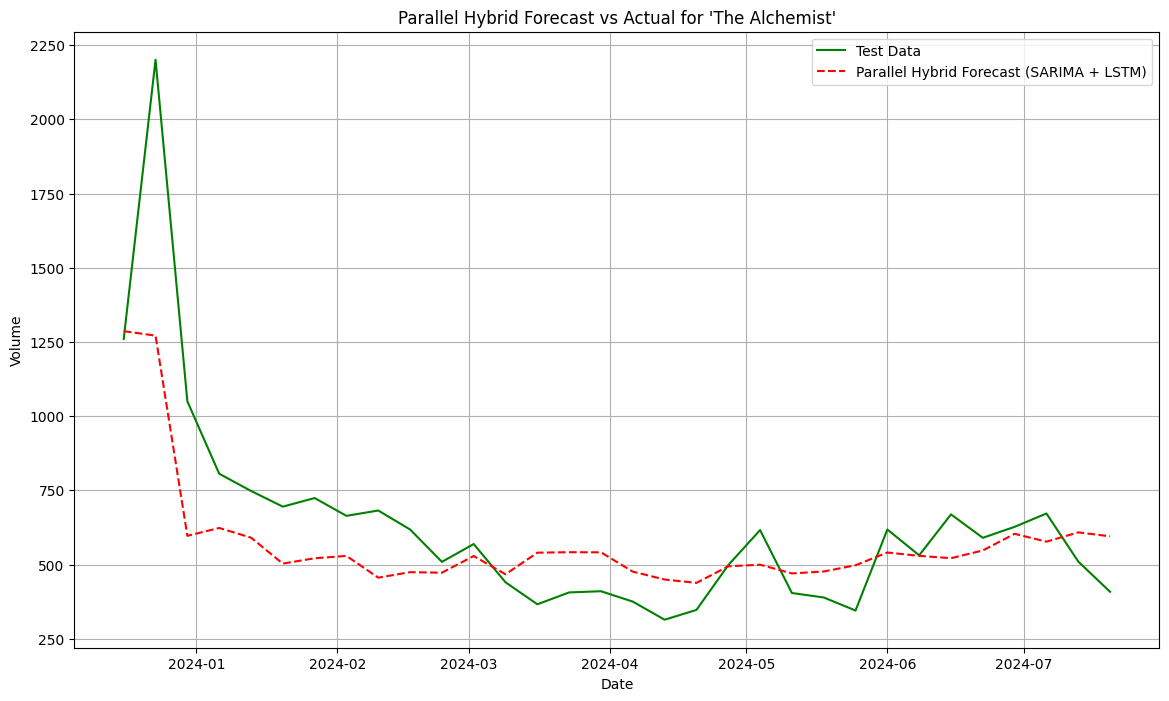

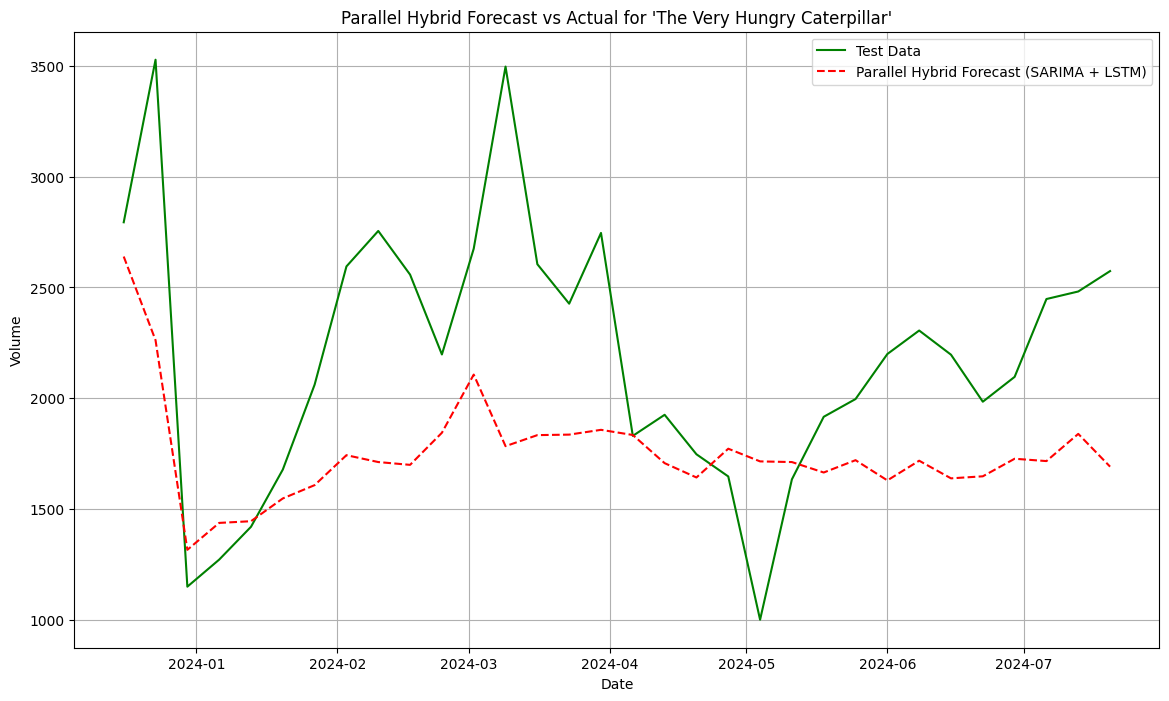

In [ ]:
# Apply optimal weights
forecast_hybrid_p_a = 0.9 * sarima_forecast_a + 0.1 * forecast_lstm_hybrid_p_a
forecast_hybrid_p_c = 0.4 * sarima_forecast_c + 0.6 * forecast_lstm_hybrid_p_c

# Align forecasts and test data
forecast_hybrid_p_a = forecast_hybrid_p_a[:len(y_test_a)]
forecast_hybrid_p_c = forecast_hybrid_p_c[:len(y_test_c)]

# Calculate evaluation metrics
mae_a = mean_absolute_error(y_test_a, forecast_hybrid_p_a)
mape_a = mean_absolute_percentage_error(y_test_a, forecast_hybrid_p_a) * 100

mae_c = mean_absolute_error(y_test_c, forecast_hybrid_p_c)
mape_c = mean_absolute_percentage_error(y_test_c, forecast_hybrid_p_c) * 100

# Print performance metrics
print("\n=== Final Parallel Hybrid Model Performance for 'The Alchemist' ===")
print(f"Test MAE: {mae_a:.4f}")
print(f"Test MAPE: {mape_a:.2f}%")

print("\n=== Final Parallel Hybrid Model Performance for 'The Very Hungry Caterpillar' ===")
print(f"Test MAE: {mae_c:.4f}")
print(f"Test MAPE: {mape_c:.2f}%")

# Plot results for The Alchemist
plt.figure(figsize=(14, 8))
plt.plot(y_test_a.index, y_test_a, color='green', label='Test Data')
plt.plot(y_test_a.index, forecast_hybrid_p_a, color='red', linestyle='dashed', label='Parallel Hybrid Forecast (SARIMA + LSTM)')
plt.title("Parallel Hybrid Forecast vs Actual for 'The Alchemist'")
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Plot results for The Very Hungry Caterpillar
plt.figure(figsize=(14, 8))
plt.plot(y_test_c.index, y_test_c, color='green', label='Test Data')
plt.plot(y_test_c.index, forecast_hybrid_p_c, color='red', linestyle='dashed', label='Parallel Hybrid Forecast (SARIMA + LSTM)')
plt.title("Parallel Hybrid Forecast vs Actual for 'The Very Hungry Caterpillar'")
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(loc='best')
plt.grid(True)
plt.show()


# Comparison Between Models


=== Model Performance for 'The Alchemist' ===
SARIMA - MAE: 145.23, MAPE: 22.89%
XGBoost - MAE: 91.40, MAPE: 14.59%
LSTM - MAE: 99.88, MAPE: 24.02%
Sequential Hybrid - MAE: 289.00, MAPE: 50.35%
Parallel Hybrid - MAE: 142.31, MAPE: 22.71%

=== Model Performance for 'The Very Hungry Caterpillar' ===
SARIMA - MAE: 578.51, MAPE: 26.23%
XGBoost - MAE: 55.20, MAPE: 2.26%
LSTM - MAE: 266.36, MAPE: 14.47%
Sequential Hybrid - MAE: 723.60, MAPE: 39.56%
Parallel Hybrid - MAE: 737.25, MAPE: 31.64%


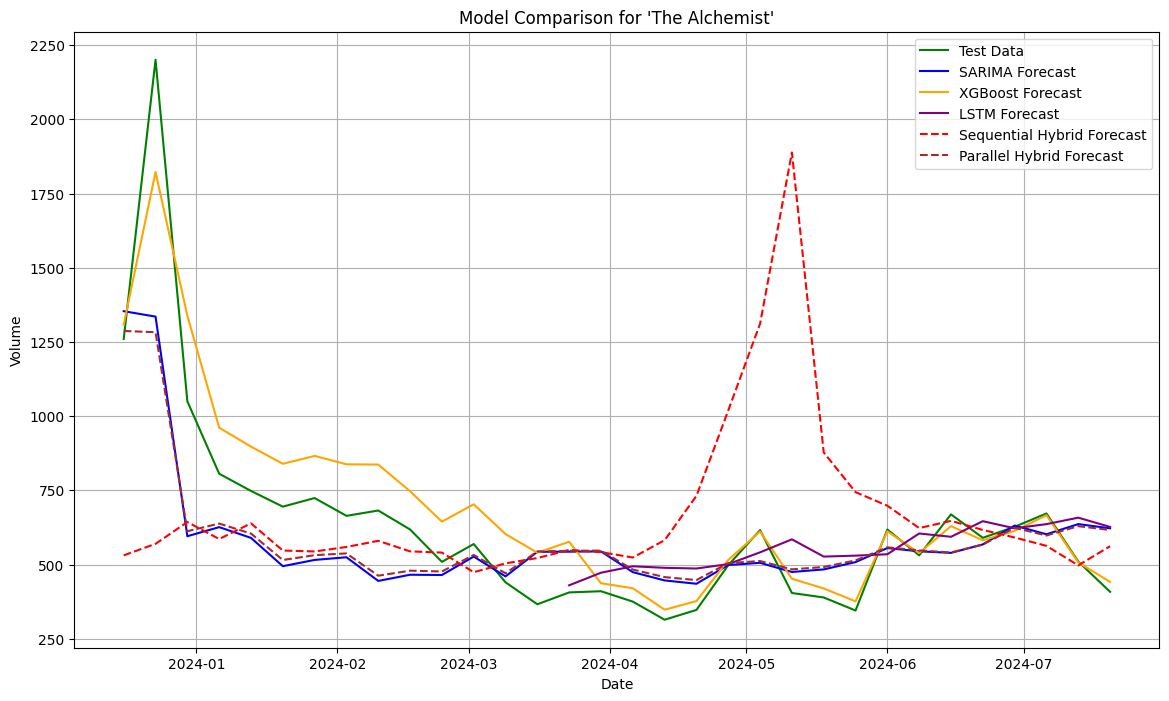

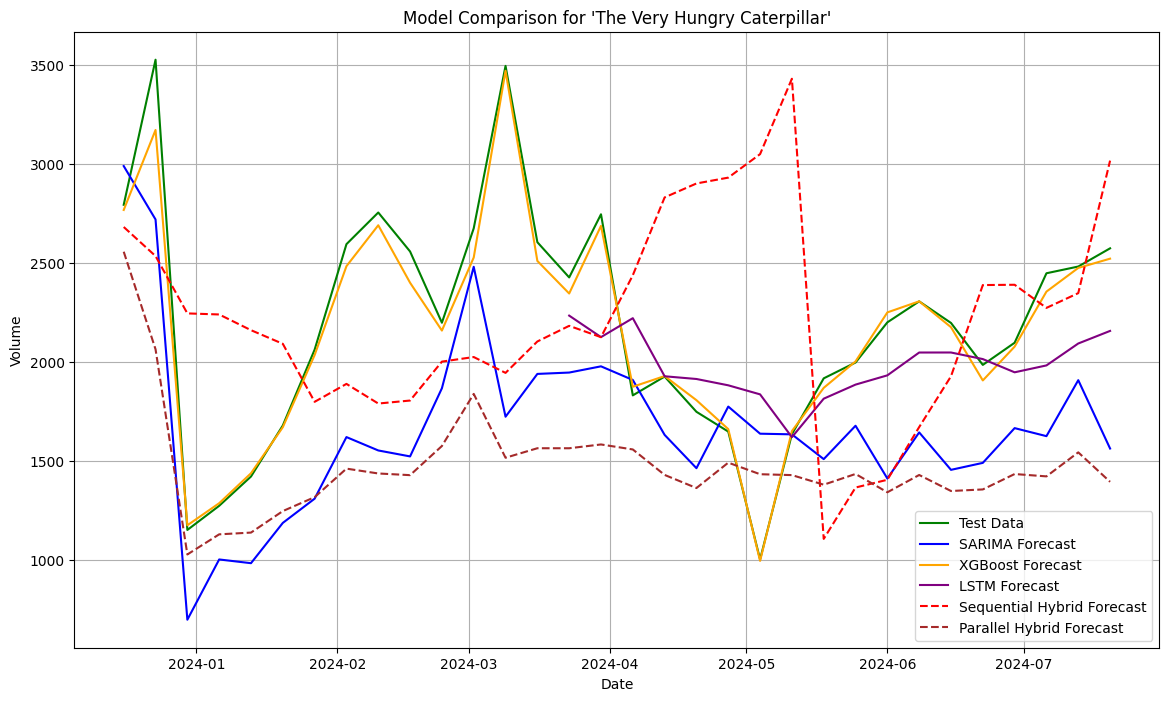

In [ ]:
# Align the LSTM test data to account for the sequence length
sequence_length = 14
y_test_a_aligned = y_test_a[sequence_length:]
y_test_c_aligned = y_test_c[sequence_length:]

# Ensure forecast_lstm_* is flattened
forecast_lstm_a = forecast_lstm_a.flatten()
forecast_lstm_c = forecast_lstm_c.flatten()

# Calculate metrics for each model

# Alchemist
mae_sarima_a = mean_absolute_error(y_test_a, forecast_sarima_a)
mape_sarima_a = mean_absolute_percentage_error(y_test_a, forecast_sarima_a) * 100

mae_xgb_a = mean_absolute_error(y_test_a, forecast_xgb_a)
mape_xgb_a = mean_absolute_percentage_error(y_test_a, forecast_xgb_a) * 100

mae_lstm_a = mean_absolute_error(y_test_a_aligned, forecast_lstm_a)
mape_lstm_a = mean_absolute_percentage_error(y_test_a_aligned, forecast_lstm_a) * 100

mae_hybrid_s_a = mean_absolute_error(y_test_a, forecast_hybrid_s_a)
mape_hybrid_s_a = mean_absolute_percentage_error(y_test_a, forecast_hybrid_s_a) * 100

mae_hybrid_p_a = mean_absolute_error(y_test_a, forecast_hybrid_p_a)
mape_hybrid_p_a = mean_absolute_percentage_error(y_test_a, forecast_hybrid_p_a) * 100

# Caterpillar
mae_sarima_c = mean_absolute_error(y_test_c, forecast_sarima_c)
mape_sarima_c = mean_absolute_percentage_error(y_test_c, forecast_sarima_c) * 100

mae_xgb_c = mean_absolute_error(y_test_c, forecast_xgb_c)
mape_xgb_c = mean_absolute_percentage_error(y_test_c, forecast_xgb_c) * 100

mae_lstm_c = mean_absolute_error(y_test_c_aligned, forecast_lstm_c)
mape_lstm_c = mean_absolute_percentage_error(y_test_c_aligned, forecast_lstm_c) * 100

mae_hybrid_s_c = mean_absolute_error(y_test_c, forecast_hybrid_s_c)
mape_hybrid_s_c = mean_absolute_percentage_error(y_test_c, forecast_hybrid_s_c) * 100

mae_hybrid_p_c = mean_absolute_error(y_test_c, forecast_hybrid_p_c)
mape_hybrid_p_c = mean_absolute_percentage_error(y_test_c, forecast_hybrid_p_c) * 100

# Print performance metrics for both datasets
print("\n=== Model Performance for 'The Alchemist' ===")
print(f"SARIMA - MAE: {mae_sarima_a:.2f}, MAPE: {mape_sarima_a:.2f}%")
print(f"XGBoost - MAE: {mae_xgb_a:.2f}, MAPE: {mape_xgb_a:.2f}%")
print(f"LSTM - MAE: {mae_lstm_a:.2f}, MAPE: {mape_lstm_a:.2f}%")
print(f"Sequential Hybrid - MAE: {mae_hybrid_s_a:.2f}, MAPE: {mape_hybrid_s_a:.2f}%")
print(f"Parallel Hybrid - MAE: {mae_hybrid_p_a:.2f}, MAPE: {mape_hybrid_p_a:.2f}%")

print("\n=== Model Performance for 'The Very Hungry Caterpillar' ===")
print(f"SARIMA - MAE: {mae_sarima_c:.2f}, MAPE: {mape_sarima_c:.2f}%")
print(f"XGBoost - MAE: {mae_xgb_c:.2f}, MAPE: {mape_xgb_c:.2f}%")
print(f"LSTM - MAE: {mae_lstm_c:.2f}, MAPE: {mape_lstm_c:.2f}%")
print(f"Sequential Hybrid - MAE: {mae_hybrid_s_c:.2f}, MAPE: {mape_hybrid_s_c:.2f}%")
print(f"Parallel Hybrid - MAE: {mae_hybrid_p_c:.2f}, MAPE: {mape_hybrid_p_c:.2f}%")

# Plot for 'The Alchemist'
plt.figure(figsize=(14, 8))
plt.plot(y_test_a.index, y_test_a, color='green', label='Test Data')
plt.plot(y_test_a.index, forecast_sarima_a, color='blue', label='SARIMA Forecast')
plt.plot(y_test_a.index, forecast_xgb_a, color='orange', label='XGBoost Forecast')
plt.plot(y_test_a_aligned.index, forecast_lstm_a, color='purple', label='LSTM Forecast')
plt.plot(y_test_a.index, forecast_hybrid_s_a, color='red', linestyle='dashed', label='Sequential Hybrid Forecast')
plt.plot(y_test_a.index, forecast_hybrid_p_a, color='brown', linestyle='dashed', label='Parallel Hybrid Forecast')
plt.title("Model Comparison for 'The Alchemist'")
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Plot for 'The Very Hungry Caterpillar'
plt.figure(figsize=(14, 8))
plt.plot(y_test_c.index, y_test_c, color='green', label='Test Data')
plt.plot(y_test_c.index, forecast_sarima_c, color='blue', label='SARIMA Forecast')
plt.plot(y_test_c.index, forecast_xgb_c, color='orange', label='XGBoost Forecast')
plt.plot(y_test_c_aligned.index, forecast_lstm_c, color='purple', label='LSTM Forecast')
plt.plot(y_test_c.index, forecast_hybrid_s_c, color='red', linestyle='dashed', label='Sequential Hybrid Forecast')
plt.plot(y_test_c.index, forecast_hybrid_p_c, color='brown', linestyle='dashed', label='Parallel Hybrid Forecast')
plt.title("Model Comparison for 'The Very Hungry Caterpillar'")
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(loc='best')
plt.grid(True)
plt.show()


# Monthly Prediction

In [ ]:
df_alchemist

ISBN           Title         Author  Interval  Volume  \
End Date                                                                     
2012-01-07  9780722532935  Alchemist, The  Coelho, Paulo  201201.0     518   
2012-01-14  9780722532935  Alchemist, The  Coelho, Paulo  201202.0     533   
2012-01-21  9780722532935  Alchemist, The  Coelho, Paulo  201203.0     475   
2012-01-28  9780722532935  Alchemist, The  Coelho, Paulo  201204.0     514   
2012-02-04  9780722532935  Alchemist, The  Coelho, Paulo  201205.0     591   
...                   ...             ...            ...       ...     ...   
2024-06-22  9780722532935  Alchemist, The  Coelho, Paulo  202425.0     590   
2024-06-29  9780722532935  Alchemist, The  Coelho, Paulo  202426.0     627   
2024-07-06  9780722532935  Alchemist, The  Coelho, Paulo  202427.0     672   
2024-07-13  9780722532935  Alchemist, The  Coelho, Paulo  202428.0     510   
2024-07-20  9780722532935  Alchemist, The  Coelho, Paulo  202429.0     408   

              Value     ASP   RRP    Binding   Imprint    Publisher Group  \
End Date                                                                    
2012-01-07  3601.76  6.9532  9.99  Paperback  Thorsons  HarperCollins Grp   
2012-01-14  3610.12  6.7732  9.99  Paperback  Thorsons  HarperCollins Grp   
2012-01-21  3105.62  6.5381  9.99  Paperback  Thorsons  HarperCollins Grp   
2012-01-28  3431.29  6.6757  9.99  Paperback  Thorsons  HarperCollins Grp   
2012-02-04  3929.22  6.6484  9.99  Paperback  Thorsons  HarperCollins Grp   
...             ...     ...   ...        ...       ...                ...   
2024-06-22  5182.65  8.7842  9.99  Paperback  Thorsons  HarperCollins Grp   
2024-06-29  5530.58  8.8207  9.99  Paperback  Thorsons  HarperCollins Grp   
2024-07-06  5947.09  8.8498  9.99  Paperback  Thorsons  HarperCollins Grp   
2024-07-13  4638.63  9.0954  9.99  Paperback  Thorsons  HarperCollins Grp   
2024-07-20  3782.61  9.2711  9.99  Paperback  Thorsons  HarperCollins Grp   

                              Product Class Publication Date  \
End Date                                                       
2012-01-07  F1.1 General & Literary Fiction       1995-11-13   
2012-01-14  F1.1 General & Literary Fiction       1995-11-13   
2012-01-21  F1.1 General & Literary Fiction       1995-11-13   
2012-01-28  F1.1 General & Literary Fiction       1995-11-13   
2012-02-04  F1.1 General & Literary Fiction       1995-11-13   
...                                     ...              ...   
2024-06-22  F1.1 General & Literary Fiction       1995-11-13   
2024-06-29  F1.1 General & Literary Fiction       1995-11-13   
2024-07-06  F1.1 General & Literary Fiction       1995-11-13   
2024-07-13  F1.1 General & Literary Fiction       1995-11-13   
2024-07-20  F1.1 General & Literary Fiction       1995-11-13   

           Country of Publication  Year  
End Date                                 
2012-01-07         United Kingdom  2012  
2012-01-14         United Kingdom  2012  
2012-01-21         United Kingdom  2012  
2012-01-28         United Kingdom  2012  
2012-02-04         United Kingdom  2012  
...                           ...   ...  
2024-06-22         United Kingdom  2024  
2024-06-29         United Kingdom  2024  
2024-07-06         United Kingdom  2024  
2024-07-13         United Kingdom  2024  
2024-07-20         United Kingdom  2024  

[655 rows x 15 columns]

In [ ]:
df_a_monthly = df_alchemist.resample('M').agg({
    'Volume': 'sum',
    'Value': 'sum',
    'ASP': 'mean',
    'RRP': 'mean',
    'ISBN': 'first',
    'Title': 'first',
    'Author': 'first',
    'Interval': 'first',
    'Binding': 'first',
    'Imprint': 'first',
    'Publisher Group': 'first',
    'Product Class': 'first',
    'Publication Date': 'first',
    'Country of Publication': 'first',
    'Year': 'first'
})

print(df_a_monthly)


            Volume     Value       ASP   RRP           ISBN           Title  \
End Date                                                                      
2012-01-31    2040  13748.79  6.735050  9.99  9780722532935  Alchemist, The   
2012-02-29    1866  12421.43  6.655525  9.99  9780722532935  Alchemist, The   
2012-03-31    3604  24113.73  6.689560  9.99  9780722532935  Alchemist, The   
2012-04-30    3180  21419.75  6.733300  9.99  9780722532935  Alchemist, The   
2012-05-31    2385  16174.89  6.788075  9.99  9780722532935  Alchemist, The   
...            ...       ...       ...   ...            ...             ...   
2024-03-31    2191  20332.84  9.331900  9.99  9780722532935  Alchemist, The   
2024-04-30    1534  14387.59  9.420850  9.99  9780722532935  Alchemist, The   
2024-05-31    1754  16156.64  9.250750  9.99  9780722532935  Alchemist, The   
2024-06-30    3035  26764.36  8.816400  9.99  9780722532935  Alchemist, The   
2024-07-31    1590  14368.33  9.072100  9.99  978072

<ipython-input-128-e3db5c05f6a4>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_a_monthly = df_alchemist.resample('M').agg({


In [ ]:
df_c_monthly = df_caterpillar.resample('M').agg({
    'Volume': 'sum',
    'Value': 'sum',
    'ASP': 'mean',
    'RRP': 'mean',
    'ISBN': 'first',
    'Title': 'first',
    'Author': 'first',
    'Interval': 'first',
    'Binding': 'first',
    'Imprint': 'first',
    'Publisher Group': 'first',
    'Product Class': 'first',
    'Publication Date': 'first',
    'Country of Publication': 'first',
    'Year': 'first'
})

print(df_c_monthly)

            Volume     Value       ASP   RRP           ISBN  \
End Date                                                      
2012-01-31    2226  10825.93  4.861000  7.99  9780241003008   
2012-02-29    4168  17905.22  4.306975  7.99  9780241003008   
2012-03-31    3466  17614.46  5.098580  7.99  9780241003008   
2012-04-30    2431  13231.53  5.438575  7.99  9780241003008   
2012-05-31    2223  11915.17  5.365875  7.99  9780241003008   
...            ...       ...       ...   ...            ...   
2024-03-31   13949  61459.25  4.409440  7.99  9780241003008   
2024-04-30    7153  31899.71  4.459050  7.99  9780241003008   
2024-05-31    6551  29348.57  4.492950  7.99  9780241003008   
2024-06-30   10785  49462.44  4.587160  7.99  9780241003008   
2024-07-31    7504  33922.59  4.521067  7.99  9780241003008   

                                   Title       Author  Interval   Binding  \
End Date                                                                    
2012-01-31  Very Hungry Ca

<ipython-input-129-0f2f1c946649>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_c_monthly = df_caterpillar.resample('M').agg({


=== Best Model Parameters ===
learning_rate: 0.2
max_depth: 3
n_estimators: 200
reg_alpha: 0.1
reg_lambda: 1
subsample: 0.8
objective: reg:squarederror
random_state: 42

=== Forecast Performance ===
Test MAE: 95.1113
Test MAPE: 4.8522%


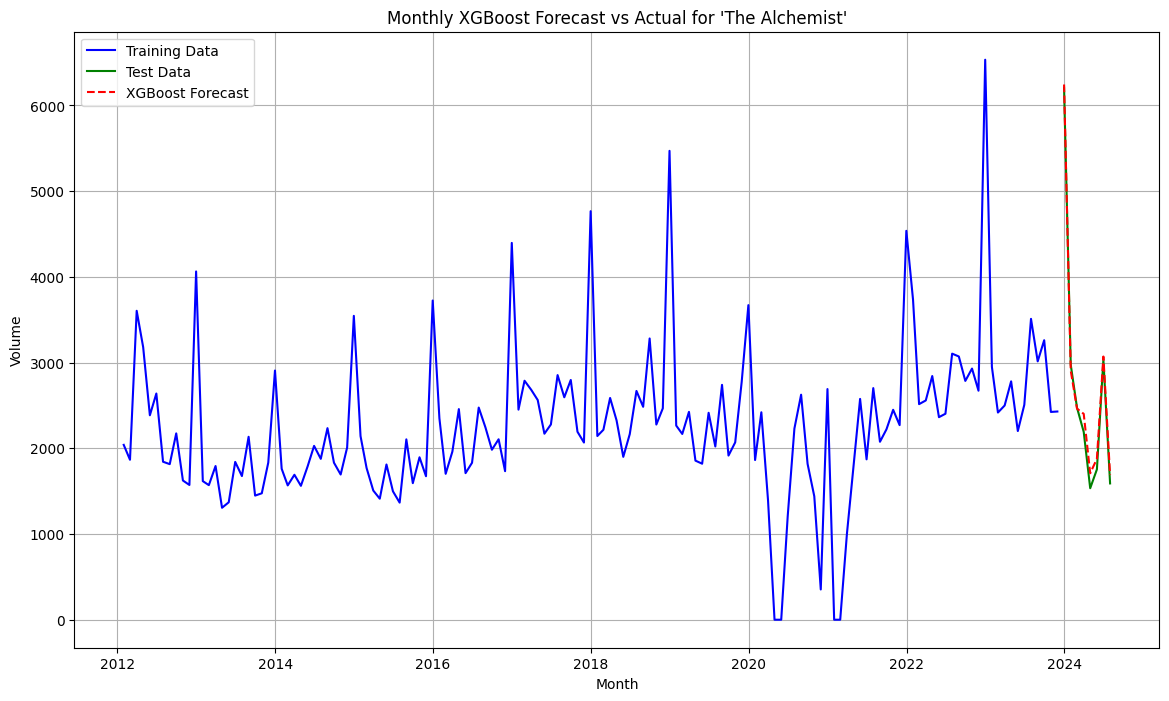

In [ ]:
#  Set forecast horizon and window length appropriate for monthly data
monthly_forecast_horizon = 8   # e.g., forecast 12 months ahead
monthly_window_length    = 12    # e.g., use 6 months of data to predict the next month

# (3) Prepare the data using your (assumed) helper function:
X_train_a, y_train_a, X_test_a, y_test_a = prepare_data_for_ml(
    df_a_monthly,
    forecast_horizon=monthly_forecast_horizon,
    window_length=monthly_window_length,
    print_nan_info=False
)

# (4) Use the best XGBoost parameters (these might need re‑tuning for monthly data)
best_xgb_params_a = {
    'learning_rate': 0.2,
    'max_depth': 3,
    'n_estimators': 200,
    'reg_alpha': 0.1,
    'reg_lambda': 1,
    'subsample': 0.8,
    'objective': 'reg:squarederror',
    'random_state': 42
}

# (5) Train the model on the training data
best_model_a = xgb.XGBRegressor(**best_xgb_params_a)
best_model_a.fit(X_train_a, y_train_a)

# (6) Forecast the test period
forecast_y_test_a = best_model_a.predict(X_test_a)

# (7) Calculate evaluation metrics
test_mae_a = mean_absolute_error(y_test_a, forecast_y_test_a)
test_mape_a = mean_absolute_percentage_error(y_test_a, forecast_y_test_a)

# (8) Print parameters and performance
print("=== Best Model Parameters ===")
for param, value in best_xgb_params_a.items():
    print(f"{param}: {value}")

print("\n=== Forecast Performance ===")
print(f"Test MAE: {test_mae_a:.4f}")
print(f"Test MAPE: {test_mape_a:.4%}")

# (9) Plot the results
plt.figure(figsize=(14, 8))
plt.plot(y_train_a.index, y_train_a, color='blue', label='Training Data')
plt.plot(y_test_a.index, y_test_a, color='green', label='Test Data')
plt.plot(y_test_a.index, forecast_y_test_a, color='red', linestyle='dashed', label='XGBoost Forecast')
plt.title("Monthly XGBoost Forecast vs Actual for 'The Alchemist'")
plt.xlabel('Month')
plt.ylabel('Volume')
plt.legend(loc='best')
plt.grid(True)
plt.show()


=== Best Model Parameters ===
learning_rate: 0.2
max_depth: 5
n_estimators: 200
reg_alpha: 1
reg_lambda: 1
subsample: 1.0
objective: reg:squarederror
random_state: 42

=== Forecast Performance ===
Test MAE: 797.5478
Test MAPE: 6.8493%


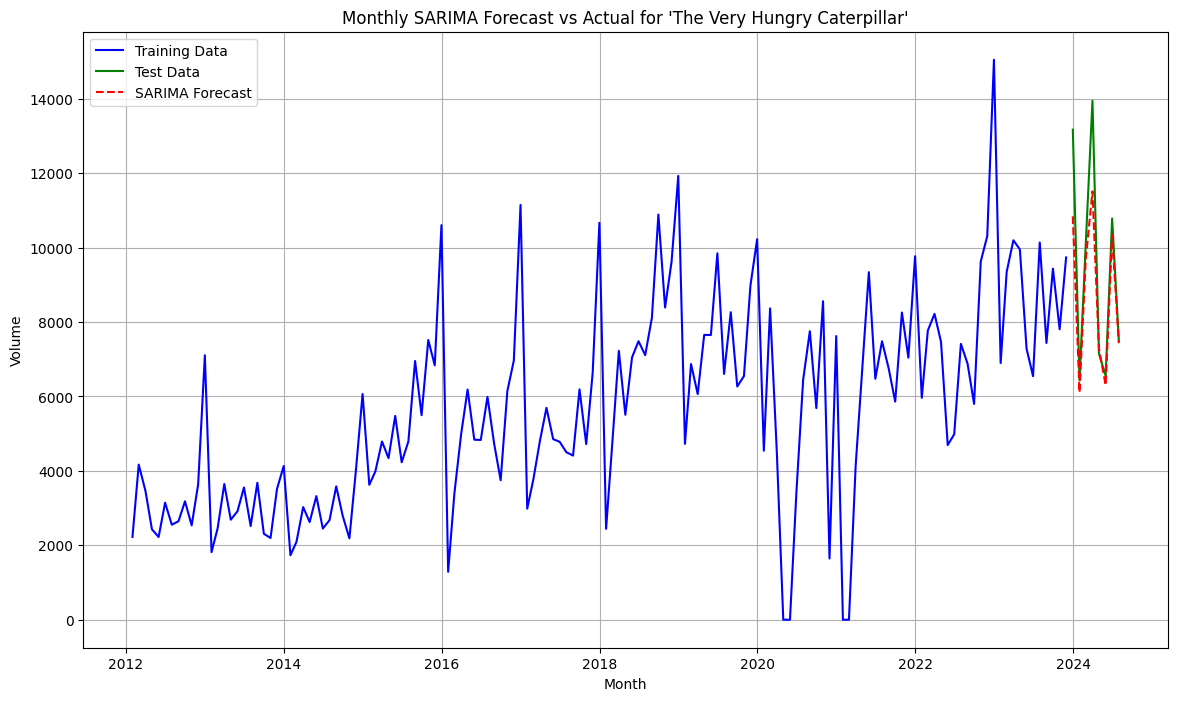

In [ ]:
# Adjust the forecast horizon and window length as needed for this dataset.
monthly_forecast_horizon = 8   # For example, forecast 12 months ahead
monthly_window_length    = 12    #

X_train_c, y_train_c, X_test_c, y_test_c = prepare_data_for_ml(
    df_c_monthly,
    forecast_horizon=monthly_forecast_horizon,
    window_length=monthly_window_length,
    print_nan_info=False
)

# Use the best XGBoost parameters (again, consider re‑tuning for monthly data)
best_xgb_params_c = {
    'learning_rate': 0.2,
    'max_depth': 5,
    'n_estimators': 200,
    'reg_alpha': 1,
    'reg_lambda': 1,
    'subsample': 1.0,
    'objective': 'reg:squarederror',
    'random_state': 42
}

best_model_c = xgb.XGBRegressor(**best_xgb_params_c)
best_model_c.fit(X_train_c, y_train_c)
forecast_y_test_c = best_model_c.predict(X_test_c)

test_mae_c = mean_absolute_error(y_test_c, forecast_y_test_c)
test_mape_c = mean_absolute_percentage_error(y_test_c, forecast_y_test_c)

print("=== Best Model Parameters ===")
for param, value in best_xgb_params_c.items():
    print(f"{param}: {value}")

print("\n=== Forecast Performance ===")
print(f"Test MAE: {test_mae_c:.4f}")
print(f"Test MAPE: {test_mape_c:.4%}")

plt.figure(figsize=(14, 8))
plt.plot(y_train_c.index, y_train_c, color='blue', label='Training Data')
plt.plot(y_test_c.index, y_test_c, color='green', label='Test Data')
plt.plot(y_test_c.index, forecast_y_test_c, color='red', linestyle='dashed', label='SARIMA Forecast')
plt.title("Monthly SARIMA Forecast vs Actual for 'The Very Hungry Caterpillar'")
plt.xlabel('Month')
plt.ylabel('Volume')
plt.legend(loc='best')
plt.grid(True)
plt.show()


These are fantastic results. In both instances, treating the sales volume in a monthly manner resulted in a much better model performance. This is to be expected, as by aggregating sales volume over a longer time period smoothens out short-term fluctuations. If the residuals were to be calculated, it is likely they’d be smaller. It is intuitively obvious that weekly data would be skewed more by the effect of holidays and other events, making monthly aggregation overall preferrable for analysis. <br>

By far the best MAPE so far, with single digit values.